# lab-customer-analysis-round-5

##### The Lab 5 is below the cells of the Lab4. Scroll down. 

### lab-customer-analysis-round-4
##### As we need to use the lab4 for continue with the lab 5. I'm reusing the lab4 Notebook. You will see below the Markdown for the lab5 some cells below. 

Complete the following task
* Check the data types of the columns. Get the numeric data into dataframe called numerical and categorical columns in a dataframe called categoricals. (You can use np.number and np.object to select the numerical data types and categorical data types respectively)
* Now we will try to check the normality of the numerical variables visually
    *  Use seaborn library to construct distribution plots for the numerical variables
    * Use Matplotlib to construct histograms
    * Do the distributions for different numerical variables look like a normal distribution
* For the numerical variables, check the multicollinearity between the features. Please note that we will use the column total_claim_amount later as the target variable.
* Drop one of the two features that show a high correlation between them (greater than 0.9). Write code for both the correlation matrix and for seaborn heatmap. If there is no pair of features that have a high correlation, then do not drop any features

In [206]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from pandas.plotting import scatter_matrix
import seaborn as sns
from IPython.display import set_matplotlib_formats, HTML
from matplotlib.dates import DateFormatter
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from matplotlib import colors as mcolors
from pandas.plotting import register_matplotlib_converters
import statsmodels.api as sm
%matplotlib inline
%config InlineBackend.figure_format = 'png'

In [207]:
# Load the DF
df = pd.read_csv('files_for_lab/csv_files/marketing_customer_analysis.csv')


In [208]:
def df_trans(df):
    """This function will perform a few transformations on the dataset"""
    
    #Drop column
    #df.drop(columns=['Unnamed: 0'], inplace=True)
    
    #Standarize Column Names - Lower the letters. 
    df.columns = df.columns.str.lower()
    
    #Print Numerical and Categorical Columns 
    numerical = df._get_numeric_data().columns
    cols = df.columns
    categorical = list(set(cols) - set(numerical))
    print(f'The numerical columns are: {numerical}')
    print(f'The categorical columns are: {categorical}')

    #Deal with NANs
    df['income'].fillna(df['income'].median(), inplace=True)
    df.fillna(0, inplace=True)

    #Transform the column df['effective to date'] to date time
    df['effective to date'] = pd.to_datetime(df['effective to date'])

    #Create column with month
    df['month'] = df['effective to date'].dt.month

    # Return the cleand DF with the first the quater of data

    return df




In [209]:
#Clean the file and deal with NAMS. Using the Function created in the previous excercice. 

df = df_trans(df)

The numerical columns are: Index(['customer lifetime value', 'income', 'monthly premium auto',
       'months since last claim', 'months since policy inception',
       'number of open complaints', 'number of policies',
       'total claim amount'],
      dtype='object')
The categorical columns are: ['gender', 'location code', 'vehicle class', 'policy type', 'sales channel', 'response', 'education', 'state', 'coverage', 'effective to date', 'renew offer type', 'policy', 'employmentstatus', 'customer', 'vehicle size', 'marital status']


## Check the data types of the columns. Get the numeric data into dataframe called numerical and categorical columns in a dataframe called categoricals. (You can use np.number and np.object to select the numerical data types and categorical data types respectively)

In [210]:
# Check the data types of the columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer                       9134 non-null   object        
 1   state                          9134 non-null   object        
 2   customer lifetime value        9134 non-null   float64       
 3   response                       9134 non-null   object        
 4   coverage                       9134 non-null   object        
 5   education                      9134 non-null   object        
 6   effective to date              9134 non-null   datetime64[ns]
 7   employmentstatus               9134 non-null   object        
 8   gender                         9134 non-null   object        
 9   income                         9134 non-null   int64         
 10  location code                  9134 non-null   object        
 11  marital status   

In [211]:
#Get the numeric data into dataframe called numerical and categorical columns in a dataframe called categoricals

# DF with numerical columns
df_num = df[['customer lifetime value', 'income', 'monthly premium auto',
       'months since last claim', 'months since policy inception',
       'number of open complaints', 'number of policies',
       'total claim amount']]

display(df_num)

# DF with Categorical columns

df_cat = df[['education', 'vehicle size', 'marital status', 'location code', 'renew offer type', 'employmentstatus', 'gender', 'policy', 'state', 'vehicle class', 'policy type', 'response', 'customer', 'effective to date', 'coverage', 'sales channel']]

display(df_cat)

customer lifetime value  income  monthly premium auto  \
0                 2763.519279   56274                    69   
1                 6979.535903       0                    94   
2                12887.431650   48767                   108   
3                 7645.861827       0                   106   
4                 2813.692575   43836                    73   
...                       ...     ...                   ...   
9129             23405.987980   71941                    73   
9130              3096.511217   21604                    79   
9131              8163.890428       0                    85   
9132              7524.442436   21941                    96   
9133              2611.836866       0                    77   

      months since last claim  months since policy inception  \
0                          32                              5   
1                          13                             42   
2                          18                             38   
3                          18                             65   
4                          12                             44   
...                       ...                            ...   
9129                       18                             89   
9130                       14                             28   
9131                        9                             37   
9132                       34                              3   
9133                        3                             90   

      number of open complaints  number of policies  total claim amount  
0                             0                   1          384.811147  
1                             0                   8         1131.464935  
2                             0                   2          566.472247  
3                             0                   7          529.881344  
4                             0                   1          138.130879  
...                         ...                 ...                 ...  
9129                          0                   2          198.234764  
9130                          0                   1          379.200000  
9131                          3                   2          790.784983  
9132                          0                   3          691.200000  
9133                          0                   1          369.600000  

[9134 rows x 8 columns]

education vehicle size marital status location code renew offer type  \
0     Bachelor      Medsize        Married      Suburban           Offer1   
1     Bachelor      Medsize         Single      Suburban           Offer3   
2     Bachelor      Medsize        Married      Suburban           Offer1   
3     Bachelor      Medsize        Married      Suburban           Offer1   
4     Bachelor      Medsize         Single         Rural           Offer1   
...        ...          ...            ...           ...              ...   
9129  Bachelor      Medsize        Married         Urban           Offer2   
9130   College      Medsize       Divorced      Suburban           Offer1   
9131  Bachelor      Medsize         Single      Suburban           Offer1   
9132   College        Large        Married      Suburban           Offer3   
9133   College      Medsize         Single      Suburban           Offer4   

     employmentstatus gender        policy       state  vehicle class  \
0            Employed      F  Corporate L3  Washington   Two-Door Car   
1          Unemployed      F   Personal L3     Arizona  Four-Door Car   
2            Employed      F   Personal L3      Nevada   Two-Door Car   
3          Unemployed      M  Corporate L2  California            SUV   
4            Employed      M   Personal L1  Washington  Four-Door Car   
...               ...    ...           ...         ...            ...   
9129         Employed      M   Personal L1  California  Four-Door Car   
9130         Employed      F  Corporate L3  California  Four-Door Car   
9131       Unemployed      M  Corporate L2  California  Four-Door Car   
9132         Employed      M   Personal L2  California  Four-Door Car   
9133       Unemployed      M  Corporate L3  California   Two-Door Car   

         policy type response customer effective to date  coverage  \
0     Corporate Auto       No  BU79786        2011-02-24     Basic   
1      Personal Auto       No  QZ44356        2011-01-31  Extended   
2      Personal Auto       No  AI49188        2011-02-19   Premium   
3     Corporate Auto       No  WW63253        2011-01-20     Basic   
4      Personal Auto       No  HB64268        2011-02-03     Basic   
...              ...      ...      ...               ...       ...   
9129   Personal Auto       No  LA72316        2011-02-10     Basic   
9130  Corporate Auto      Yes  PK87824        2011-02-12  Extended   
9131  Corporate Auto       No  TD14365        2011-02-06  Extended   
9132   Personal Auto       No  UP19263        2011-02-03  Extended   
9133  Corporate Auto       No  Y167826        2011-02-14  Extended   

     sales channel  
0            Agent  
1            Agent  
2            Agent  
3      Call Center  
4            Agent  
...            ...  
9129           Web  
9130        Branch  
9131        Branch  
9132        Branch  
9133   Call Center  

[9134 rows x 16 columns]

### Other way to create the DF_Categorical and DF_Numerical using np.number and np.object



In [212]:
# Now we will try to check the normality of the numerical variables visually

#select numerical columns 
df_num = df.select_dtypes(include=np.number)

#Display Numerical dataset
display(df_num)

#select categorical columns 
df_cat = df.select_dtypes(include=np.object)

#Display Categorical dataset
display(df_num)

customer lifetime value  income  monthly premium auto  \
0                 2763.519279   56274                    69   
1                 6979.535903       0                    94   
2                12887.431650   48767                   108   
3                 7645.861827       0                   106   
4                 2813.692575   43836                    73   
...                       ...     ...                   ...   
9129             23405.987980   71941                    73   
9130              3096.511217   21604                    79   
9131              8163.890428       0                    85   
9132              7524.442436   21941                    96   
9133              2611.836866       0                    77   

      months since last claim  months since policy inception  \
0                          32                              5   
1                          13                             42   
2                          18                             38   
3                          18                             65   
4                          12                             44   
...                       ...                            ...   
9129                       18                             89   
9130                       14                             28   
9131                        9                             37   
9132                       34                              3   
9133                        3                             90   

      number of open complaints  number of policies  total claim amount  month  
0                             0                   1          384.811147      2  
1                             0                   8         1131.464935      1  
2                             0                   2          566.472247      2  
3                             0                   7          529.881344      1  
4                             0                   1          138.130879      2  
...                         ...                 ...                 ...    ...  
9129                          0                   2          198.234764      2  
9130                          0                   1          379.200000      2  
9131                          3                   2          790.784983      2  
9132                          0                   3          691.200000      2  
9133                          0                   1          369.600000      2  

[9134 rows x 9 columns]

C:\Users\ssai\AppData\Local\Temp\ipykernel_18792\2408682807.py:10: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df_cat = df.select_dtypes(include=np.object)


customer lifetime value  income  monthly premium auto  \
0                 2763.519279   56274                    69   
1                 6979.535903       0                    94   
2                12887.431650   48767                   108   
3                 7645.861827       0                   106   
4                 2813.692575   43836                    73   
...                       ...     ...                   ...   
9129             23405.987980   71941                    73   
9130              3096.511217   21604                    79   
9131              8163.890428       0                    85   
9132              7524.442436   21941                    96   
9133              2611.836866       0                    77   

      months since last claim  months since policy inception  \
0                          32                              5   
1                          13                             42   
2                          18                             38   
3                          18                             65   
4                          12                             44   
...                       ...                            ...   
9129                       18                             89   
9130                       14                             28   
9131                        9                             37   
9132                       34                              3   
9133                        3                             90   

      number of open complaints  number of policies  total claim amount  month  
0                             0                   1          384.811147      2  
1                             0                   8         1131.464935      1  
2                             0                   2          566.472247      2  
3                             0                   7          529.881344      1  
4                             0                   1          138.130879      2  
...                         ...                 ...                 ...    ...  
9129                          0                   2          198.234764      2  
9130                          0                   1          379.200000      2  
9131                          3                   2          790.784983      2  
9132                          0                   3          691.200000      2  
9133                          0                   1          369.600000      2  

[9134 rows x 9 columns]

## Set style of plots

In [213]:
#Define style for plotting

# default styles
def set_sns_format(width=14, height=8):
    sns.set_theme(palette='pastel', context='notebook',rc={'savefig.dpi':300})
    set_matplotlib_formats('retina')
    matplotlib.rcParams['figure.figsize'] = (width, height)
    return None
#Run Function to set style for following plots. 
set_sns_format(width=14, height=8)

C:\Users\ssai\AppData\Local\Temp\ipykernel_18792\3151773754.py:6: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('retina')


## Now we will try to check the normality of the numerical variables visually

### Resources: https://www.statology.org/normality-test-python/

#### (Visual Method) Create a histogram.
* If the histogram is roughly “bell-shaped”, then the data is assumed to be normally distributed.

#### (Visual Method) Create a Q-Q plot.
* If the points in the plot roughly fall along a straight diagonal line, then the data is assumed to be normally distributed.

#### (Formal Statistical Test) Perform a Shapiro-Wilk Test.
* If the p-value of the test is greater than α = .05, then the data is assumed to be normally distributed.

#### (Formal Statistical Test) Perform a Kolmogorov-Smirnov Test.
* If the p-value of the test is greater than α = .05, then the data is assumed to be normally distributed.


# Use Matplotlib to construct histograms

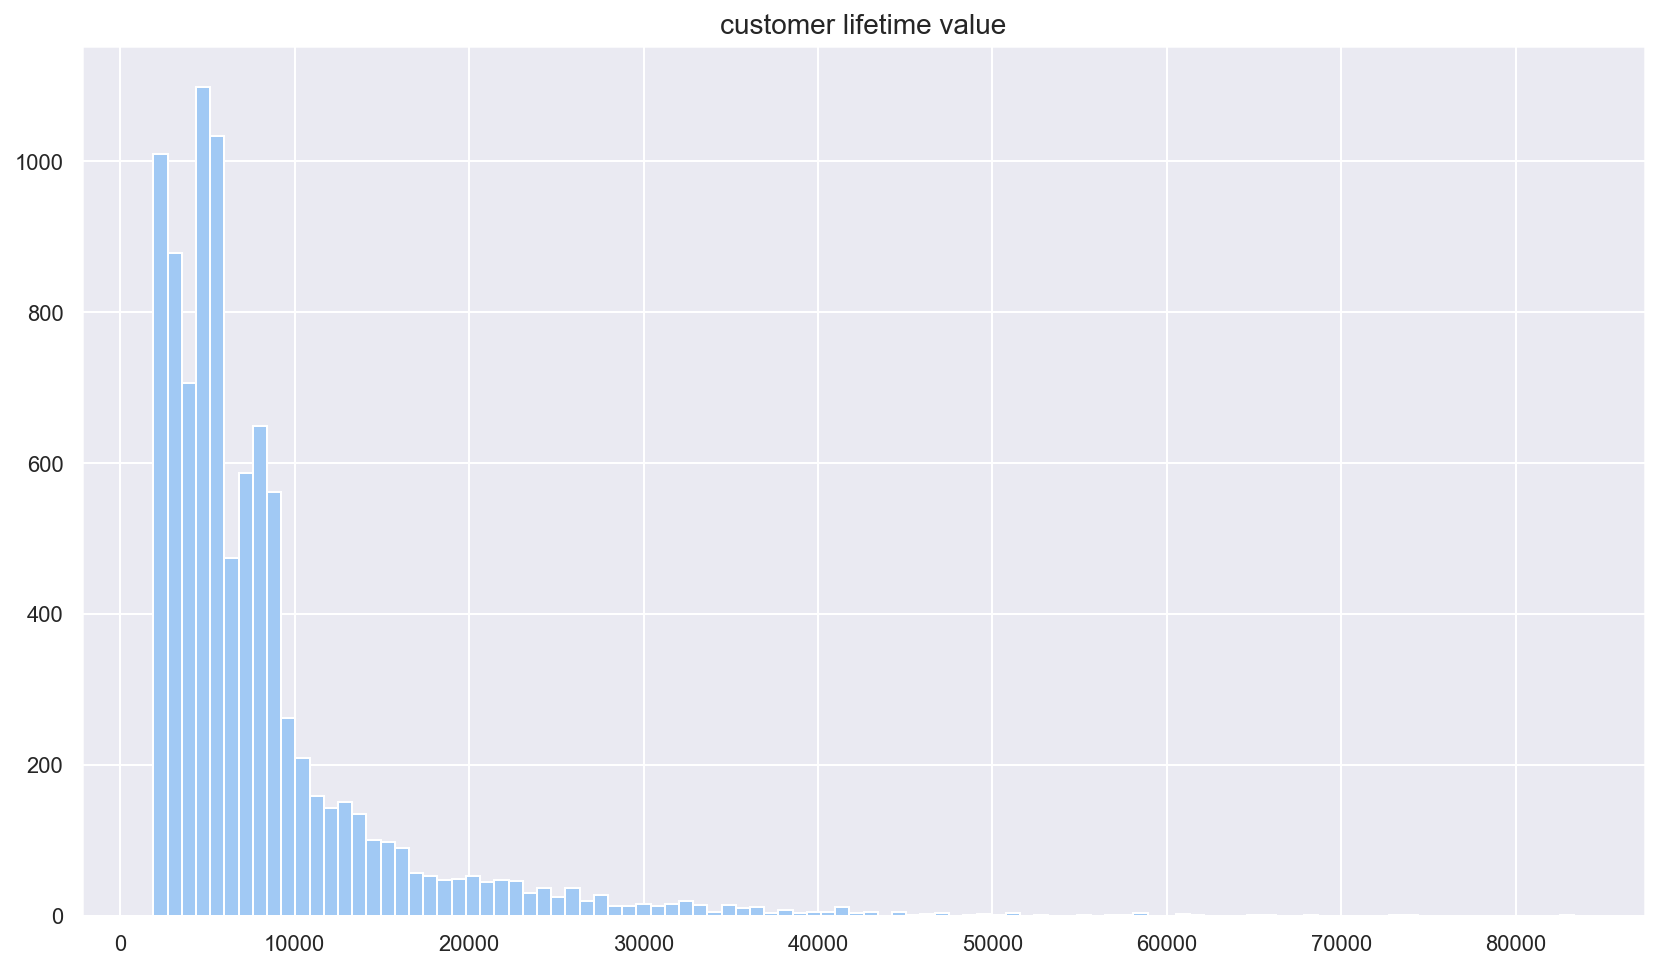

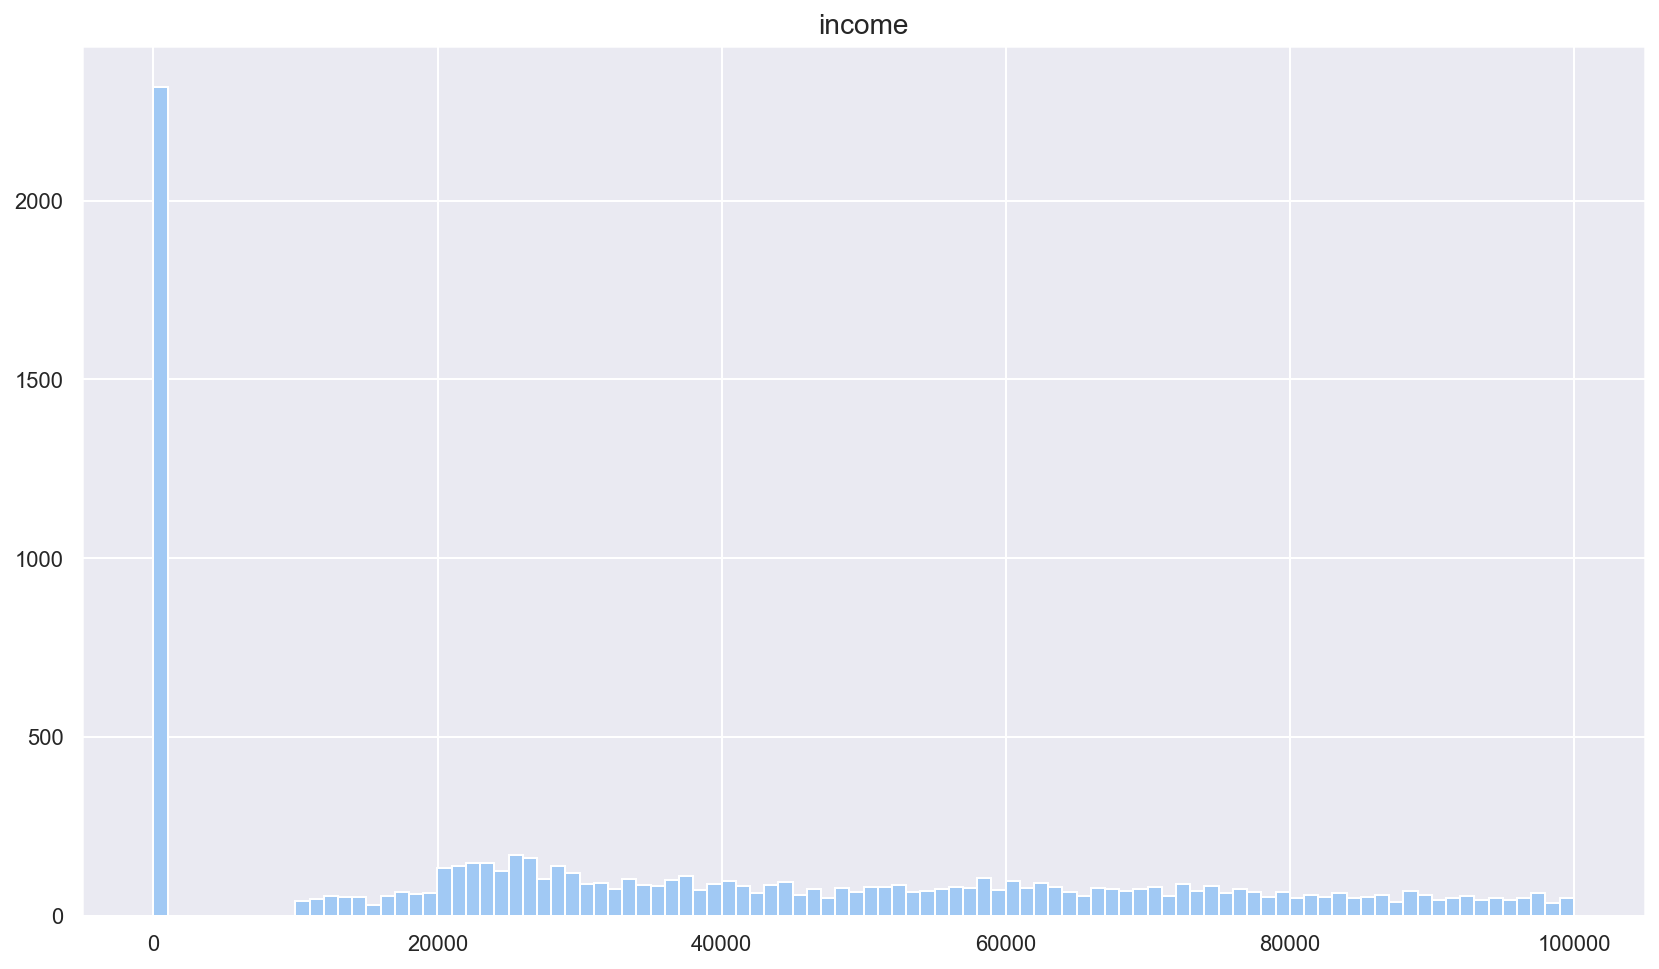

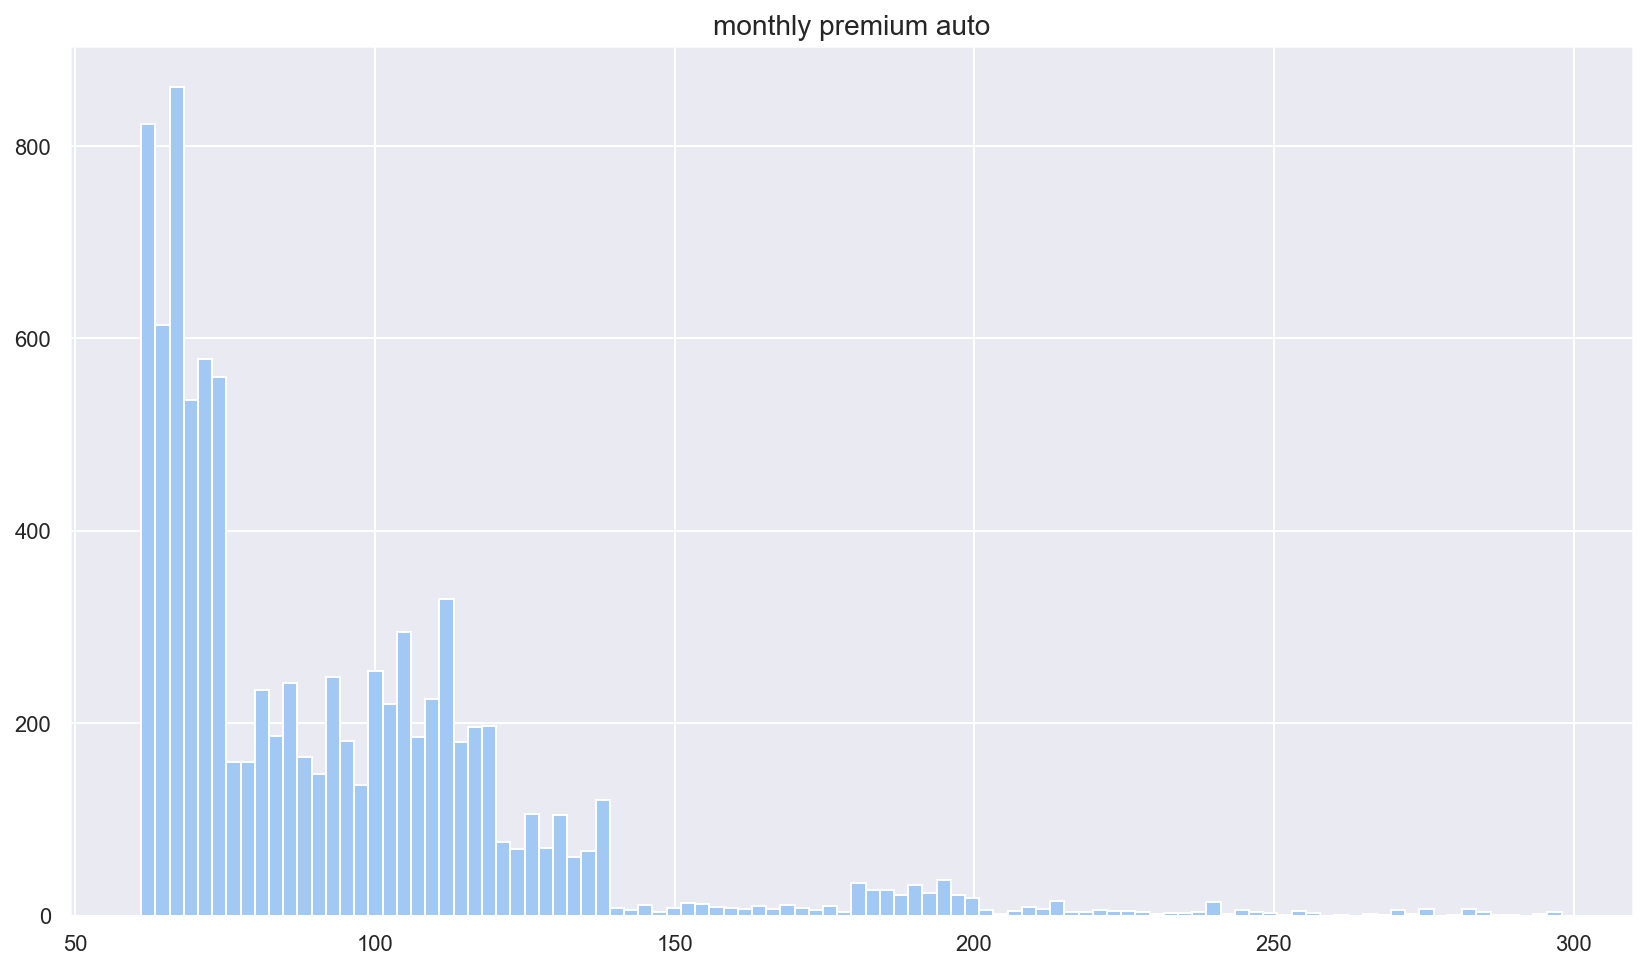

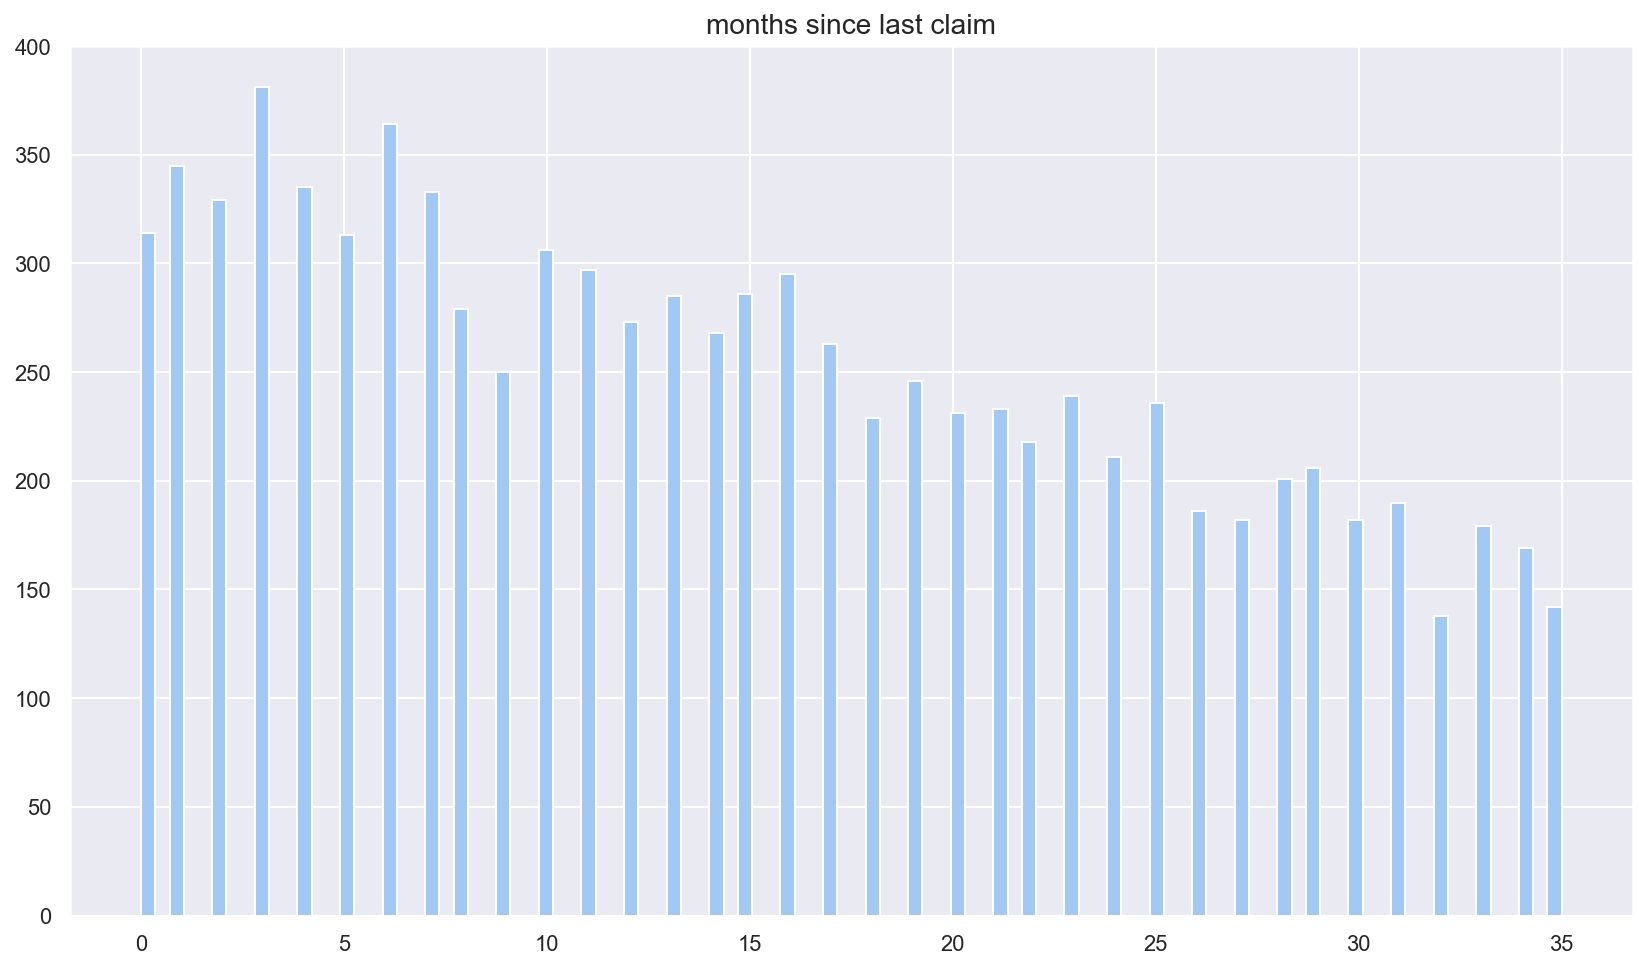

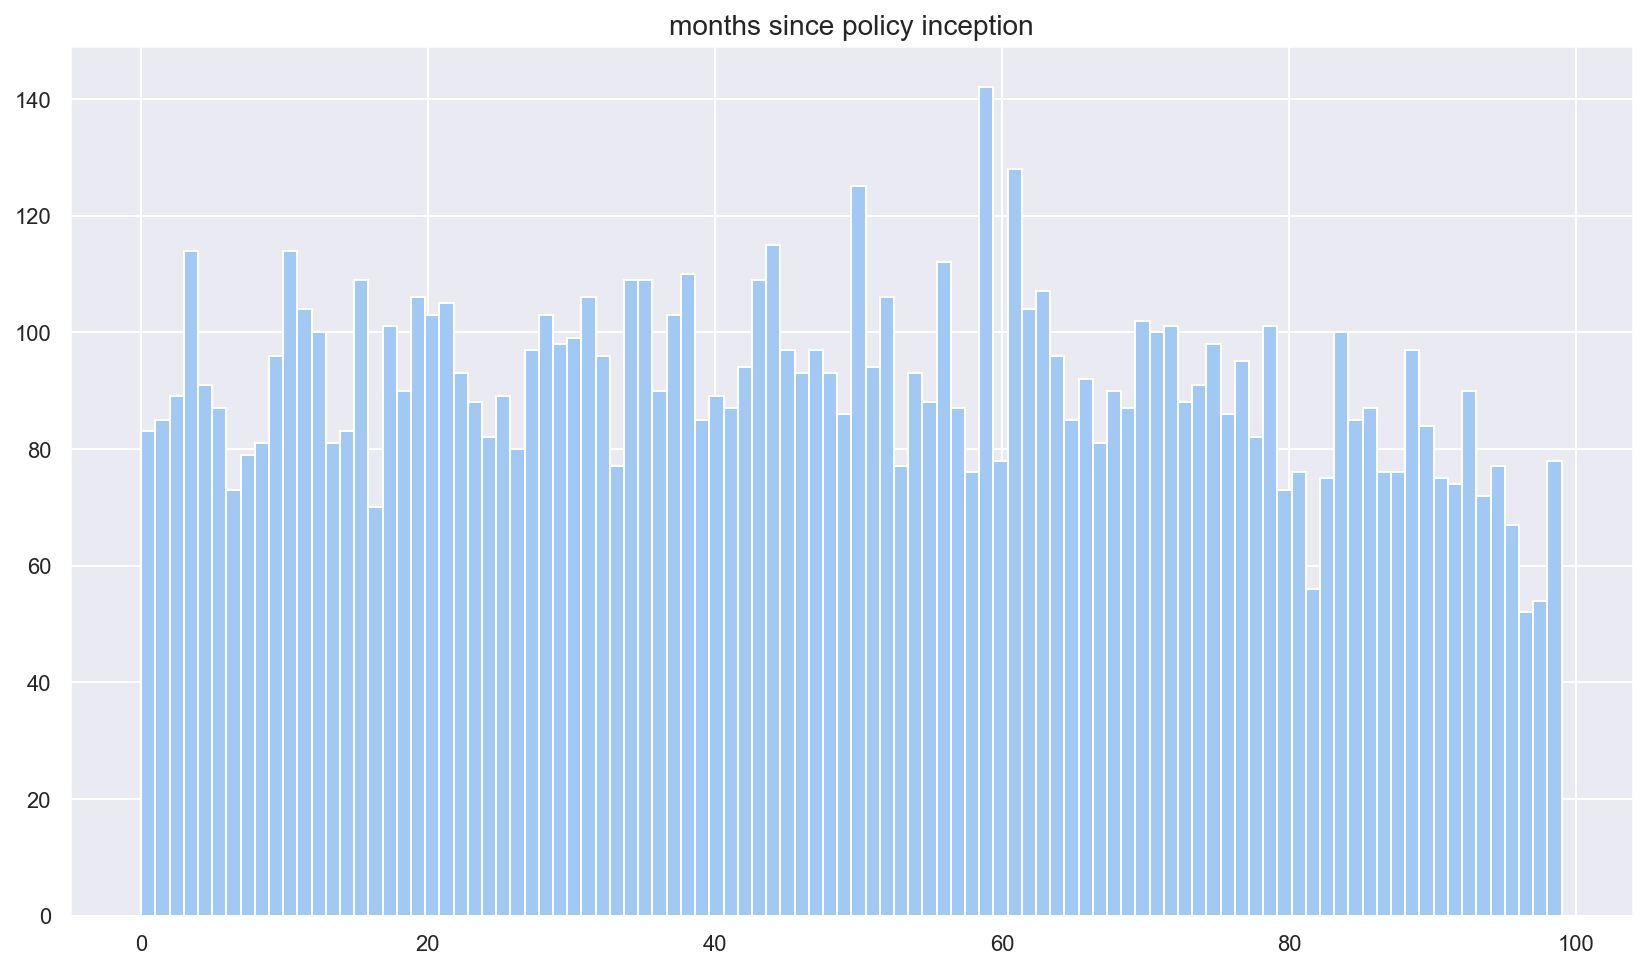

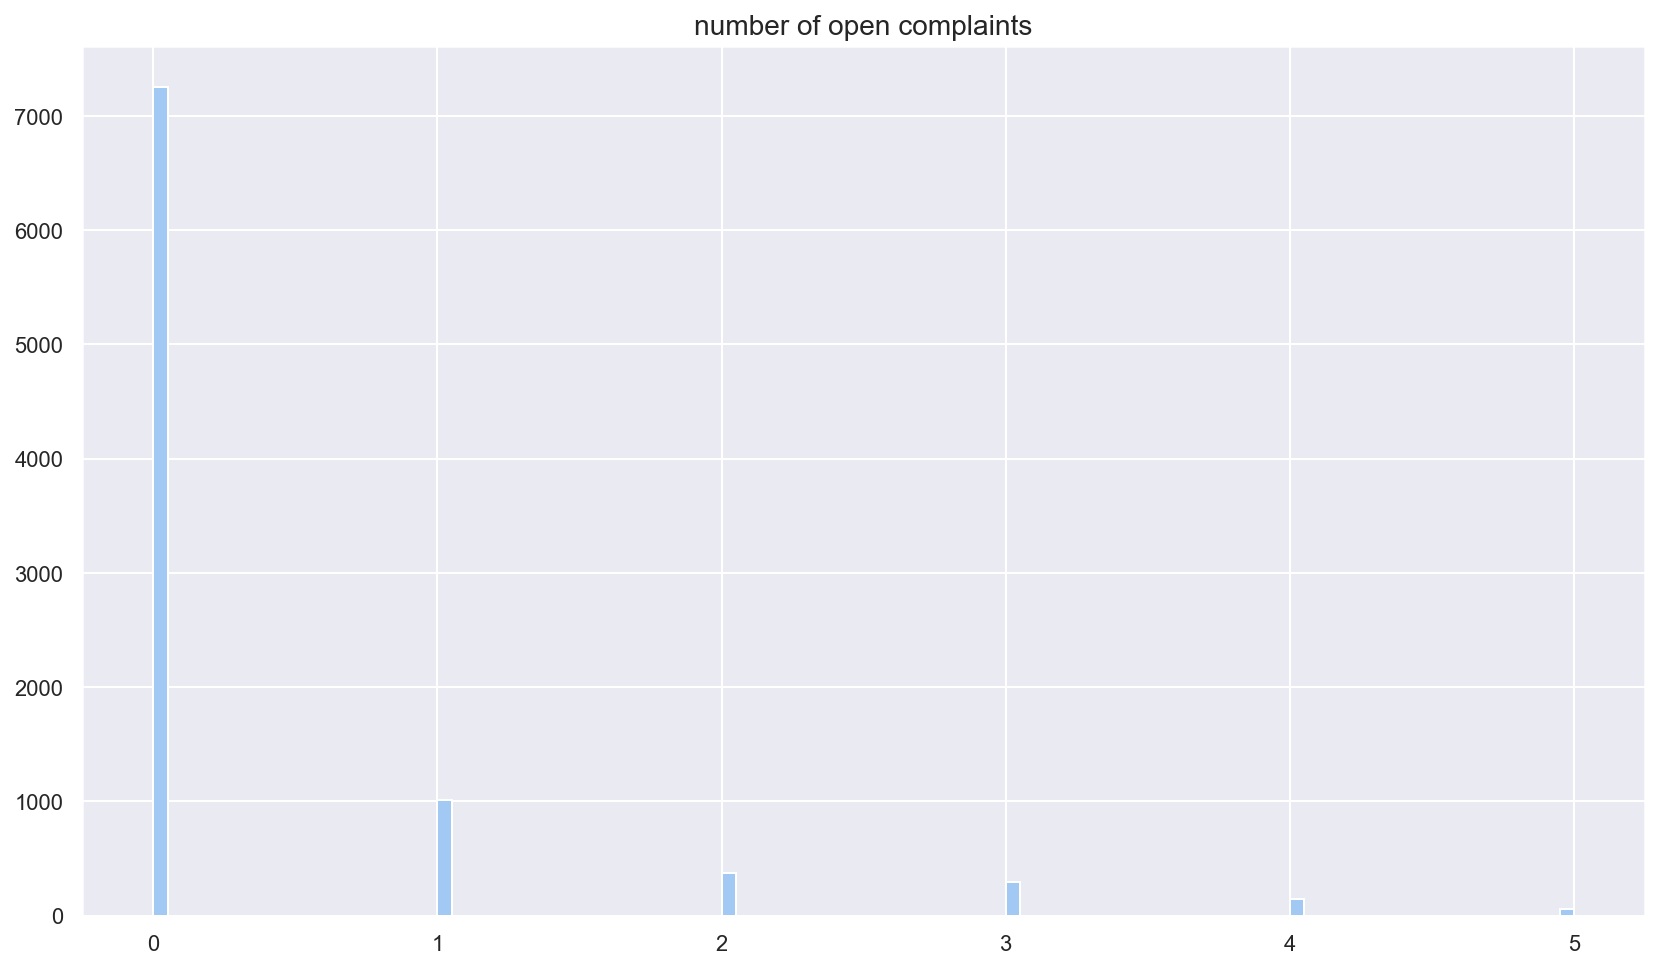

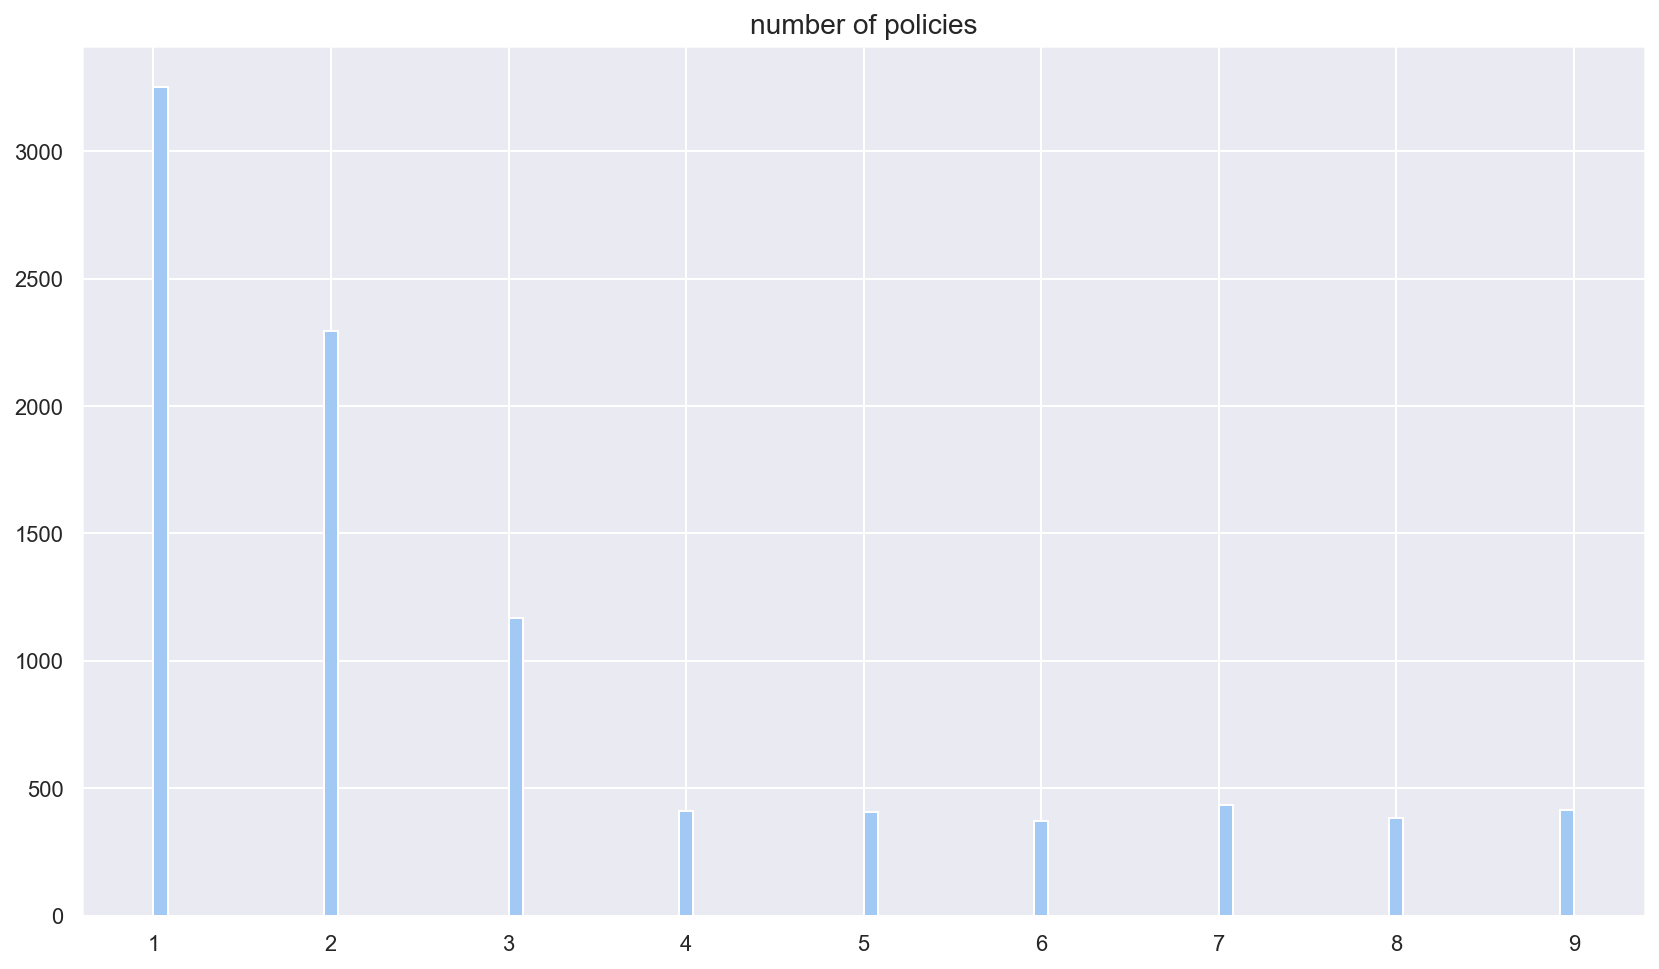

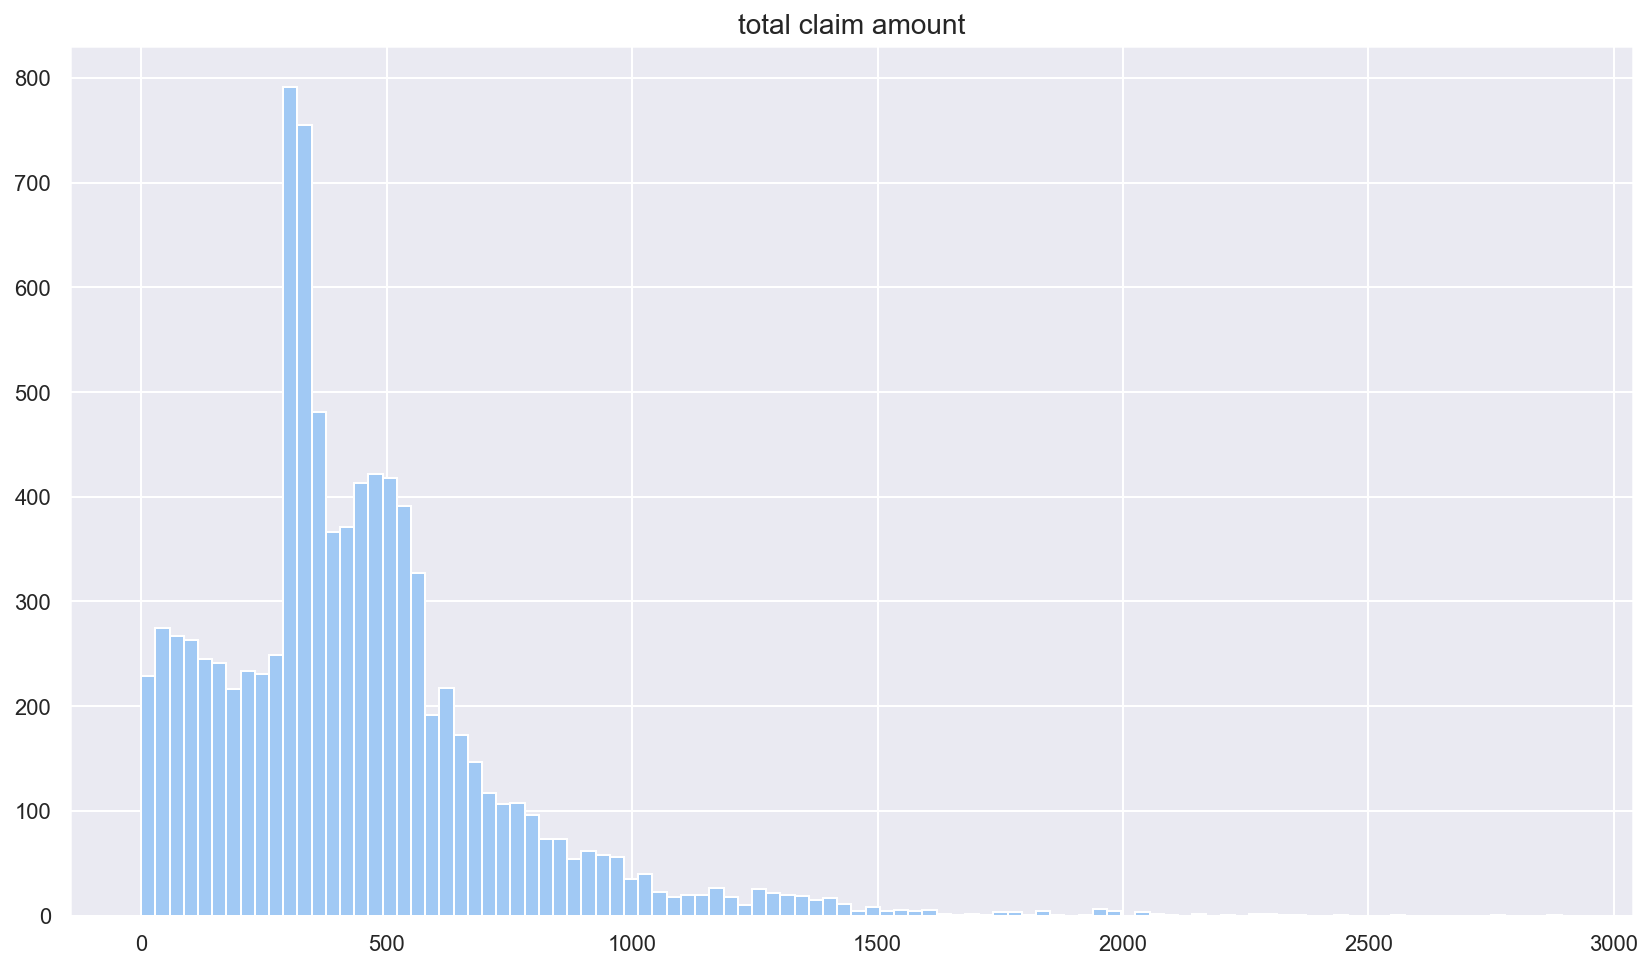

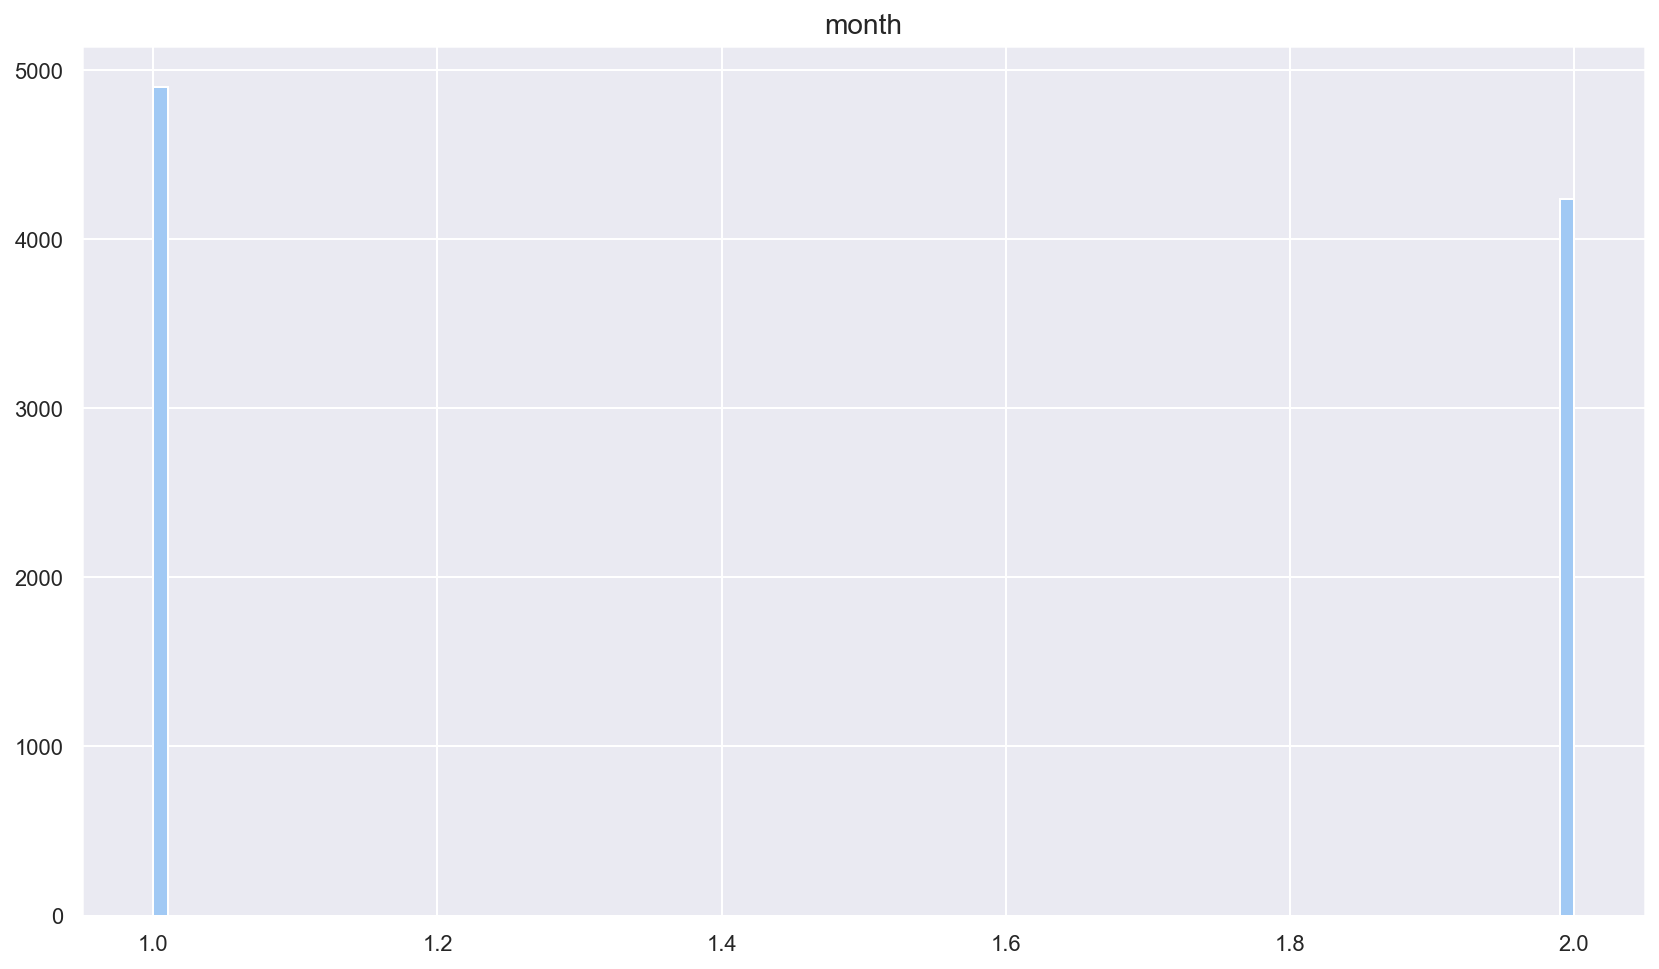

In [214]:
# Use Matplotlib to construct histograms
for col in df_num:
    plt.hist(df[col], bins=100)
    plt.title(f'{col}', fontsize=14)
    plt.show()

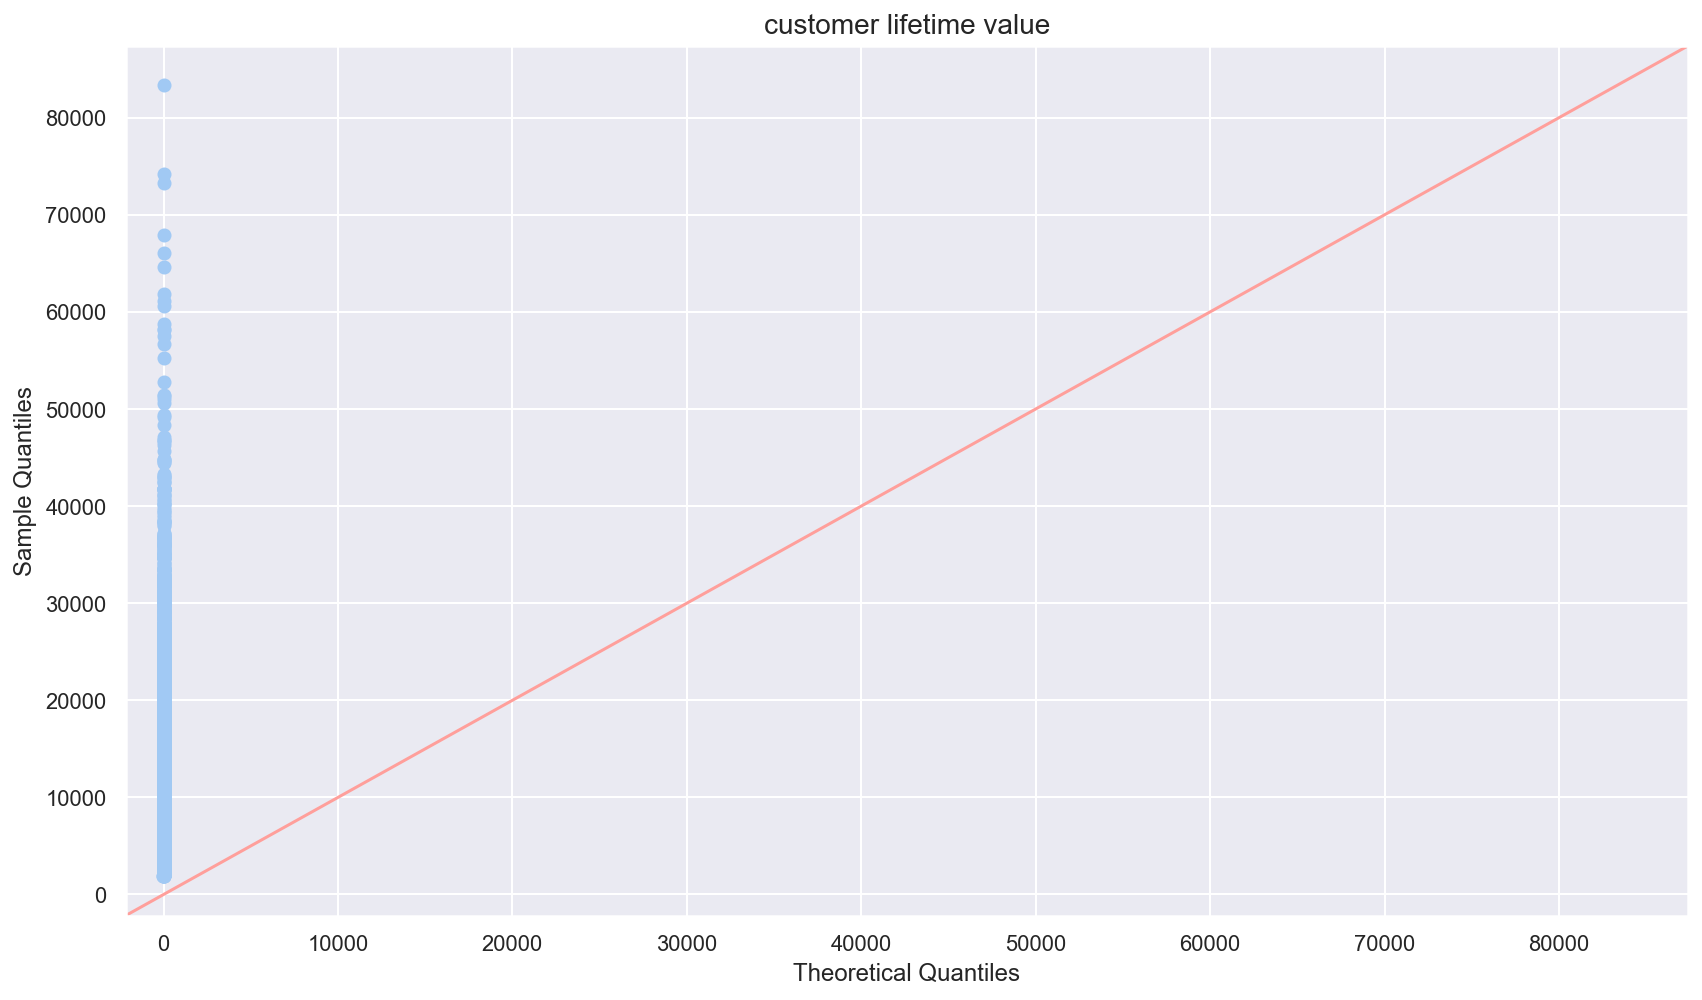

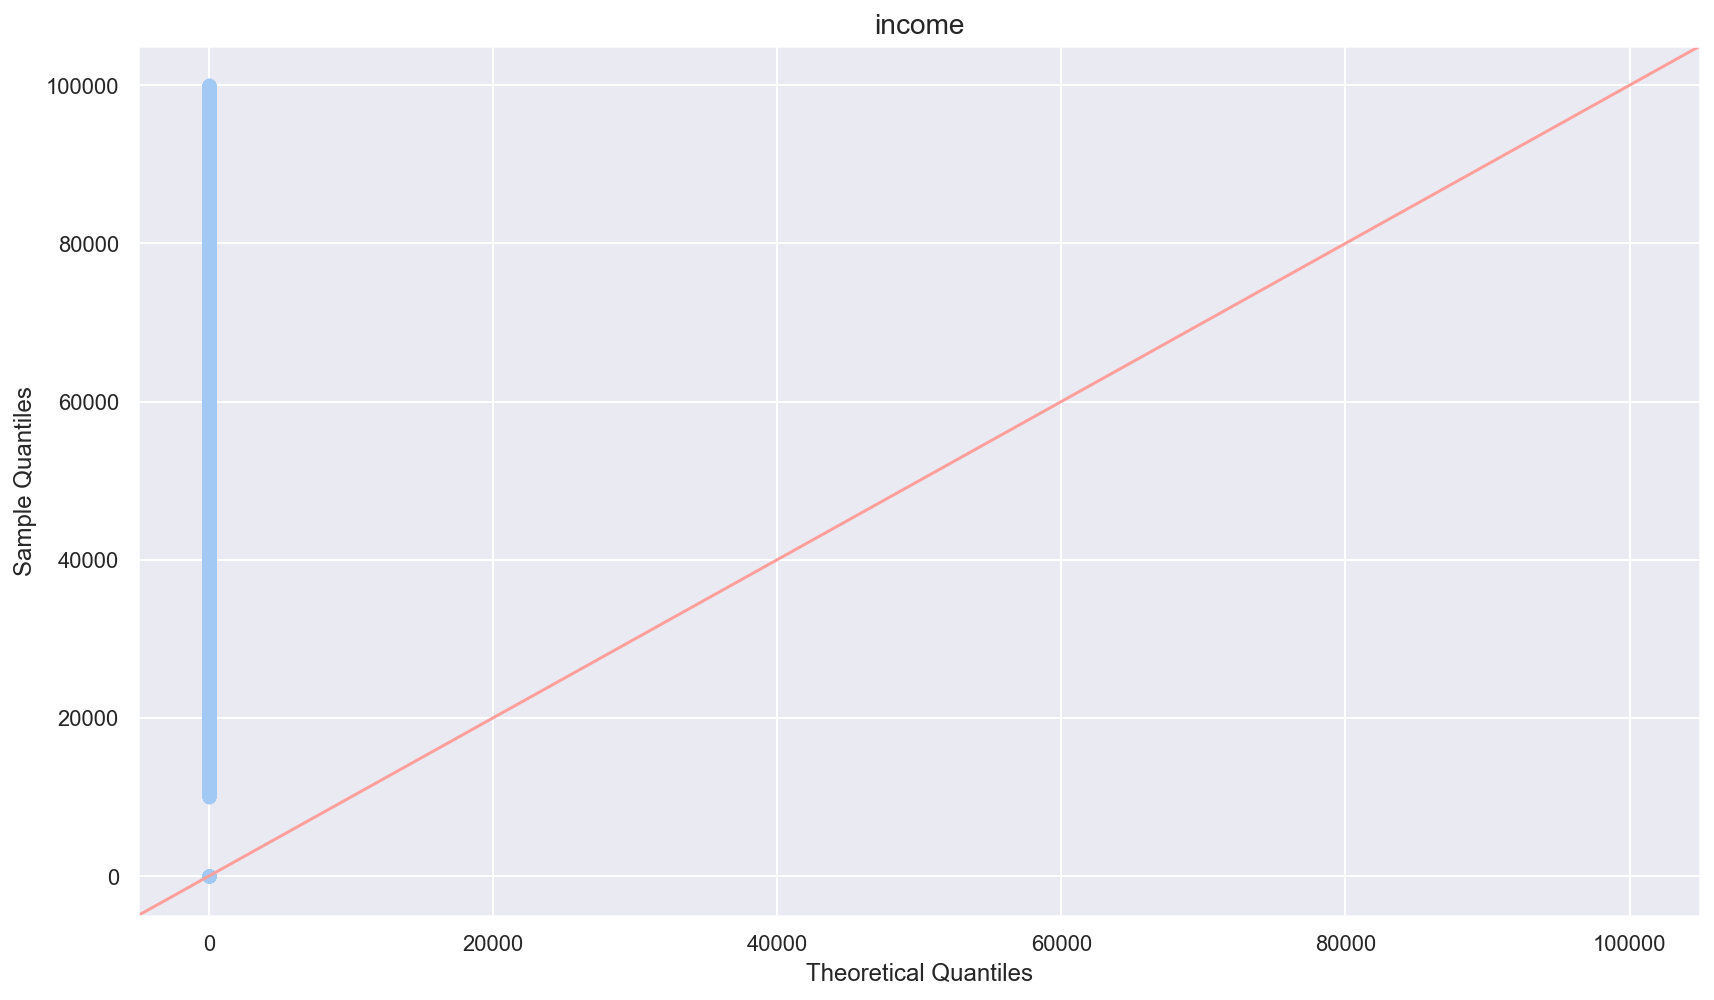

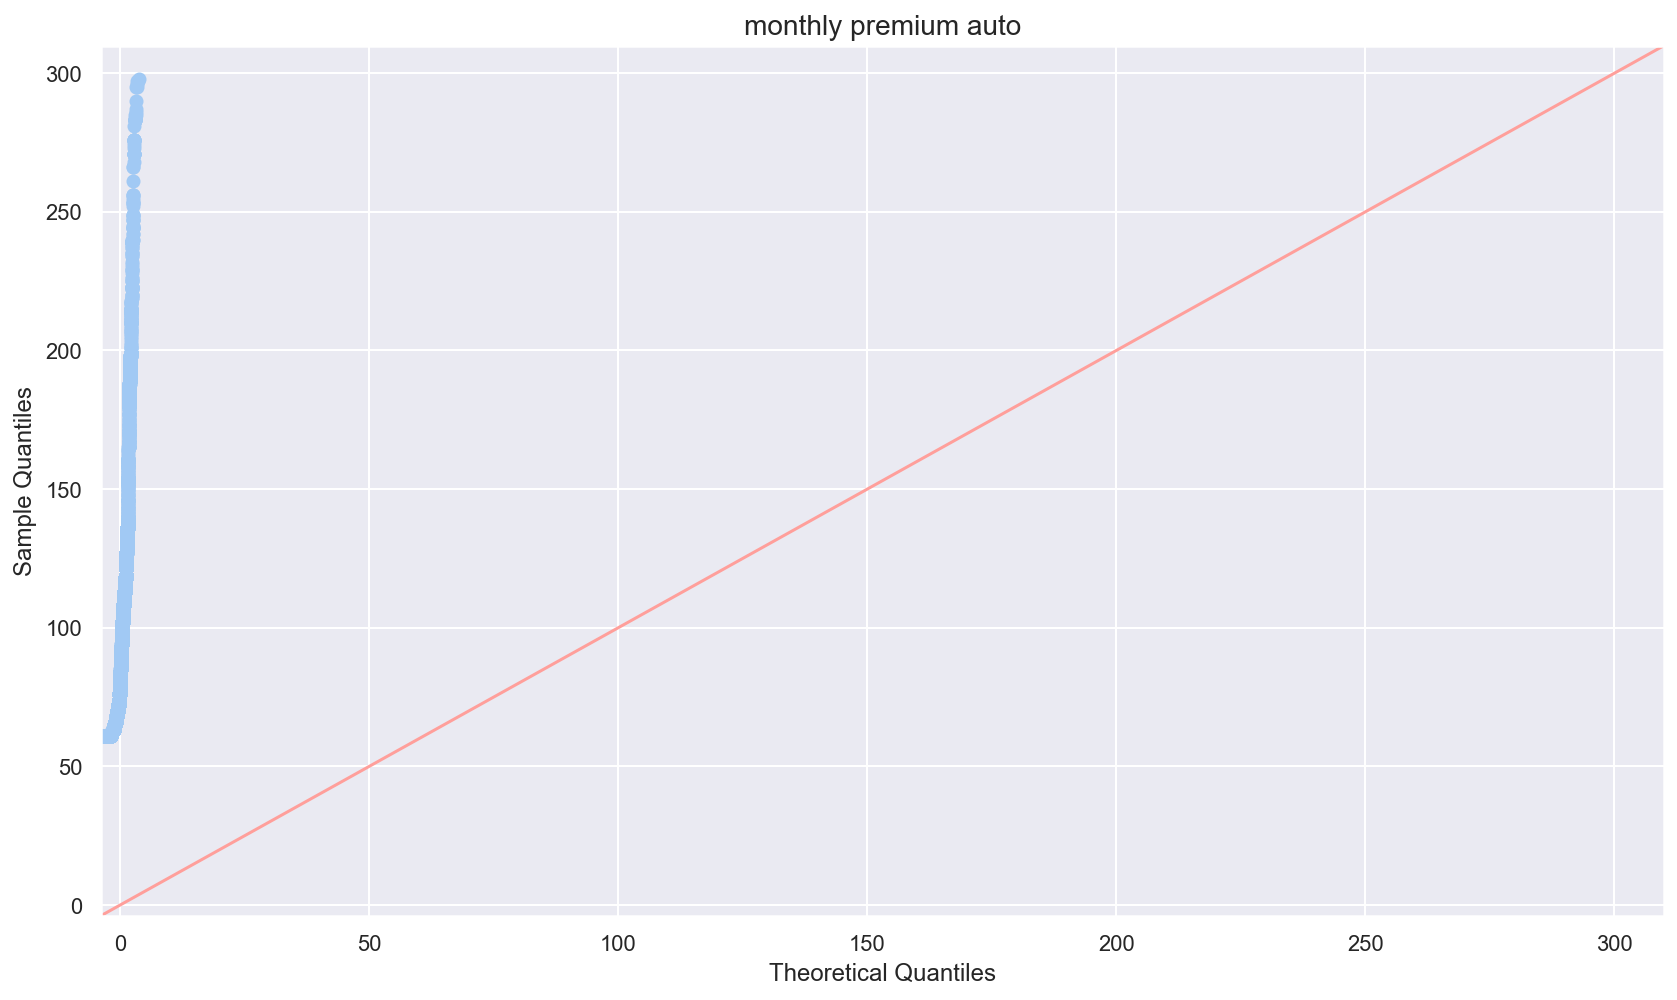

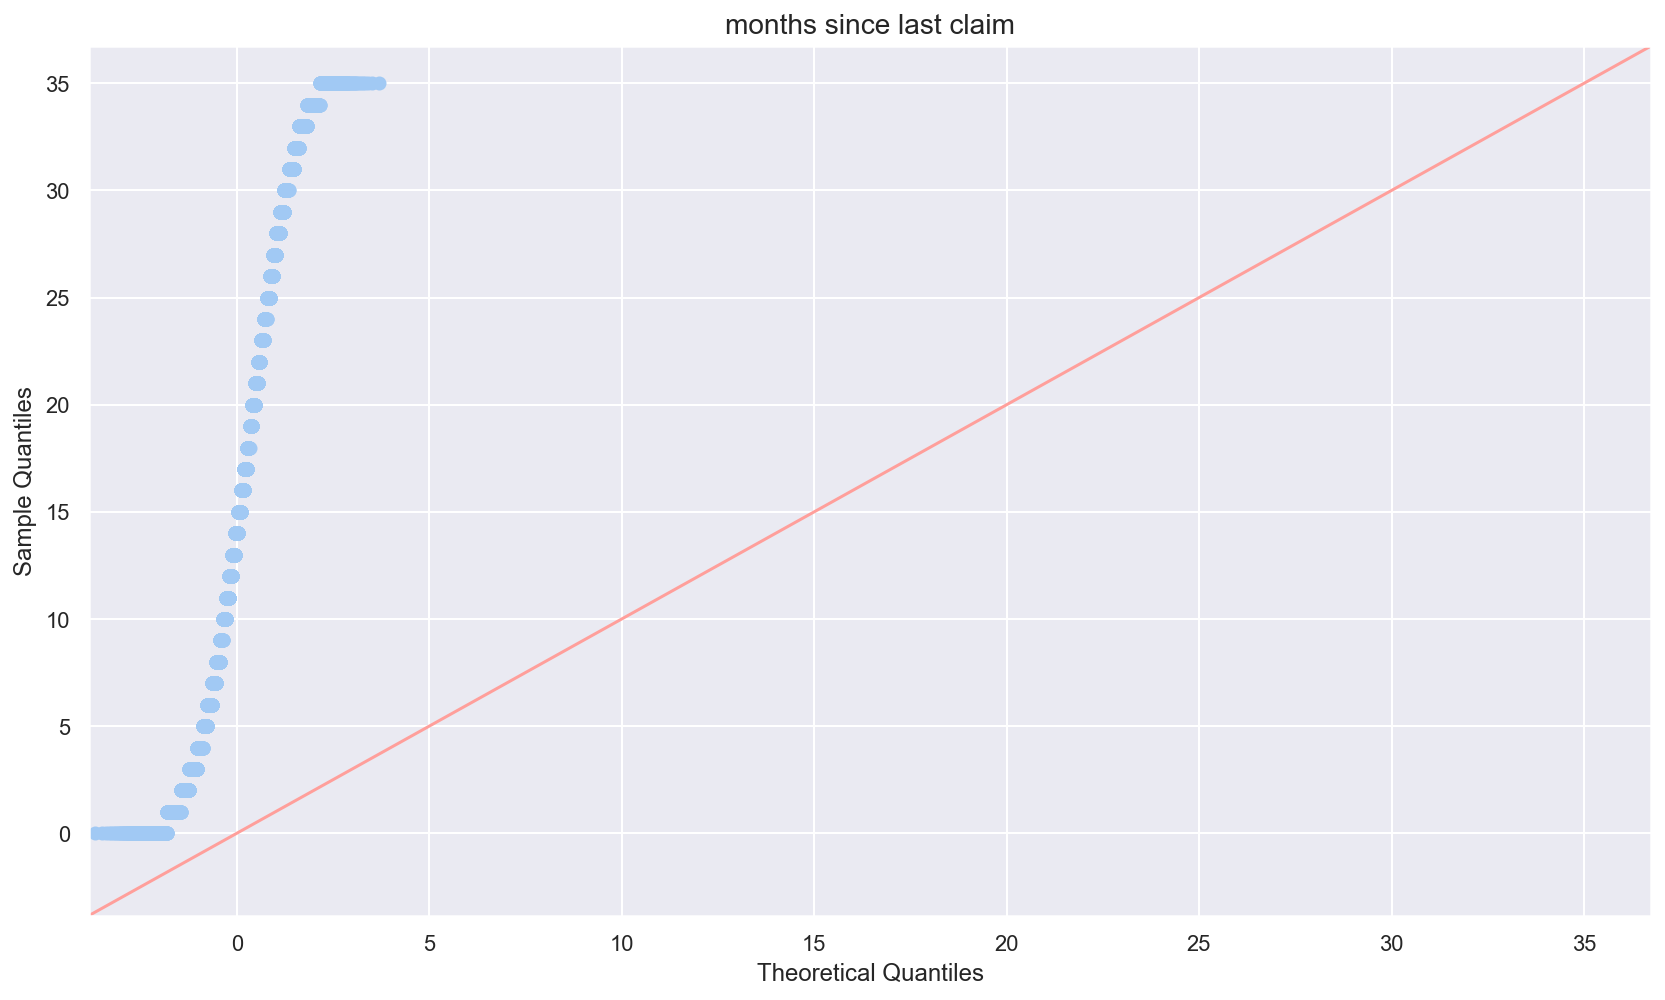

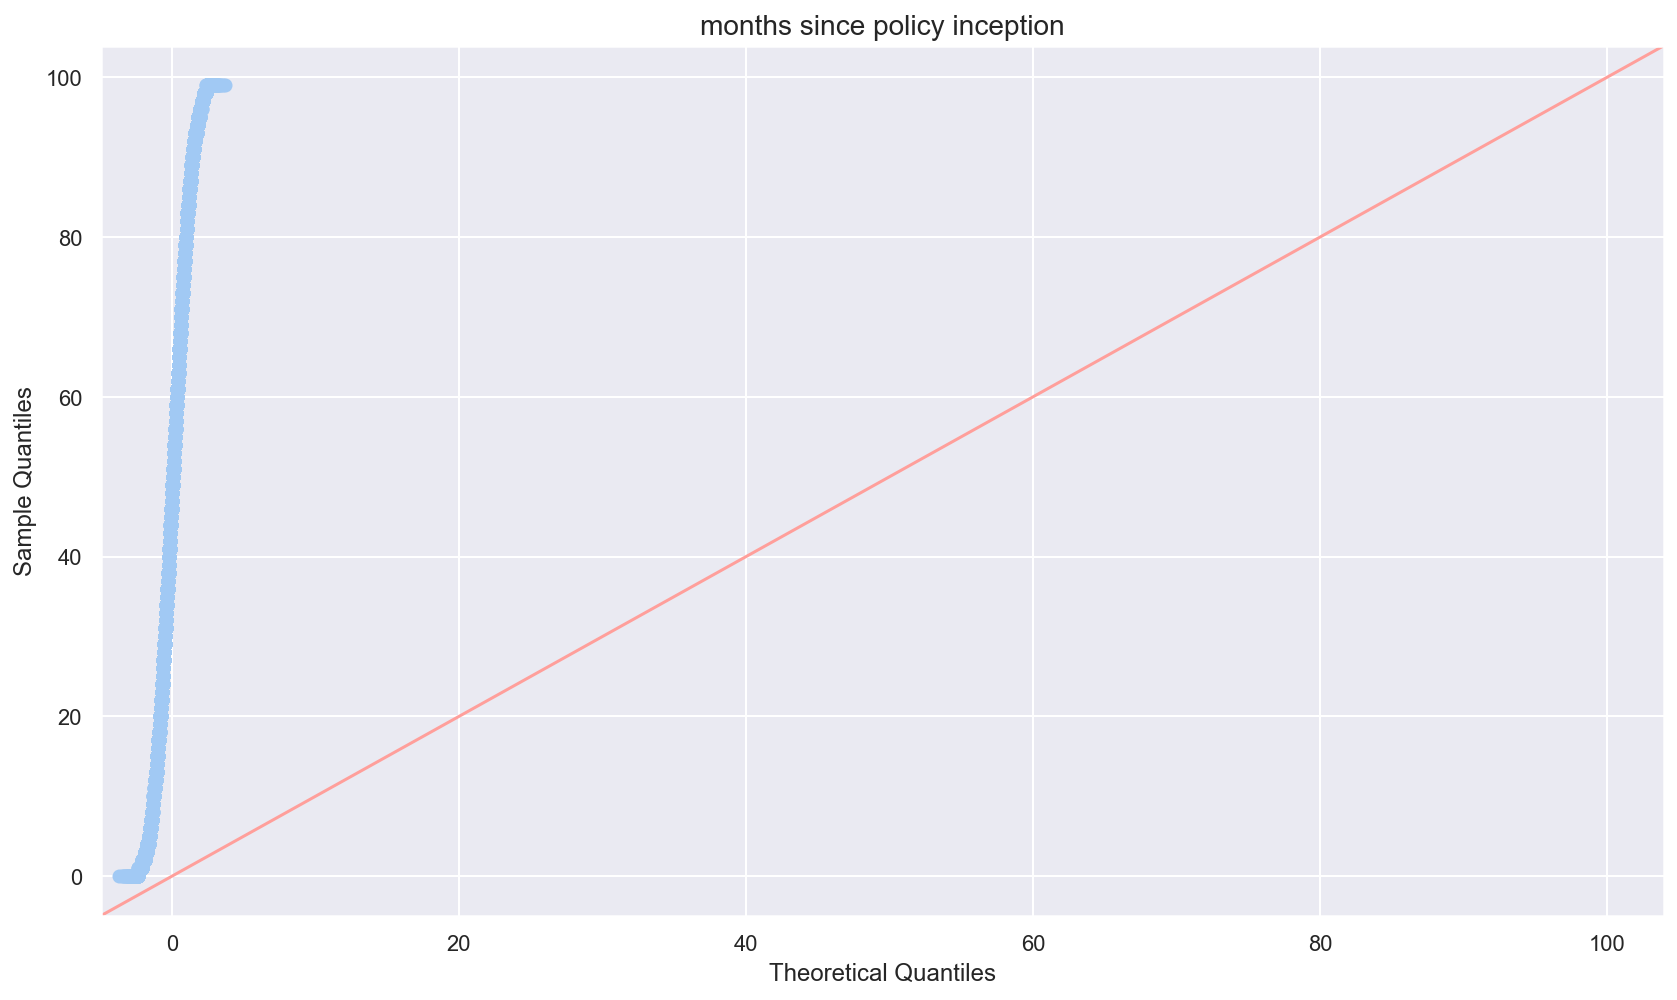

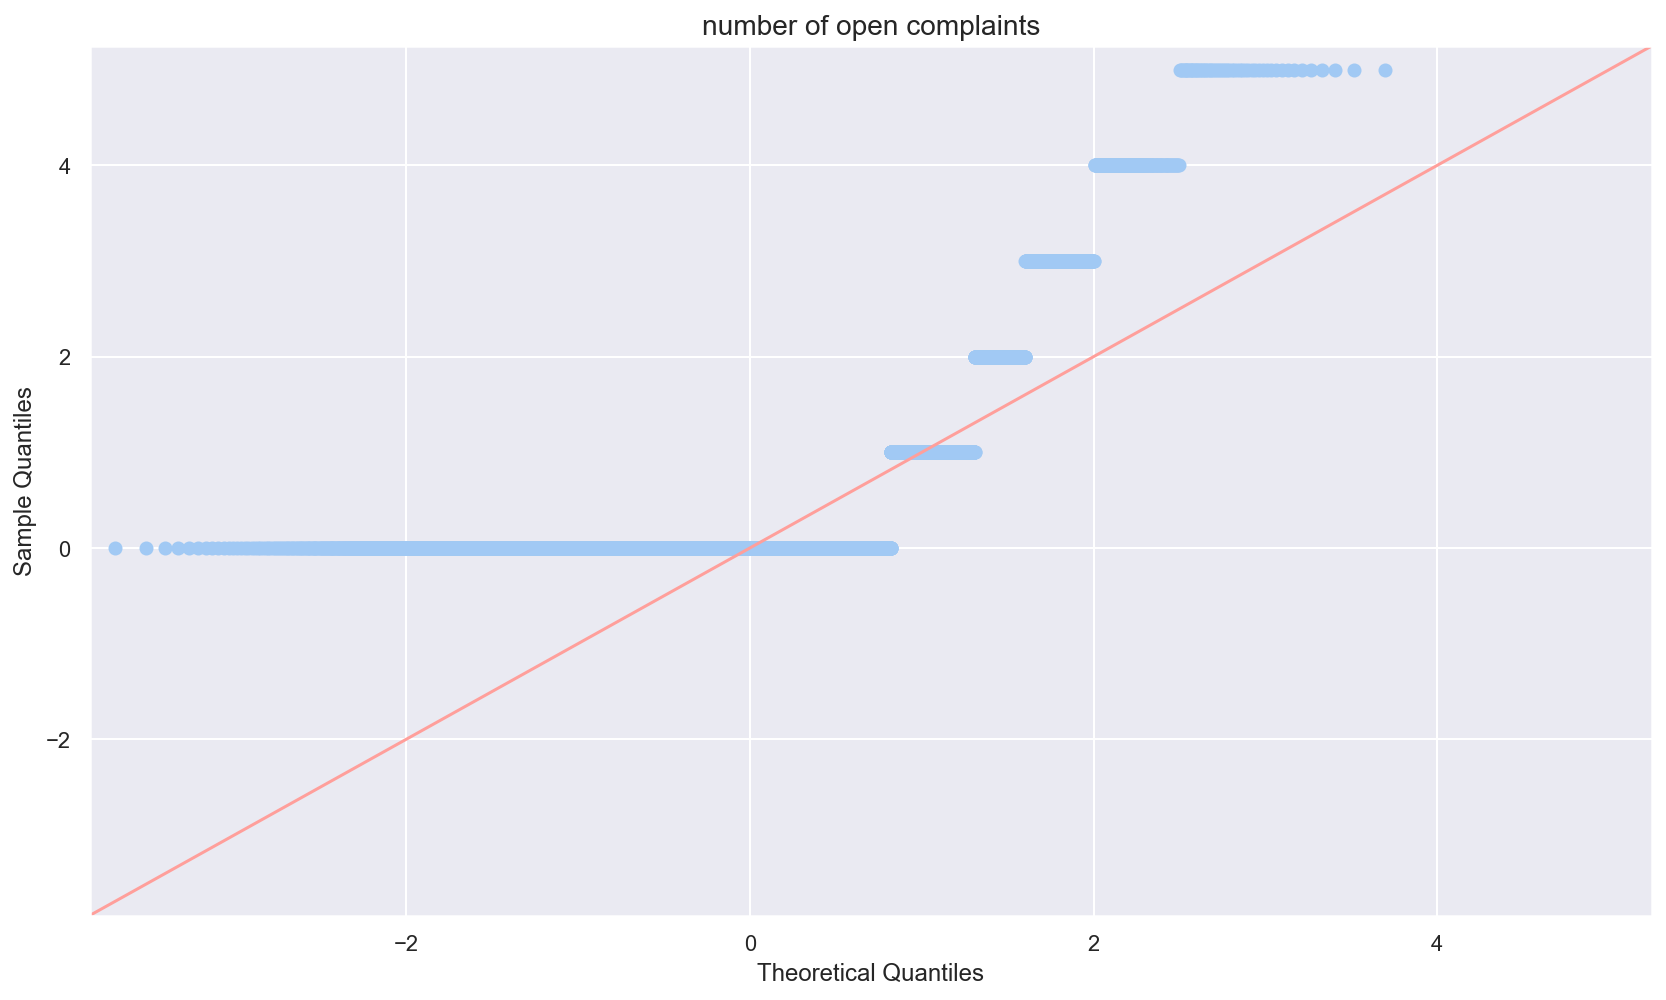

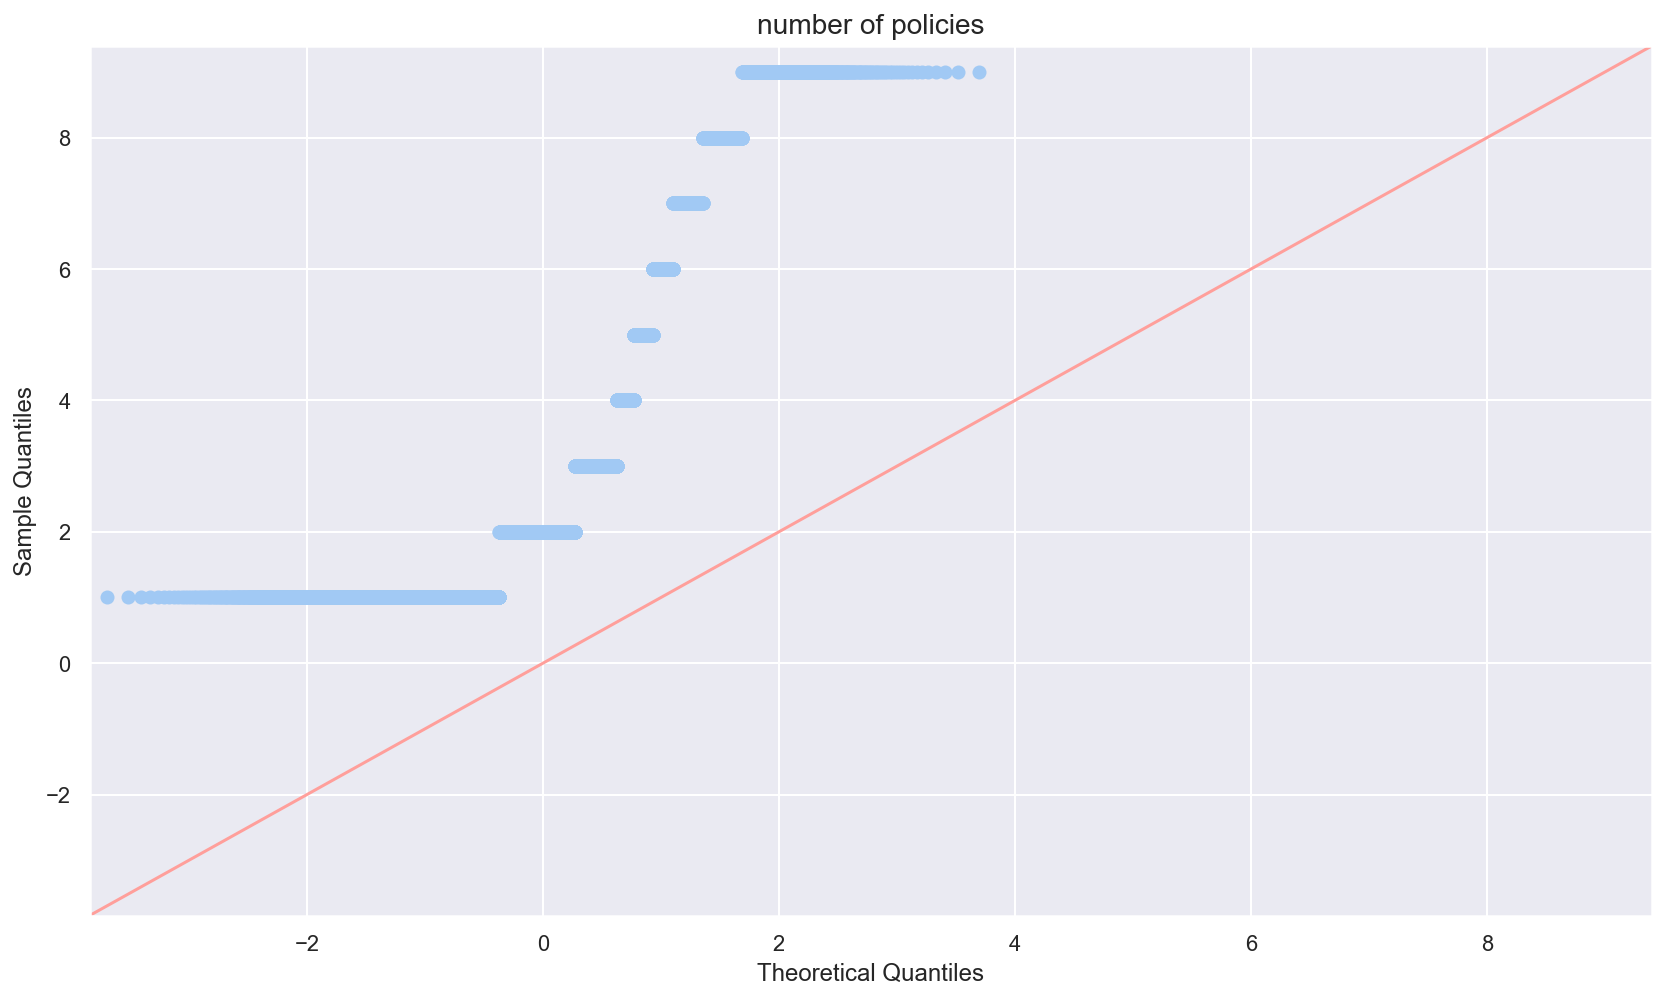

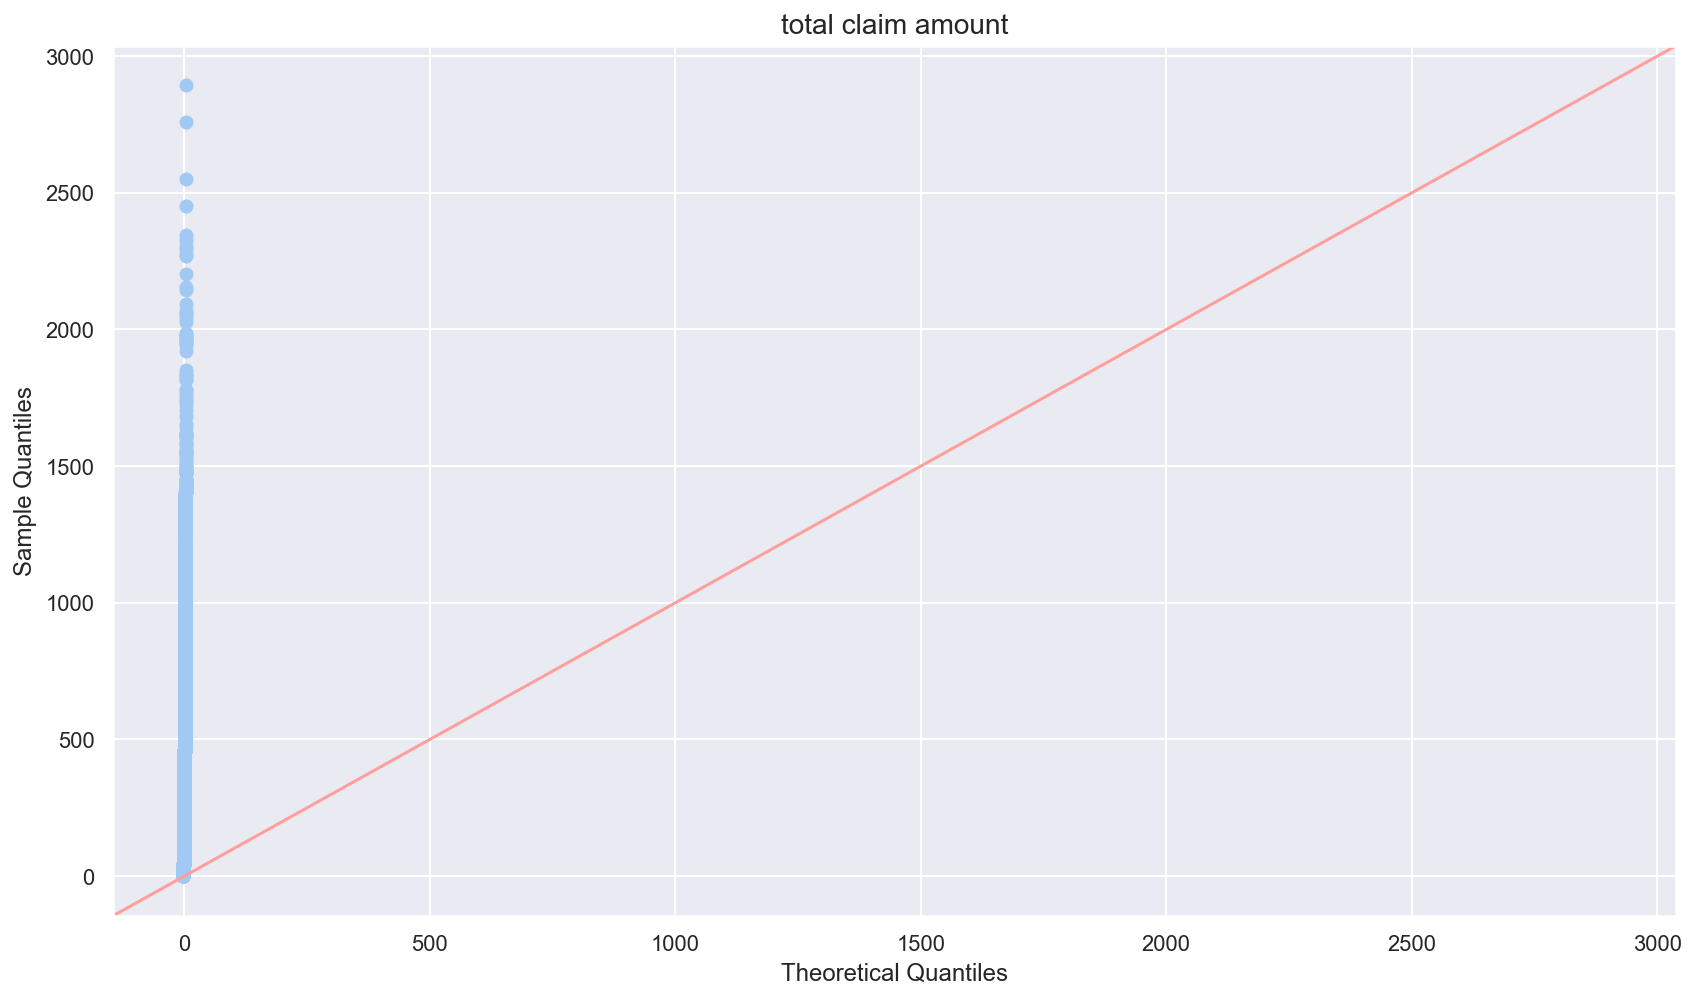

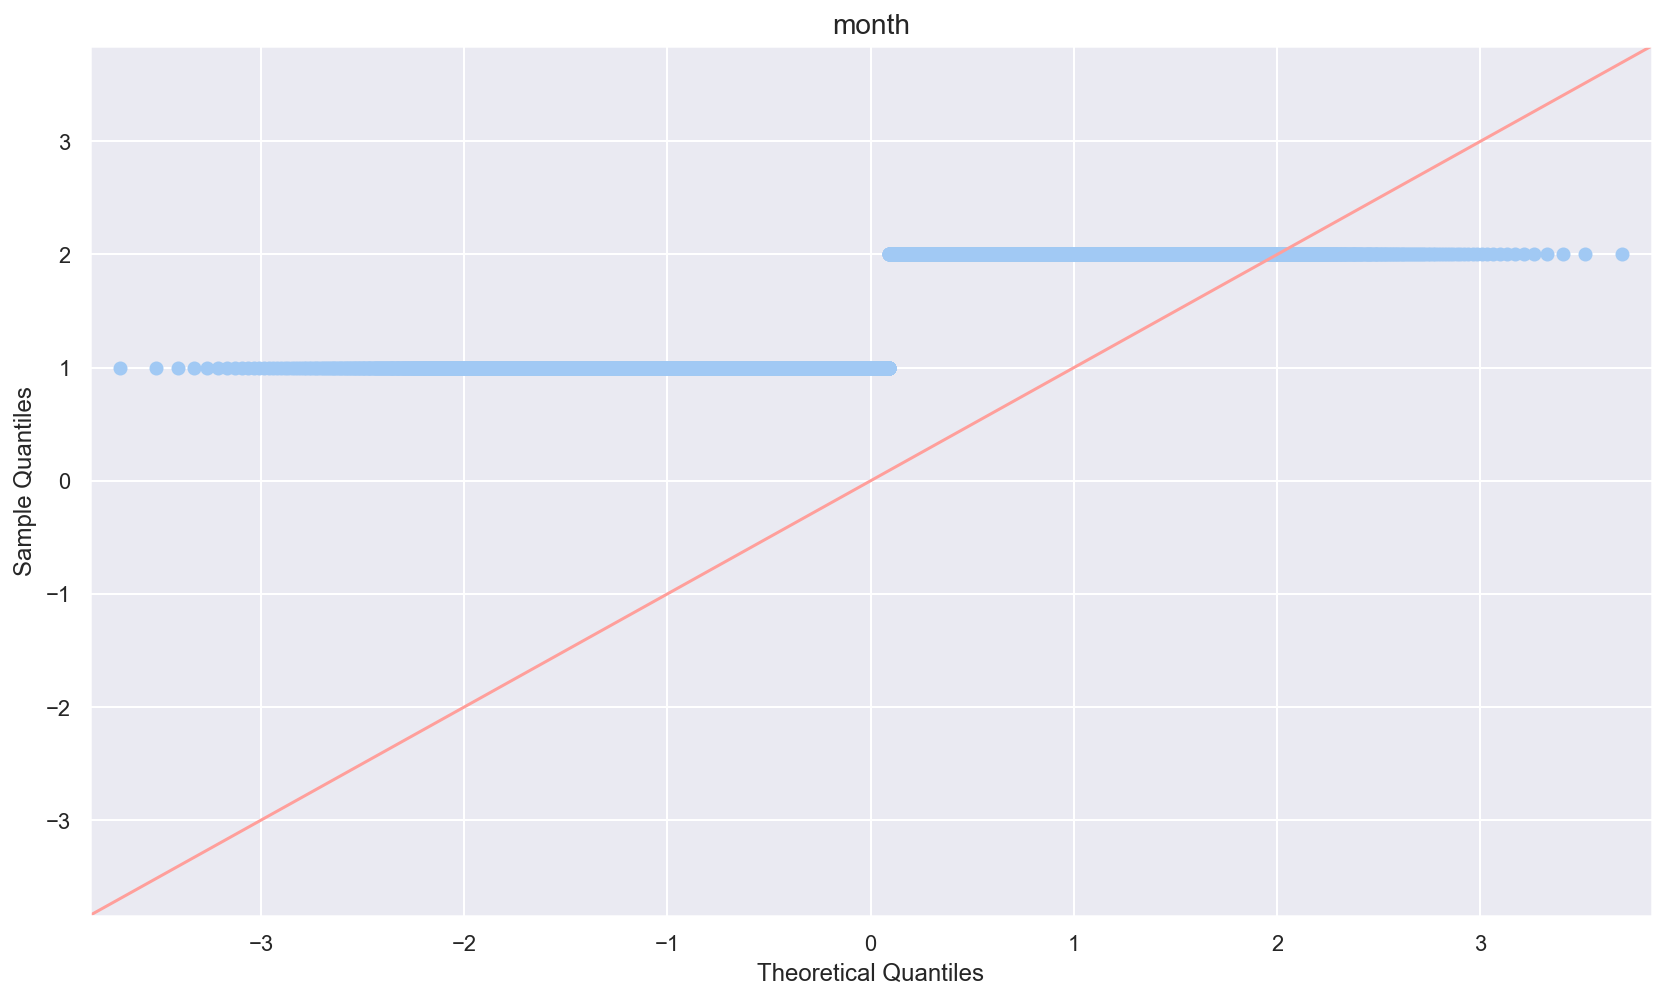

In [215]:
#For loop to plot the QQ plots of the columns
for col in df_num:
    fig = sm.qqplot(df[col], line='45')
    plt.title(f'{col}', fontsize=14)
    plt.show()

## Use seaborn library to construct distribution plots for the numerical variables

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


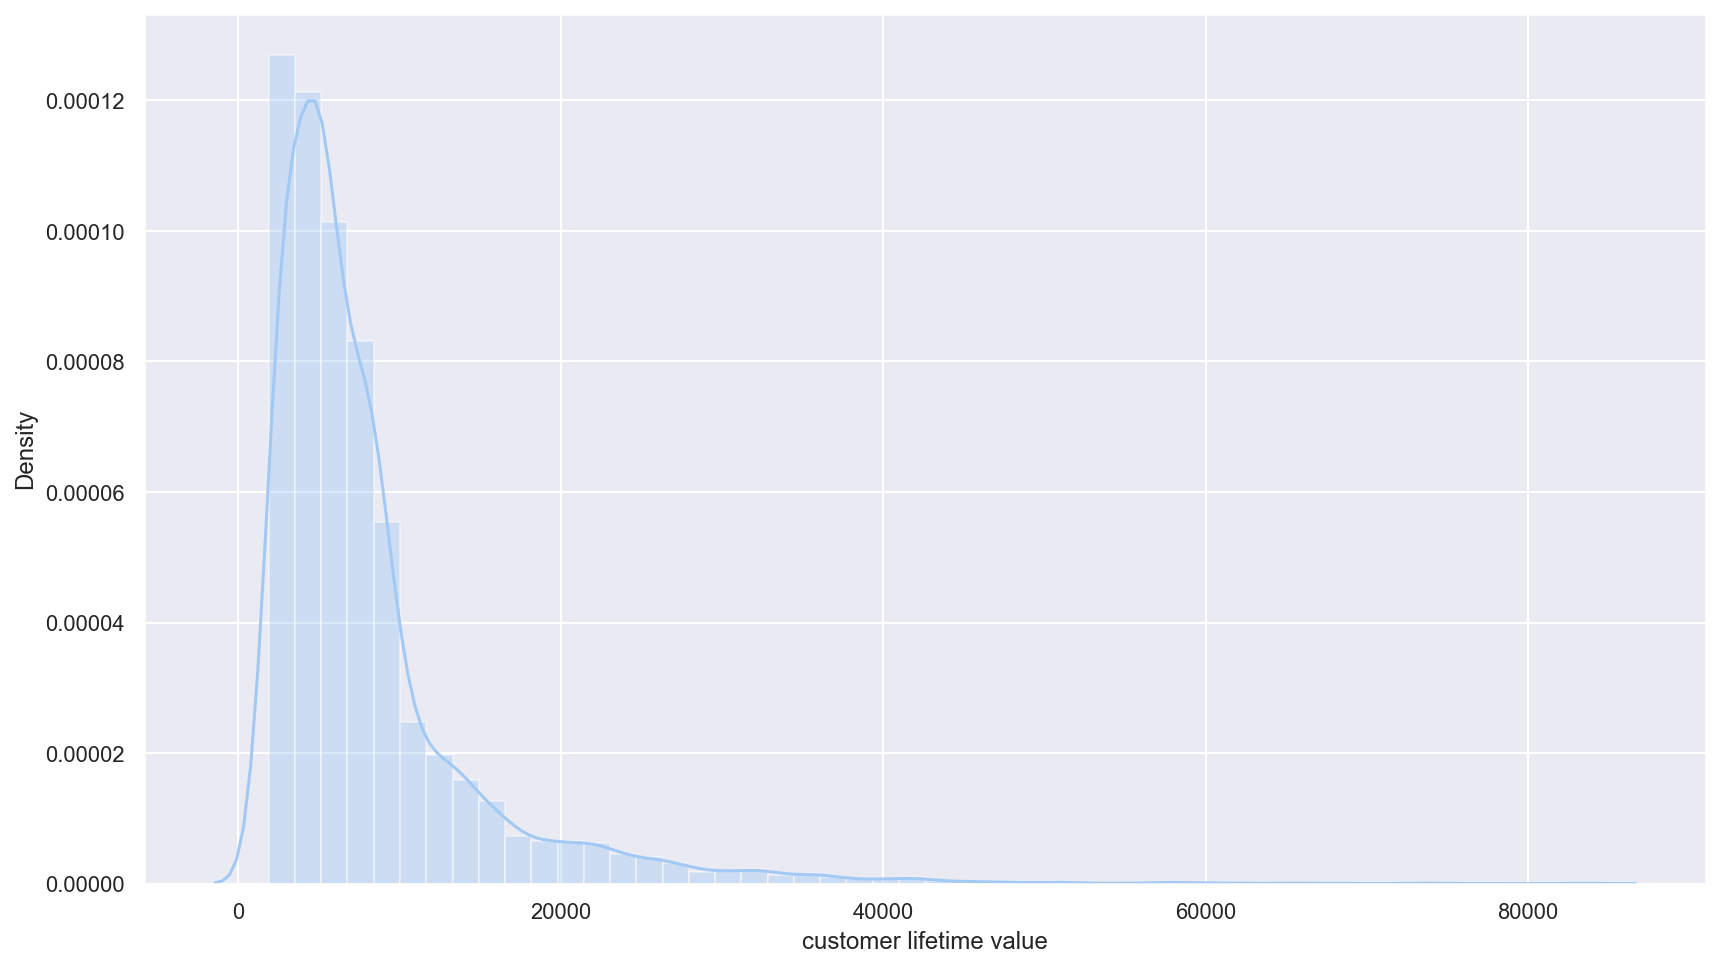

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


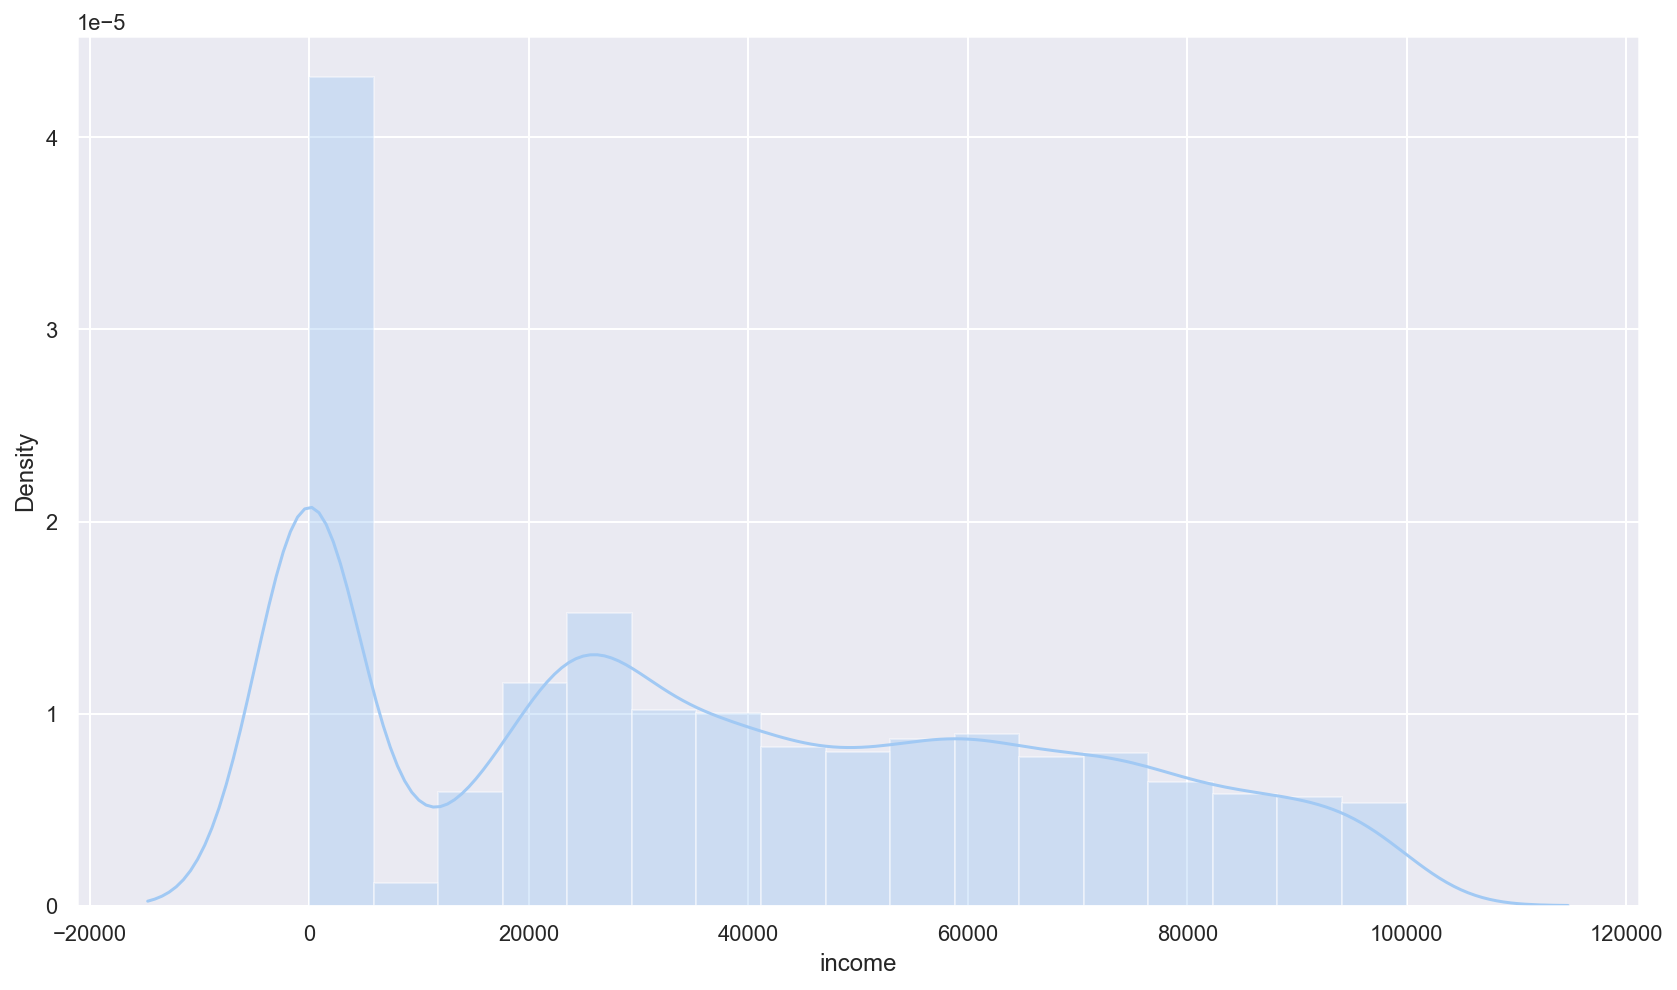

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


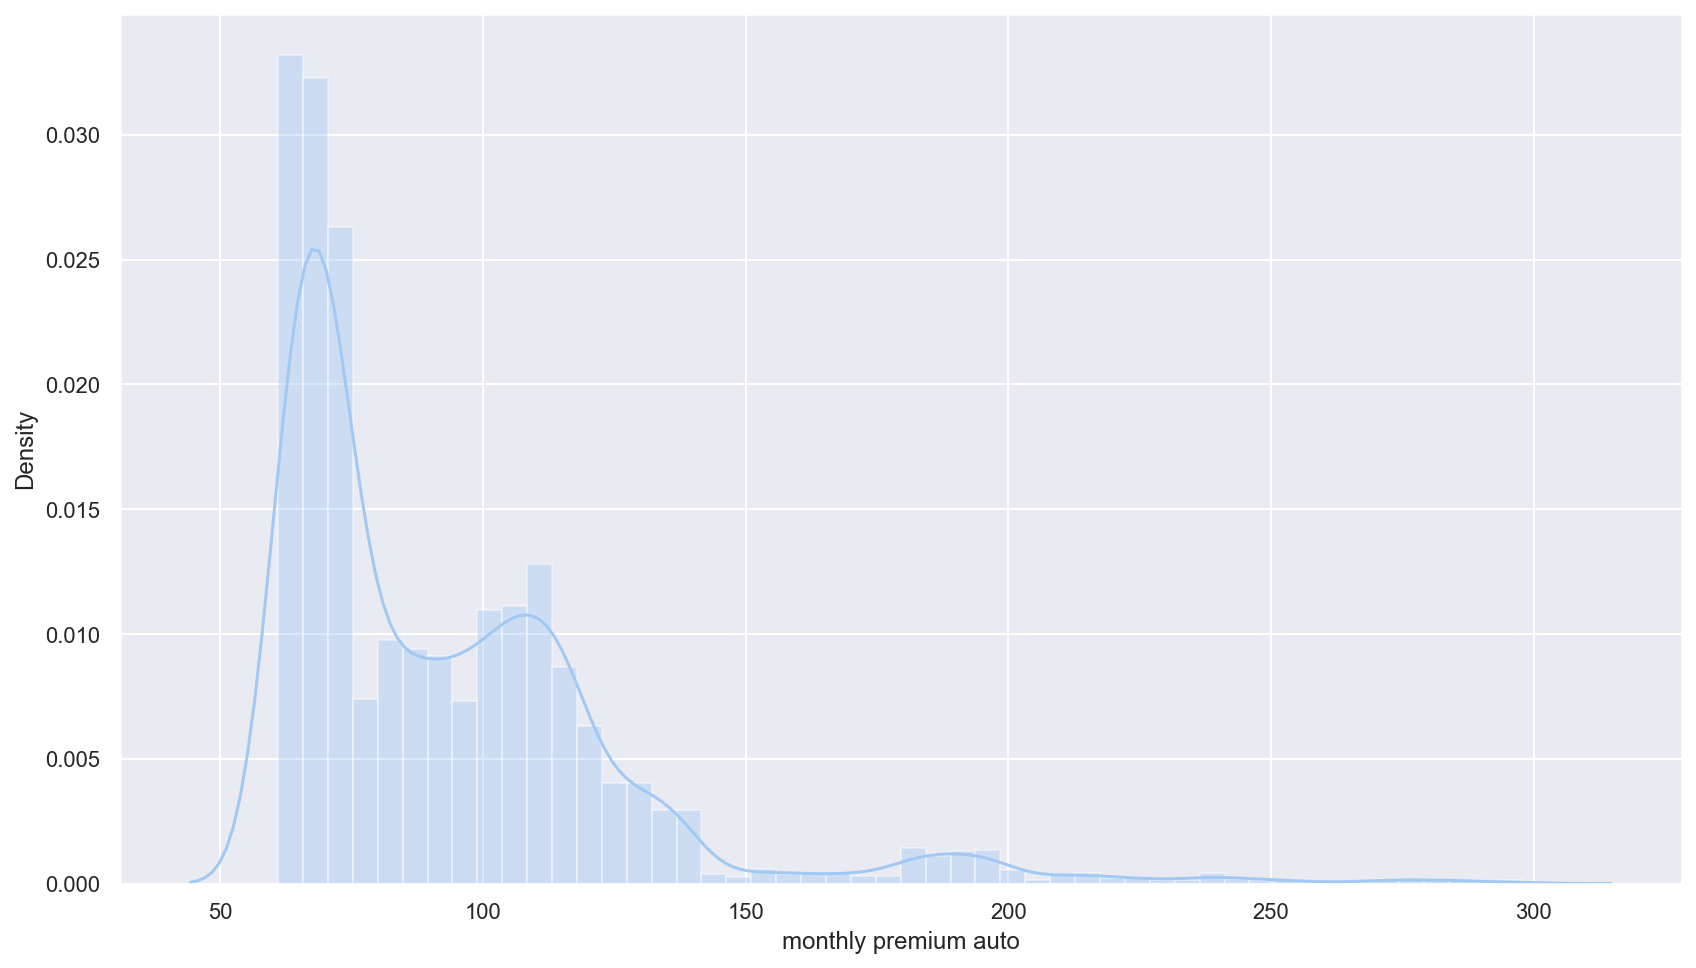

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


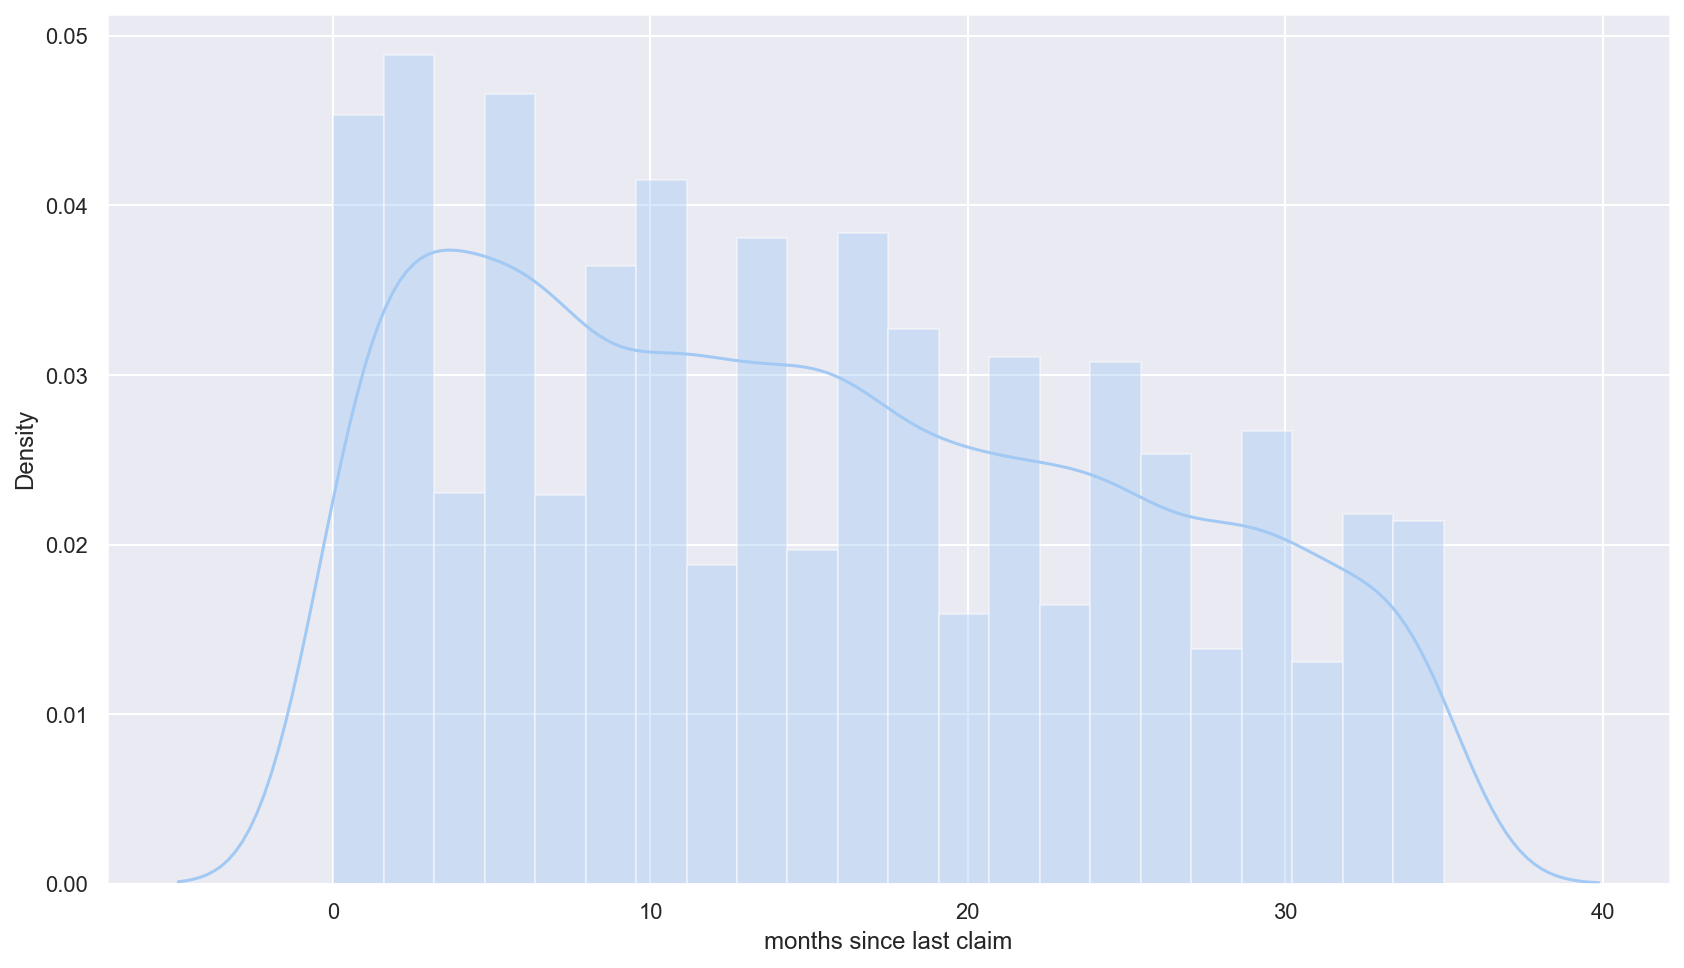

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


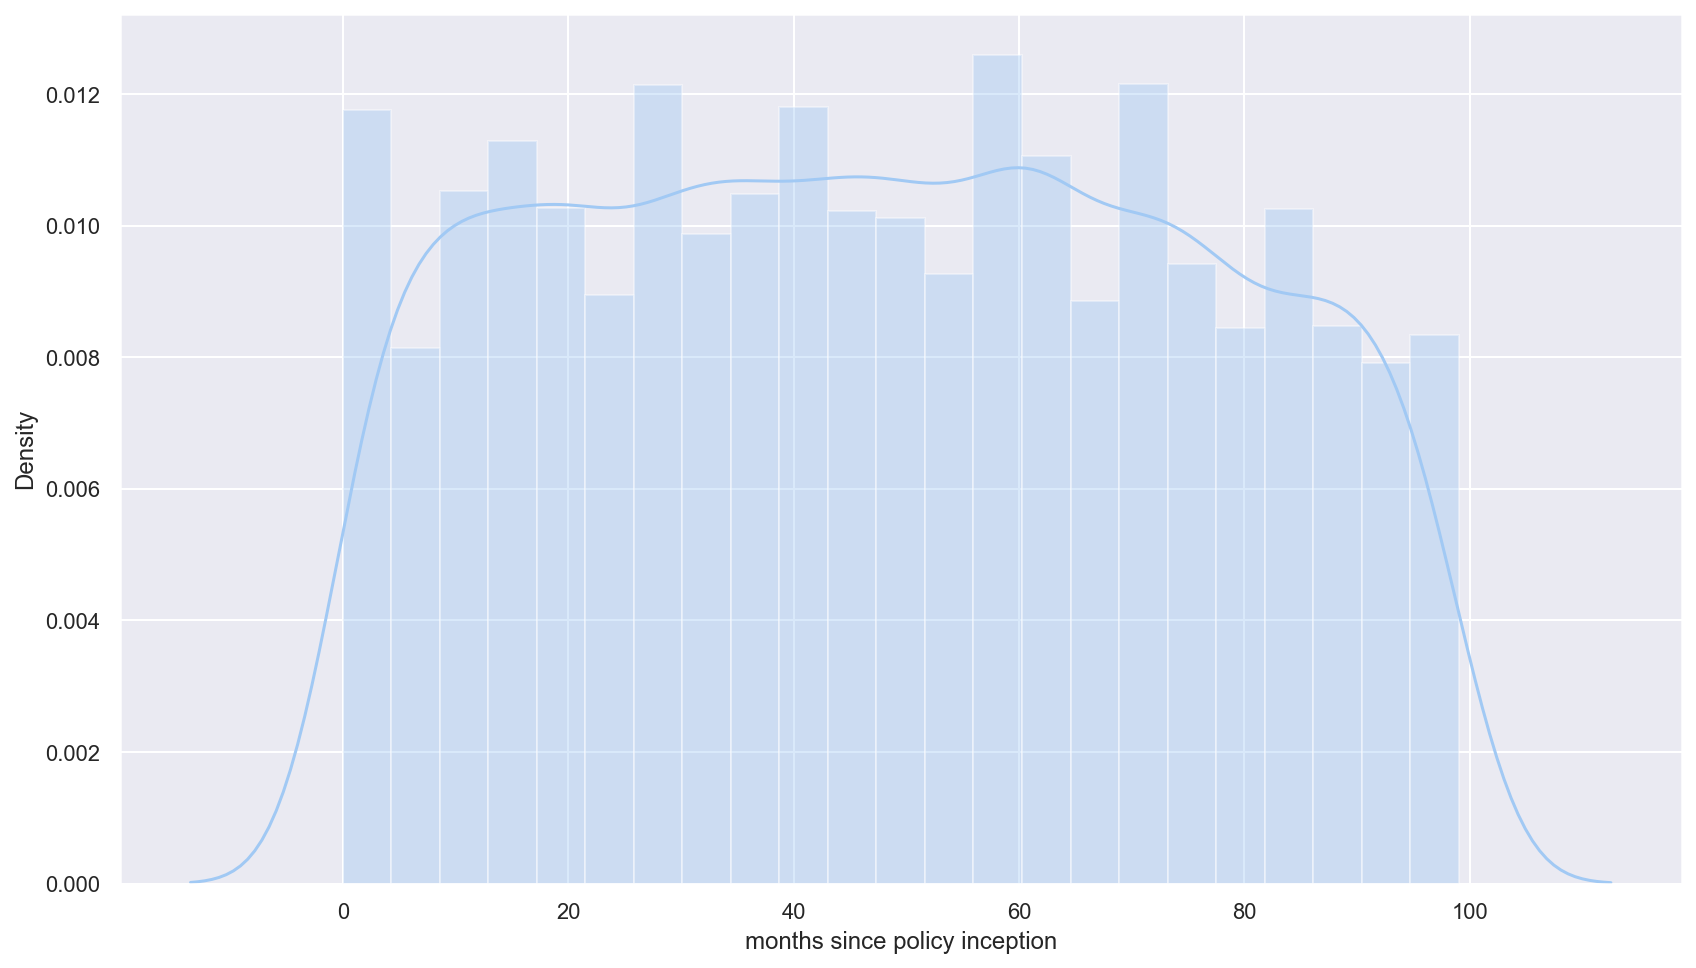

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


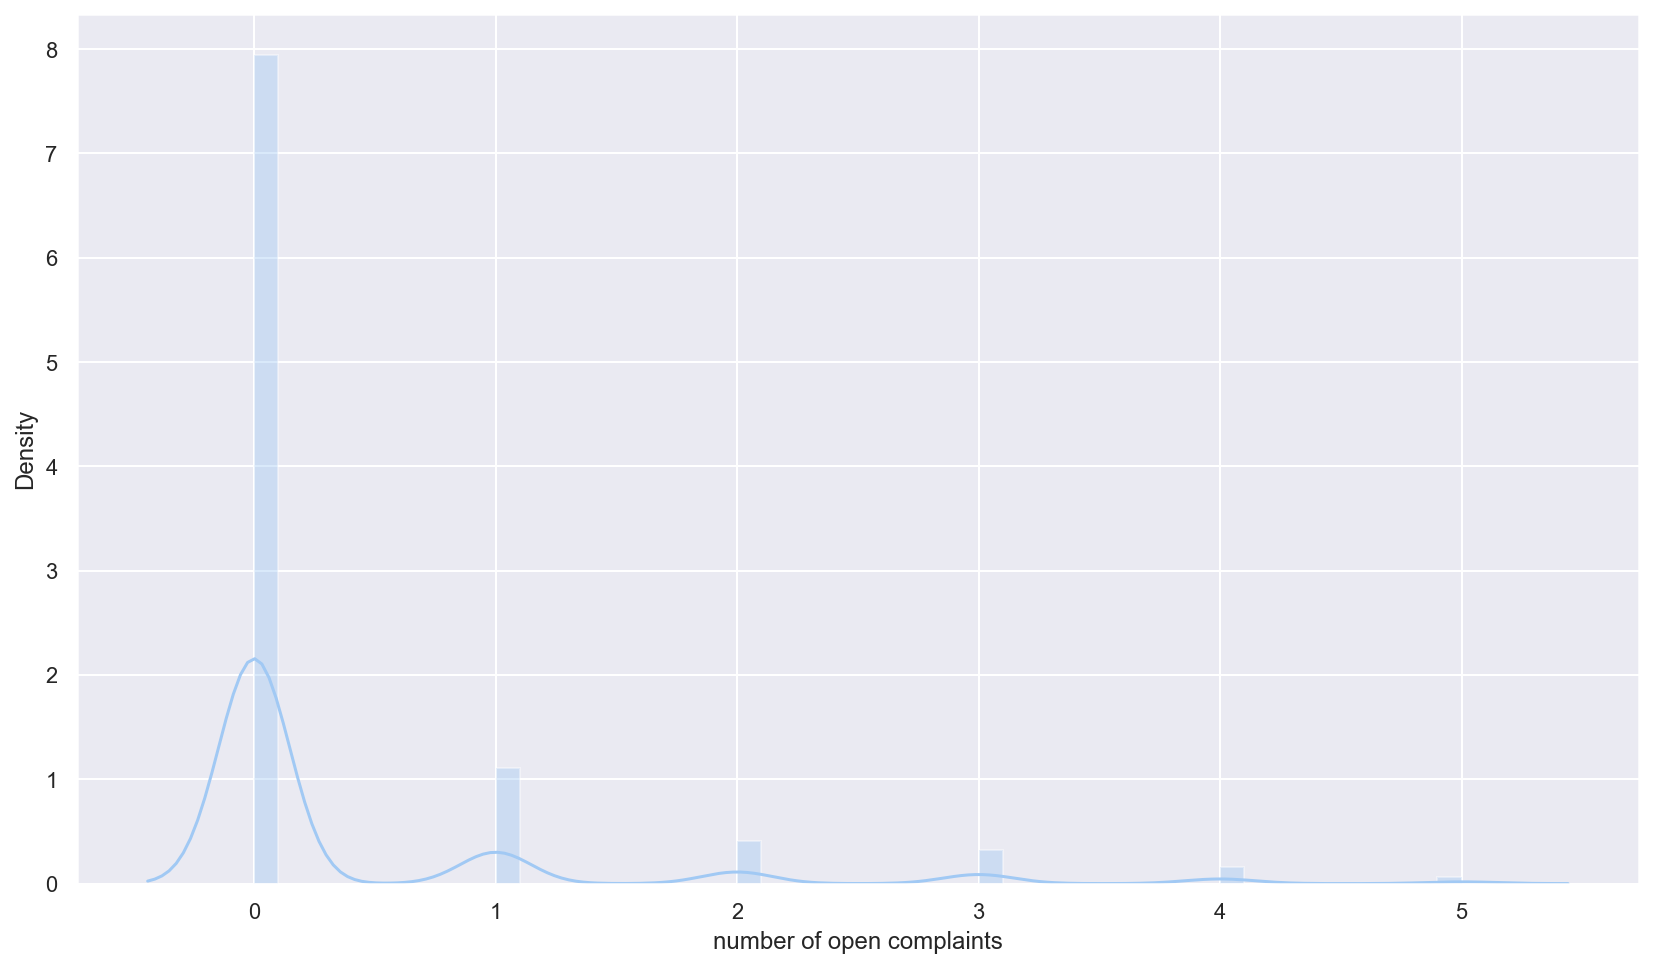

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


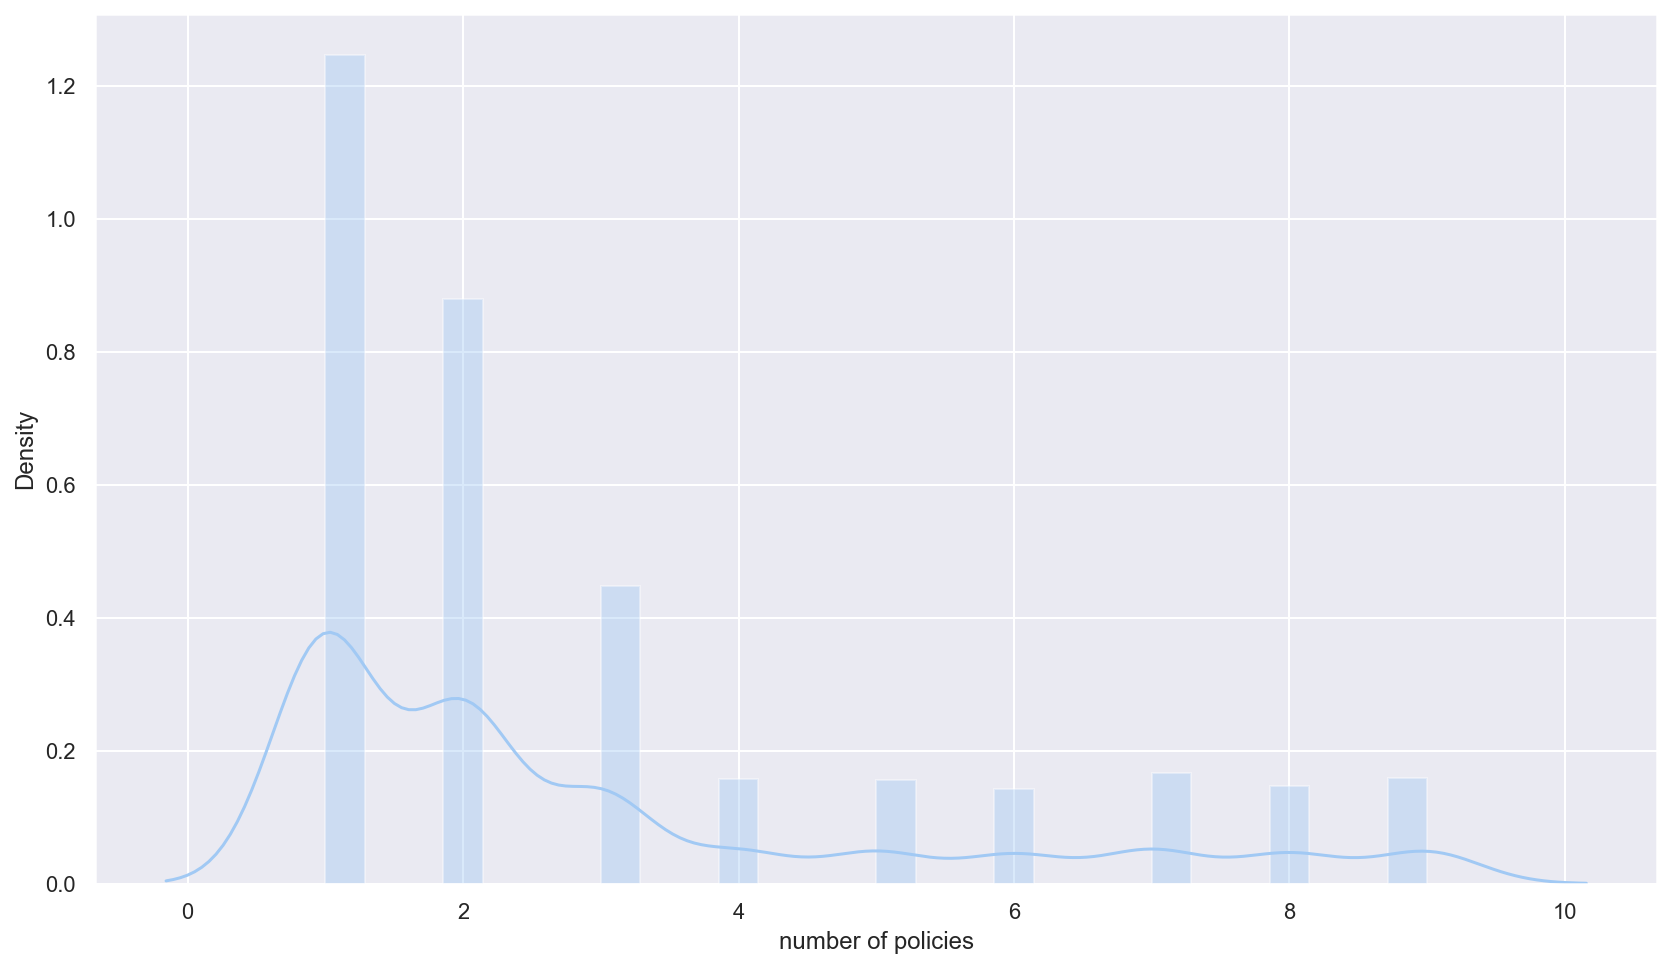

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


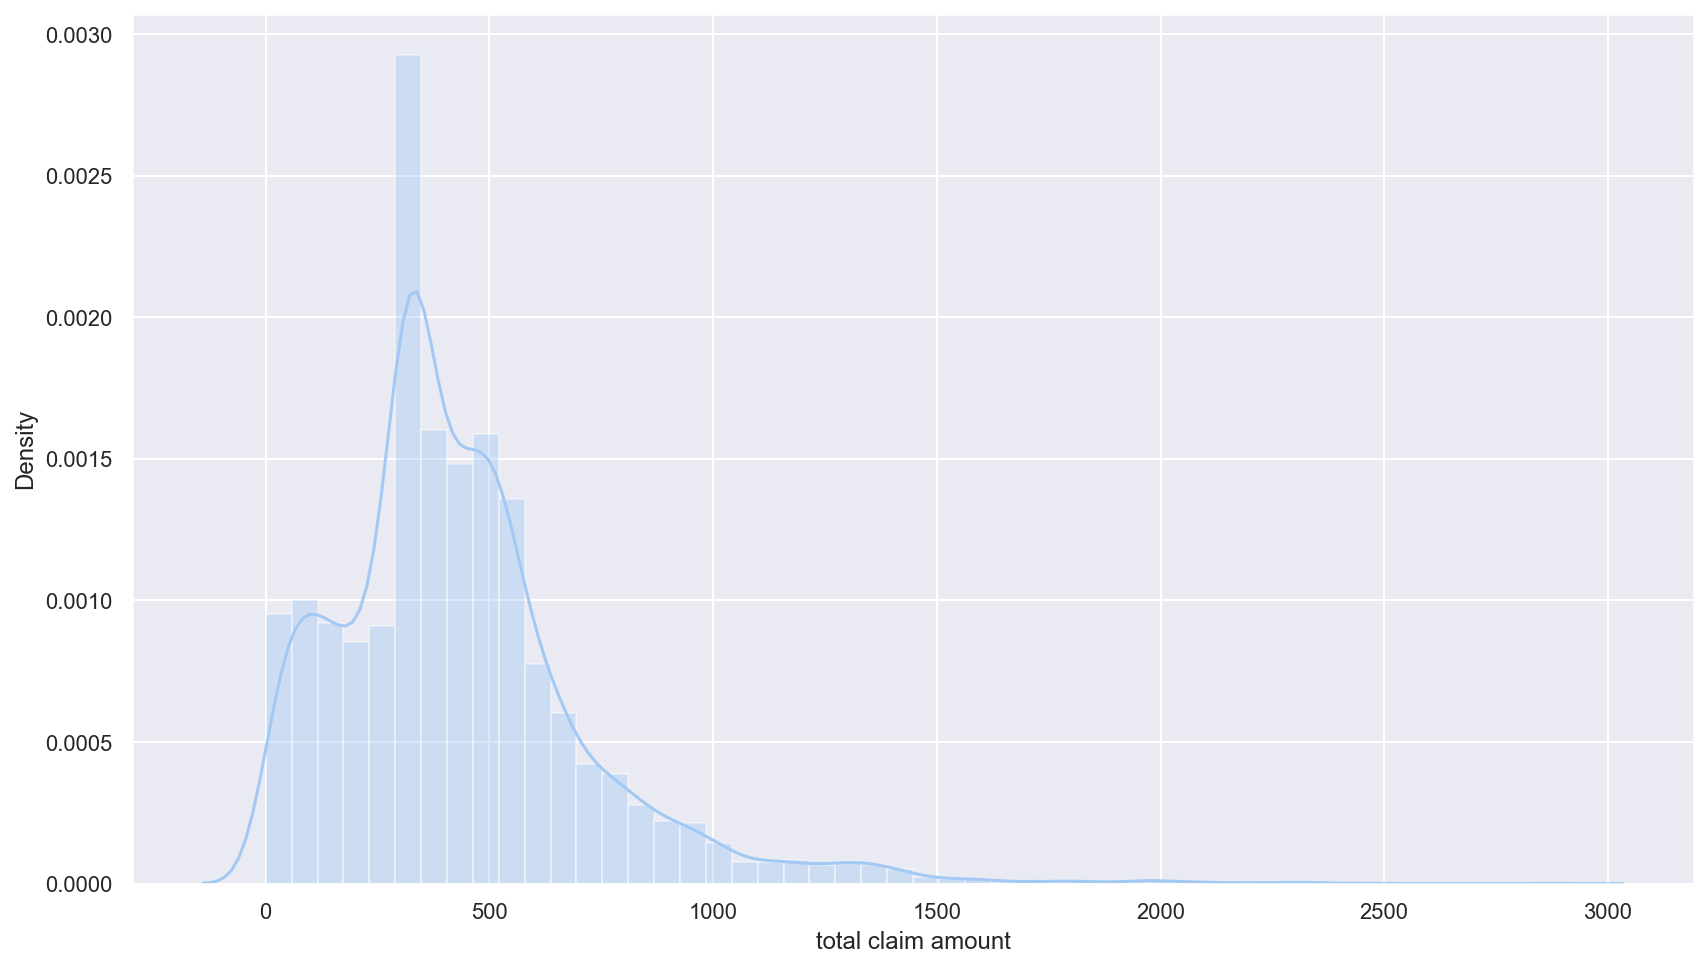

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


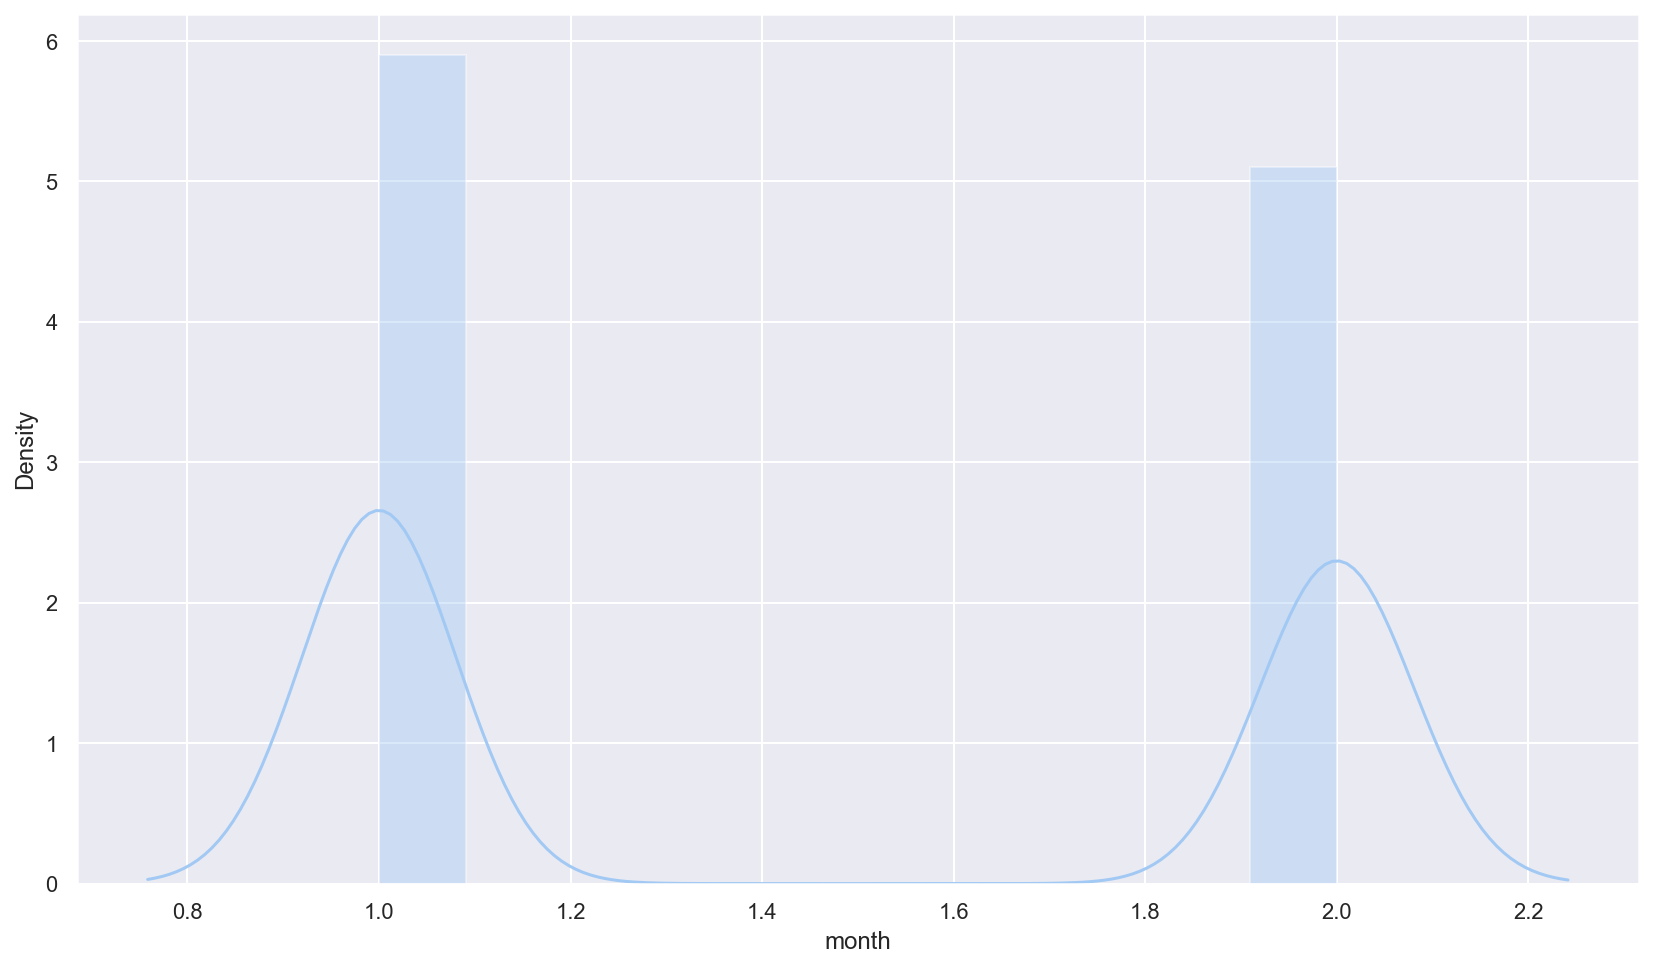

In [216]:
#For loop to plot the Distribution plots of the columns
for col in df_num:
    sns.distplot(df[col])
    plt.show()

## Do the distributions for different numerical variables look like a normal distribution


### Transform Columns to log(10)

In [217]:
# Function to convert x to log(10)
def log_transfom_clean1(x):
    x = np.log10(x)
    if np.isfinite(x):
        return x
    else:
        return 0


In [218]:
# Function to convert columns to log(10)
def covert_columns_log(df_num):
    """This function will iterate over the columns to covert all numerical variables to log(10) values"""
    #Copy Data before Transformations
    df_num_log = df_num.copy()
    for col in df_num_log.columns:
        df_num_log[col+'_log'] = df_num_log[col].apply(lambda x : log_transfom_clean1(x))
    #Sort Columns in alphetical order    
    df_num_log = df_num_log.reindex(sorted(df_num_log.columns), axis=1)
    return df_num_log
 

In [219]:
#Create a new DataFrame with new columns with logaritic values
df_num_log = covert_columns_log(df_num)

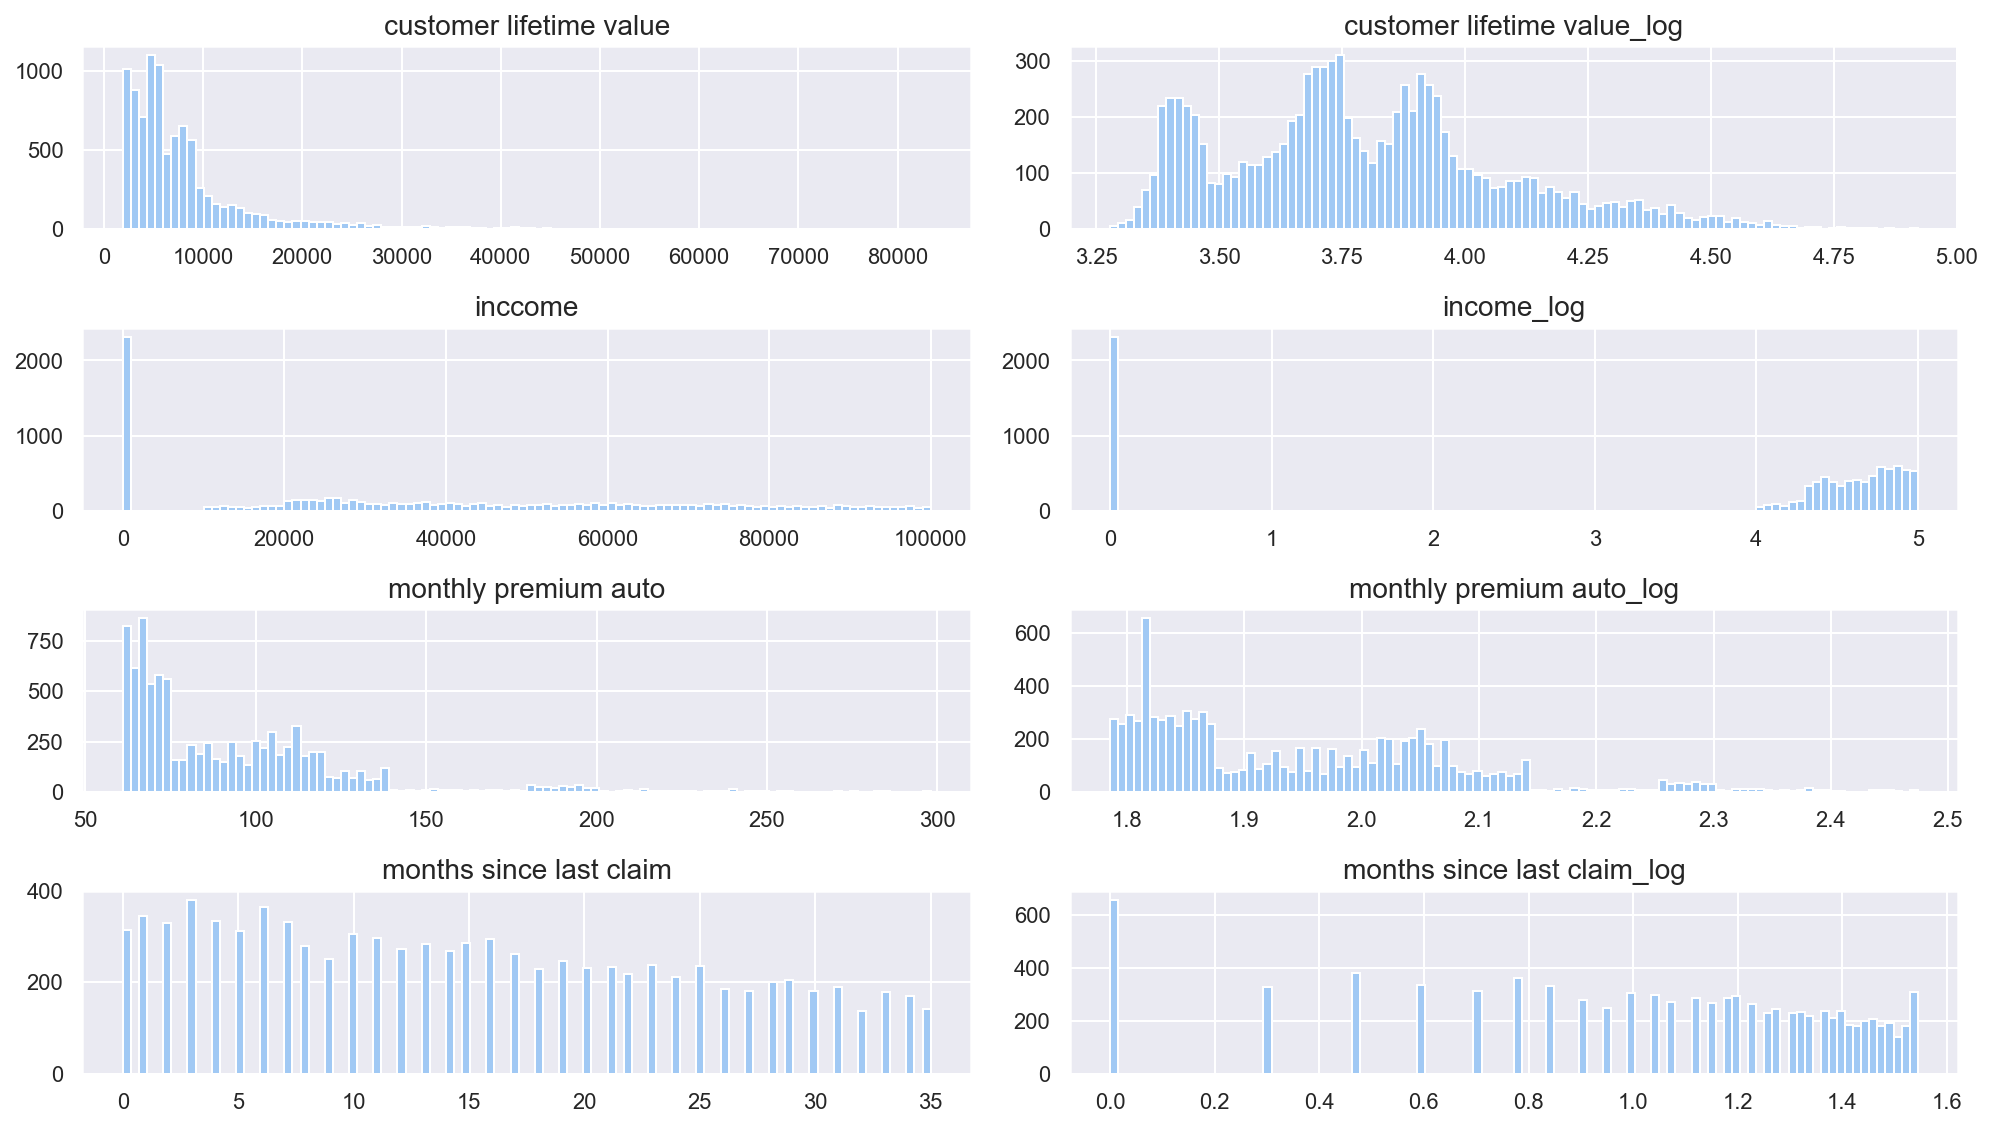

In [220]:
#Check new distributions comparing the new columns

# Figure and Axes  
fig, axes=plt.subplots(4,2)

#Customer Lifetime value
axes[0, 0].hist(df_num_log['customer lifetime value'], bins=100)
axes[0, 0].set_title('customer lifetime value', fontsize=14)
axes[0, 1].hist(df_num_log['customer lifetime value_log'], bins=100)
axes[0, 1].set_title('customer lifetime value_log', fontsize=14)

#Customer income
axes[1, 0].hist(df_num_log['income'], bins=100)
axes[1, 0].set_title('inccome', fontsize=14)
axes[1, 1].hist(df_num_log['income_log'], bins=100)
axes[1, 1].set_title('income_log', fontsize=14)

#monthly premium auto
axes[2, 0].hist(df_num_log['monthly premium auto'], bins=100)
axes[2, 0].set_title('monthly premium auto', fontsize=14)
axes[2, 1].hist(df_num_log['monthly premium auto_log'], bins=100)
axes[2, 1].set_title('monthly premium auto_log', fontsize=14)

#months since last claim
axes[3, 0].hist(df_num_log['months since last claim'], bins=100)
axes[3, 0].set_title('months since last claim', fontsize=14)
axes[3, 1].hist(df_num_log['months since last claim_log'], bins=100)
axes[3, 1].set_title('months since last claim_log', fontsize=14)



plt.tight_layout()
plt.show()

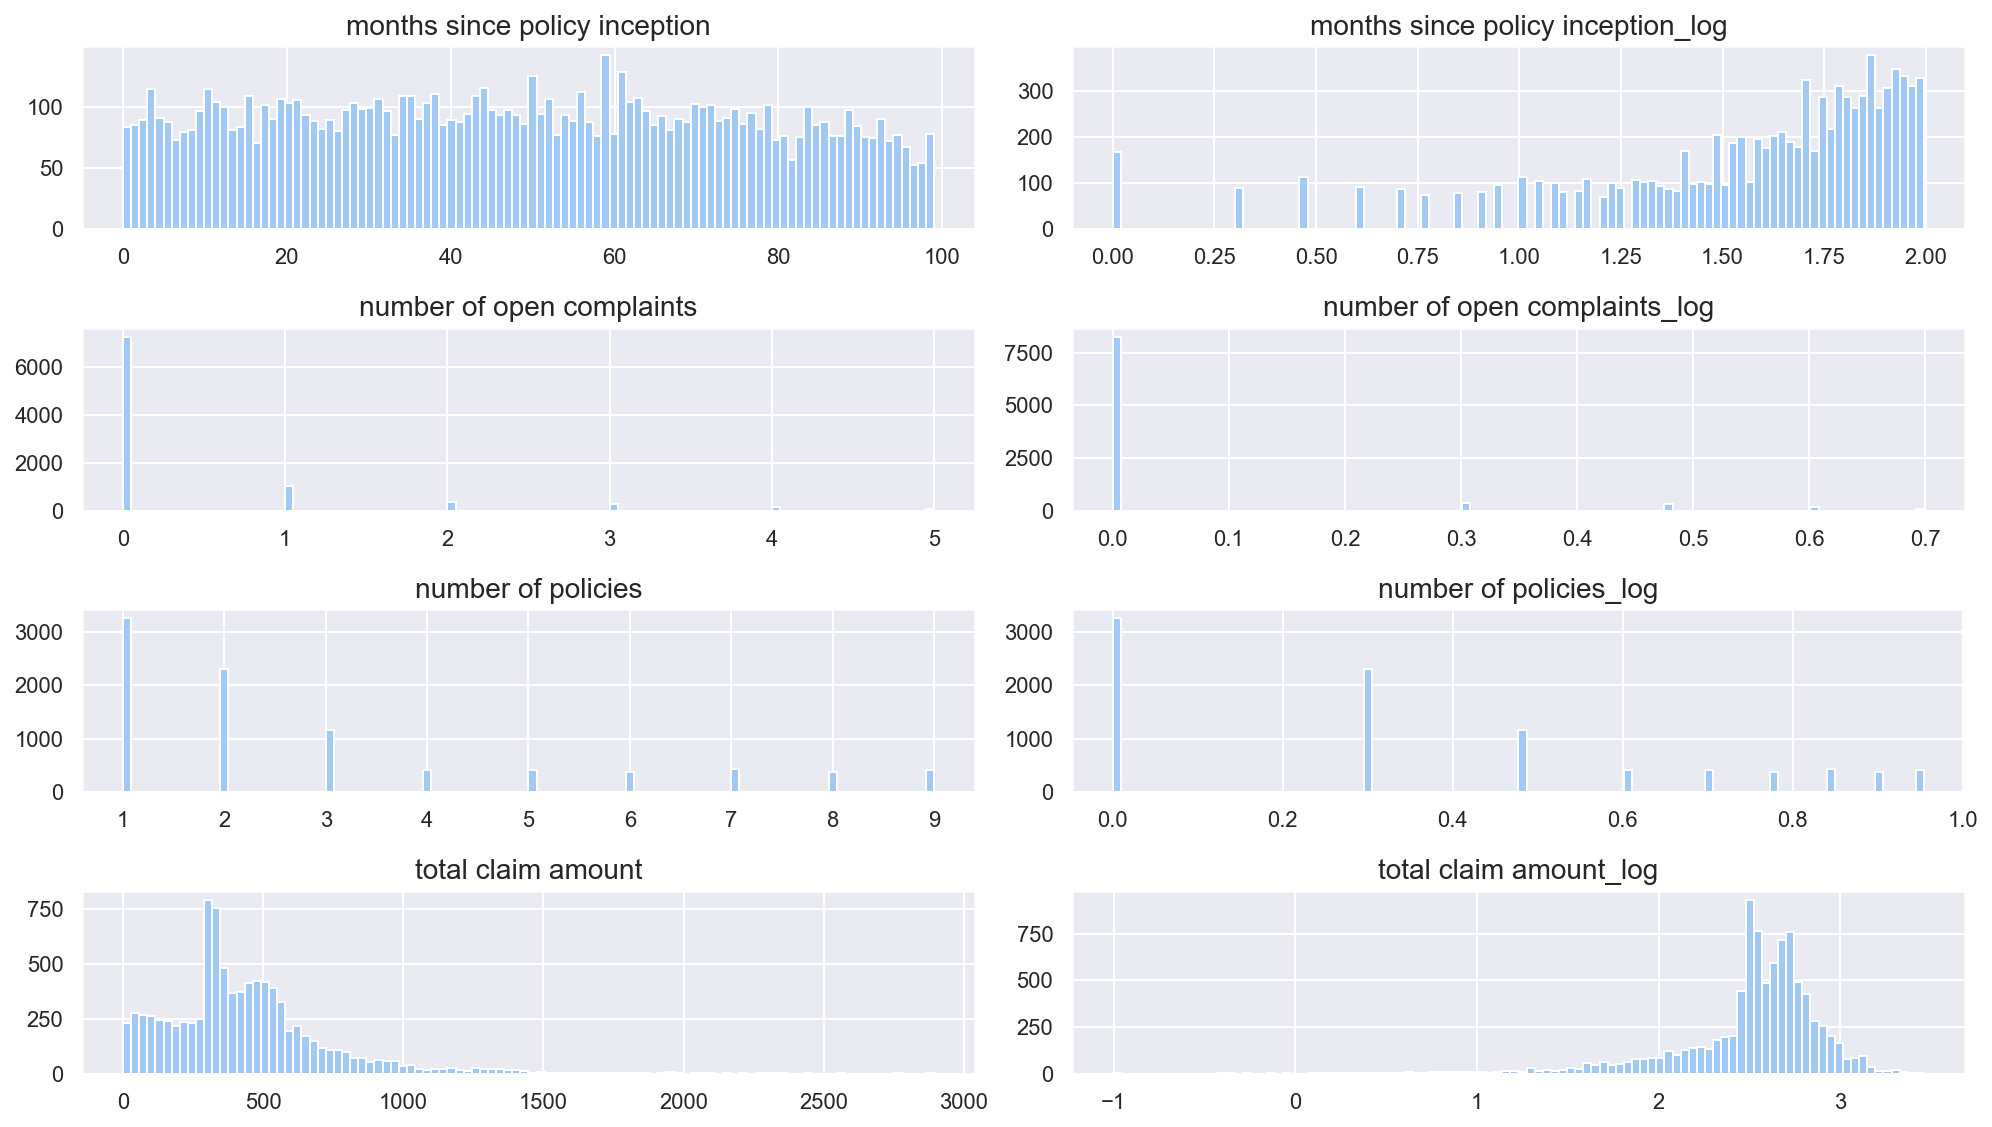

In [221]:
#Check new distributions comparing the new columns

# Figure and Axes  
fig, axes=plt.subplots(4,2)

#months since policy inception
axes[0, 0].hist(df_num_log['months since policy inception'], bins=100)
axes[0, 0].set_title('months since policy inception', fontsize=14)
axes[0, 1].hist(df_num_log['months since policy inception_log'], bins=100)
axes[0, 1].set_title('months since policy inception_log', fontsize=14)

#number of open complaints
axes[1, 0].hist(df_num_log['number of open complaints'], bins=100)
axes[1, 0].set_title('number of open complaints', fontsize=14)
axes[1, 1].hist(df_num_log['number of open complaints_log'], bins=100)
axes[1, 1].set_title('number of open complaints_log', fontsize=14)

#Cinumber of policies
axes[2, 0].hist(df_num_log['number of policies'], bins=100)
axes[2, 0].set_title('number of policies', fontsize=14)
axes[2, 1].hist(df_num_log['number of policies_log'], bins=100)
axes[2, 1].set_title('number of policies_log', fontsize=14)

#total claim amount
axes[3, 0].hist(df_num_log['total claim amount'], bins=100)
axes[3, 0].set_title('total claim amount', fontsize=14)
axes[3, 1].hist(df_num_log['total claim amount_log'], bins=100)
axes[3, 1].set_title('total claim amount_log', fontsize=14)

plt.tight_layout()
plt.show()

### BoxCox transformation

In [222]:
#Import SCIPY library to proceed with the BoxCox transformation
from scipy import stats

In [223]:
def boxcox(df_num):
    """This function will create a new data set with same columns and new columns BoxCox transformed"""
    
    #Copy Data before Transformations
    df_num_boxcox = df_num.copy()
    
    #Iterate over the columns and apply boxcox transformation
    for col in df_num_boxcox.columns:
        #convert negative values
        df_num_boxcox[col] = np.where(df_num_boxcox[col] <= 0, df_num_boxcox[col].mean(), df_num_boxcox[col]) 
        #BoxCox Transfromation and new column creation
        xt, lmbda = stats.boxcox(df_num_boxcox[col])
        df_num_boxcox[col+'_boxcox'] = xt
         
    #Sort Columns in alphetical order    
    df_num_boxcox = df_num_boxcox.reindex(sorted(df_num_boxcox.columns), axis=1)
    
    return df_num_boxcox

In [224]:
#New DataSet Creation with BoxCox Transformation Columns
df_num_boxcox = boxcox(df_num)

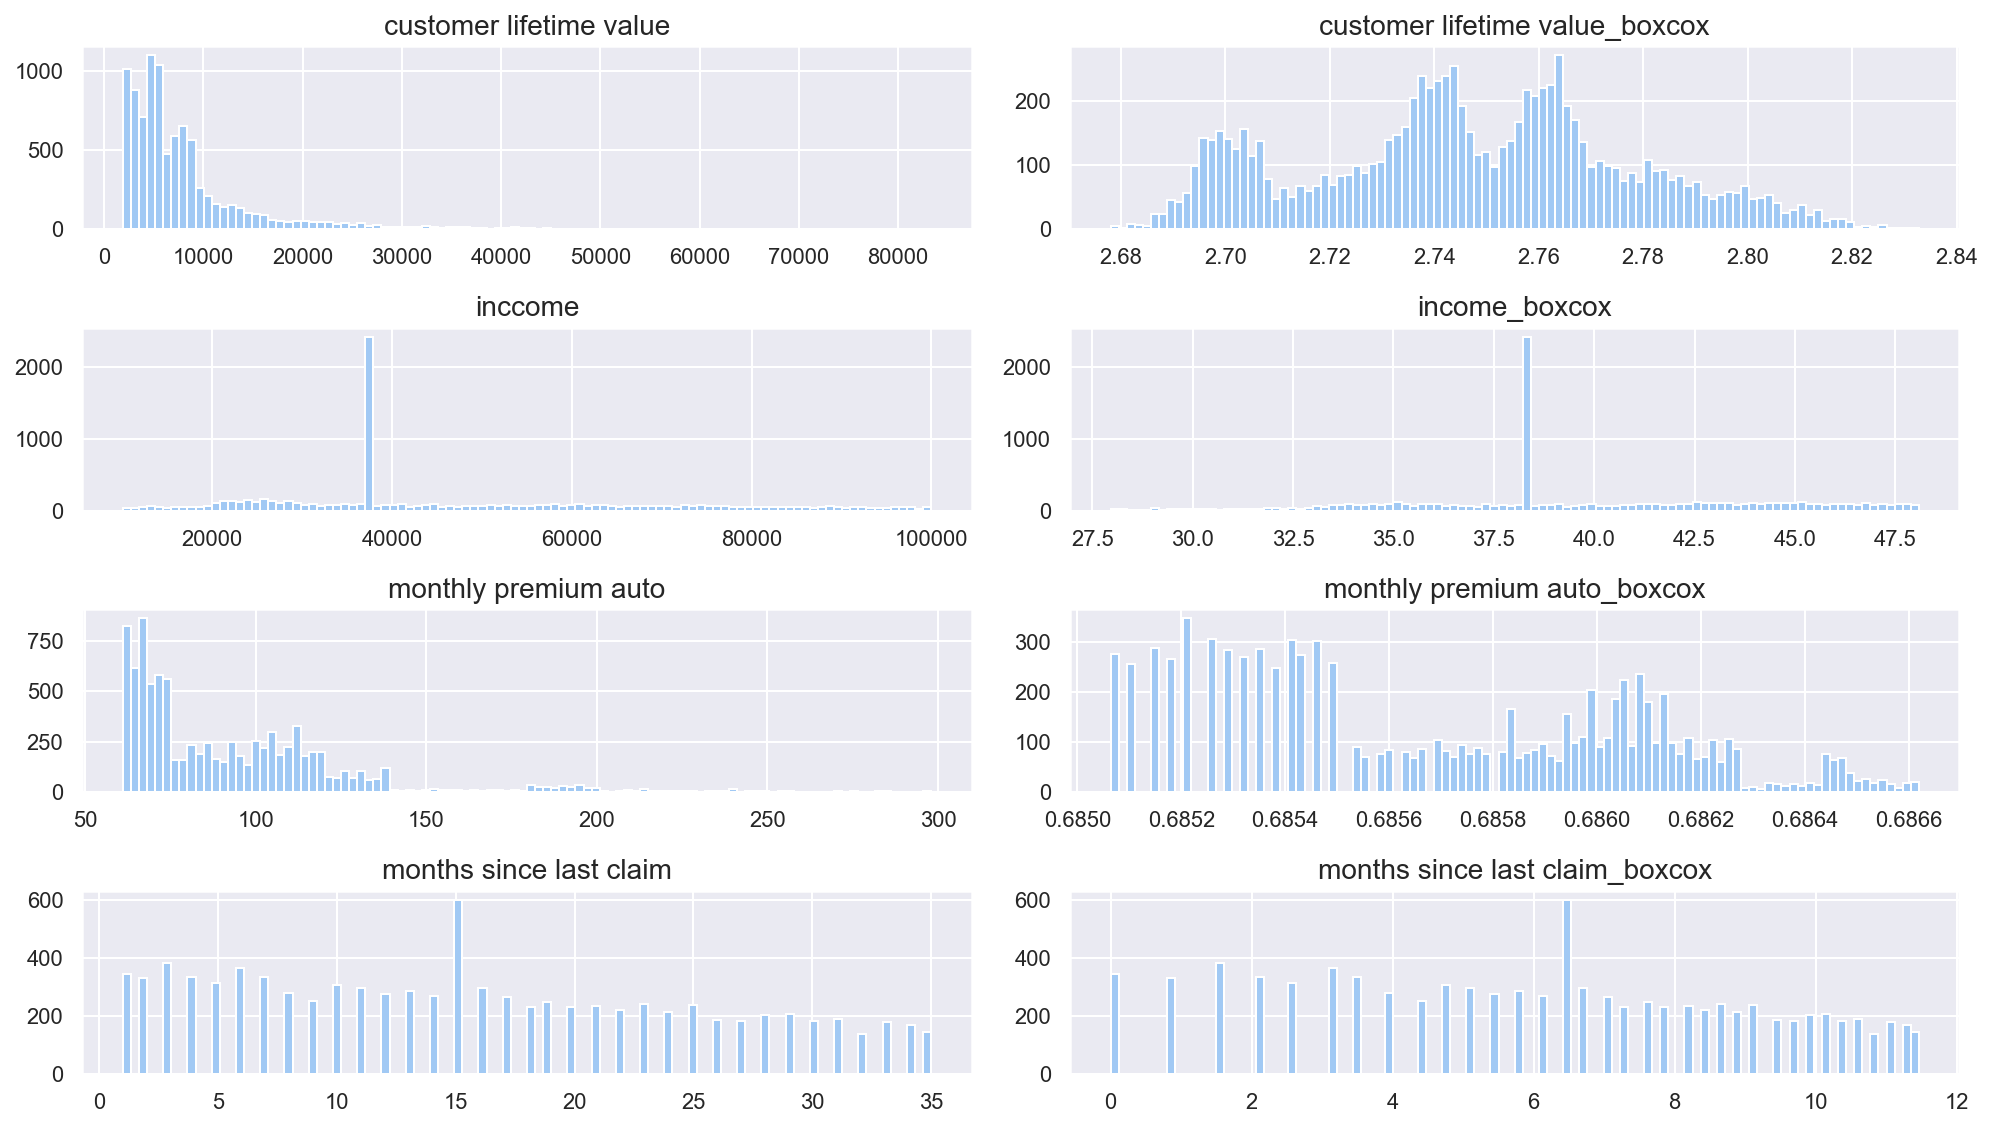

In [225]:
#Check new distributions comparing the new columns

# Figure and Axes  
fig, axes=plt.subplots(4,2)

#Customer Lifetime value
axes[0, 0].hist(df_num_boxcox['customer lifetime value'], bins=100)
axes[0, 0].set_title('customer lifetime value', fontsize=14)
axes[0, 1].hist(df_num_boxcox['customer lifetime value_boxcox'], bins=100)
axes[0, 1].set_title('customer lifetime value_boxcox', fontsize=14)

#Customer income
axes[1, 0].hist(df_num_boxcox['income'], bins=100)
axes[1, 0].set_title('inccome', fontsize=14)
axes[1, 1].hist(df_num_boxcox['income_boxcox'], bins=100)
axes[1, 1].set_title('income_boxcox', fontsize=14)

#monthly premium auto
axes[2, 0].hist(df_num_boxcox['monthly premium auto'], bins=100)
axes[2, 0].set_title('monthly premium auto', fontsize=14)
axes[2, 1].hist(df_num_boxcox['monthly premium auto_boxcox'], bins=100)
axes[2, 1].set_title('monthly premium auto_boxcox', fontsize=14)

#months since last claim
axes[3, 0].hist(df_num_boxcox['months since last claim'], bins=100)
axes[3, 0].set_title('months since last claim', fontsize=14)
axes[3, 1].hist(df_num_boxcox['months since last claim_boxcox'], bins=100)
axes[3, 1].set_title('months since last claim_boxcox', fontsize=14)



plt.tight_layout()
plt.show()

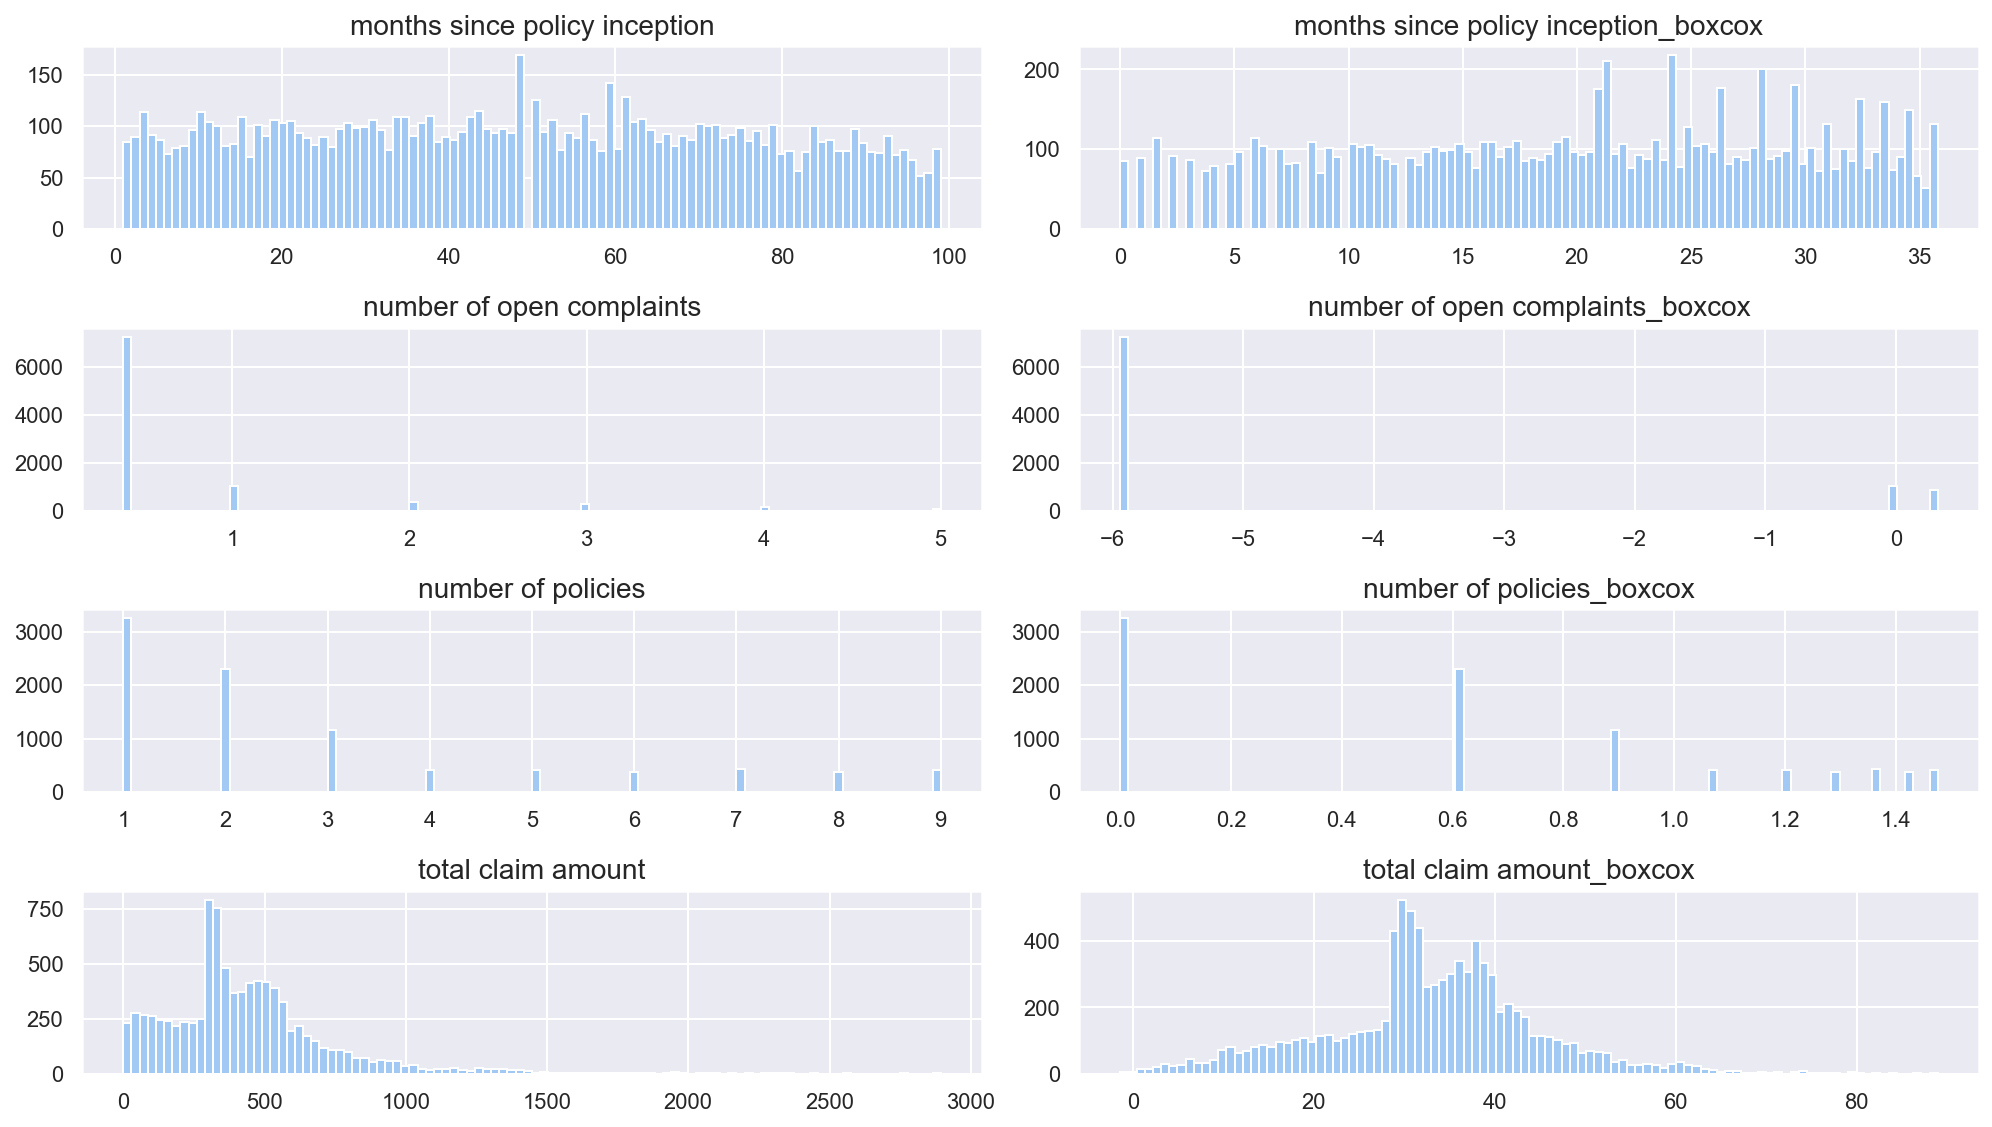

In [226]:
#Check new distributions comparing the new columns

# Figure and Axes  
fig, axes=plt.subplots(4,2)

#months since policy inception
axes[0, 0].hist(df_num_boxcox['months since policy inception'], bins=100)
axes[0, 0].set_title('months since policy inception', fontsize=14)
axes[0, 1].hist(df_num_boxcox['months since policy inception_boxcox'], bins=100)
axes[0, 1].set_title('months since policy inception_boxcox', fontsize=14)

#number of open complaints
axes[1, 0].hist(df_num_boxcox['number of open complaints'], bins=100)
axes[1, 0].set_title('number of open complaints', fontsize=14)
axes[1, 1].hist(df_num_boxcox['number of open complaints_boxcox'], bins=100)
axes[1, 1].set_title('number of open complaints_boxcox', fontsize=14)

#Cinumber of policies
axes[2, 0].hist(df_num_boxcox['number of policies'], bins=100)
axes[2, 0].set_title('number of policies', fontsize=14)
axes[2, 1].hist(df_num_boxcox['number of policies_boxcox'], bins=100)
axes[2, 1].set_title('number of policies_boxcox', fontsize=14)

#total claim amount
axes[3, 0].hist(df_num_boxcox['total claim amount'], bins=100)
axes[3, 0].set_title('total claim amount', fontsize=14)
axes[3, 1].hist(df_num_boxcox['total claim amount_boxcox'], bins=100)
axes[3, 1].set_title('total claim amount_boxcox', fontsize=14)

plt.tight_layout()
plt.show()

## For the numerical variables, check the multicollinearity between the features. Please note that we will use the column total_claim_amount later as the target variable.

In [227]:
df_num.columns

Index(['customer lifetime value', 'income', 'monthly premium auto',
       'months since last claim', 'months since policy inception',
       'number of open complaints', 'number of policies', 'total claim amount',
       'month'],
      dtype='object')

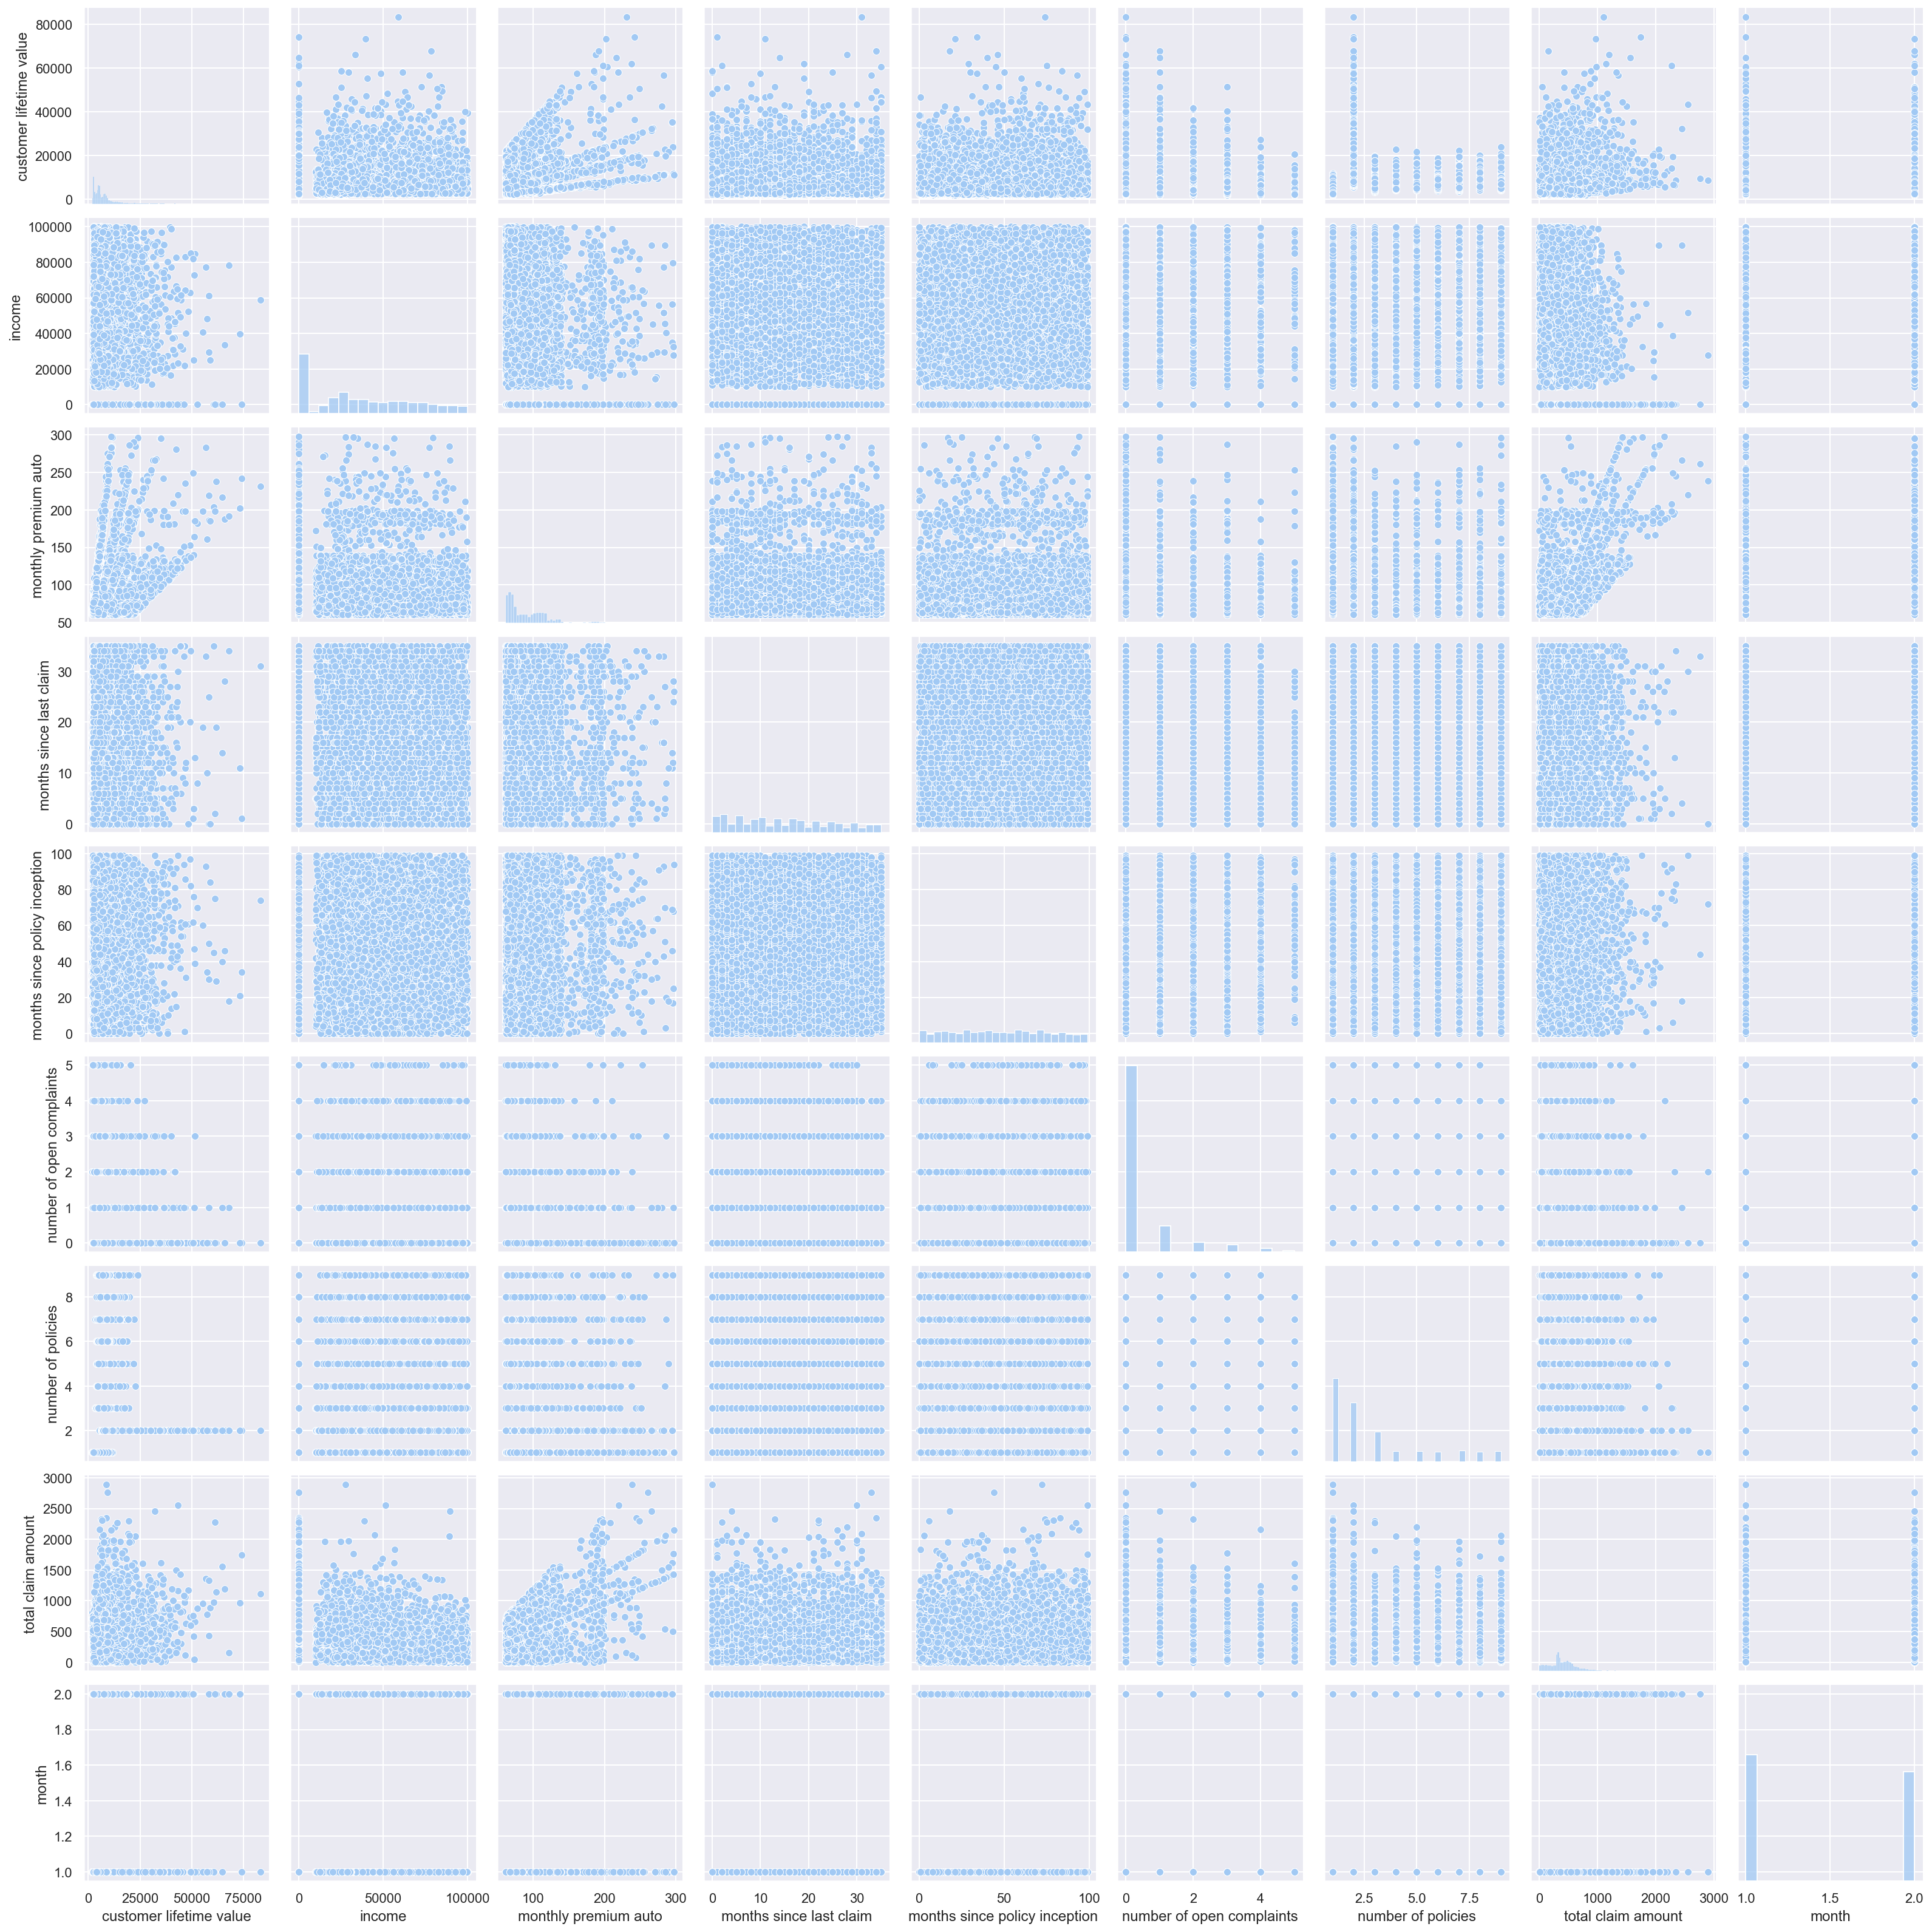

In [228]:
# Check multicolinearity with a pairplot
sns.pairplot(df_num)

In [229]:
def correlation(df_num):
    """  This function will allow us to get the features which are more correlated with the Targeted Column 'total claim amount' """

    correlations = df_num.corr()

    mask = (correlations['total claim amount']> 0.2)

    # correlations[mask]
    return correlations[mask]['total claim amount']

In [230]:
# Pearson correlation matrix (Linear)

df_num.corr() # Person correlation 



customer lifetime value    income  \
customer lifetime value                       1.000000  0.024366   
income                                        0.024366  1.000000   
monthly premium auto                          0.396262 -0.016665   
months since last claim                       0.011517 -0.026715   
months since policy inception                 0.009418 -0.000875   
number of open complaints                    -0.036343  0.006408   
number of policies                            0.021955 -0.008656   
total claim amount                            0.226451 -0.355254   
month                                        -0.006096  0.000169   

                               monthly premium auto  months since last claim  \
customer lifetime value                    0.396262                 0.011517   
income                                    -0.016665                -0.026715   
monthly premium auto                       1.000000                 0.005026   
months since last claim                    0.005026                 1.000000   
months since policy inception              0.020257                -0.042959   
number of open complaints                 -0.013122                 0.005354   
number of policies                        -0.011233                 0.009136   
total claim amount                         0.632017                 0.007563   
month                                      0.011467                -0.020921   

                               months since policy inception  \
customer lifetime value                             0.009418   
income                                             -0.000875   
monthly premium auto                                0.020257   
months since last claim                            -0.042959   
months since policy inception                       1.000000   
number of open complaints                          -0.001158   
number of policies                                 -0.013333   
total claim amount                                  0.003335   
month                                               0.011010   

                               number of open complaints  number of policies  \
customer lifetime value                        -0.036343            0.021955   
income                                          0.006408           -0.008656   
monthly premium auto                           -0.013122           -0.011233   
months since last claim                         0.005354            0.009136   
months since policy inception                  -0.001158           -0.013333   
number of open complaints                       1.000000            0.001498   
number of policies                              0.001498            1.000000   
total claim amount                             -0.014241           -0.002354   
month                                          -0.006335            0.009305   

                               total claim amount     month  
customer lifetime value                  0.226451 -0.006096  
income                                  -0.355254  0.000169  
monthly premium auto                     0.632017  0.011467  
months since last claim                  0.007563 -0.020921  
months since policy inception            0.003335  0.011010  
number of open complaints               -0.014241 -0.006335  
number of policies                      -0.002354  0.009305  
total claim amount                       1.000000  0.006820  
month                                    0.006820  1.000000

In [231]:
# Run the Function def correlations to see what features are most correlated with ['total claim amount']:

correlation(df_num)

customer lifetime value    0.226451
monthly premium auto       0.632017
total claim amount         1.000000
Name: total claim amount, dtype: float64

In [232]:
# Spearman correlation matrix - No liear tendencies

df_num.corr('spearman') 

customer lifetime value    income  \
customer lifetime value                       1.000000  0.055395   
income                                        0.055395  1.000000   
monthly premium auto                          0.453933 -0.017608   
months since last claim                       0.005126 -0.025784   
months since policy inception                -0.002429 -0.001945   
number of open complaints                    -0.031312  0.006334   
number of policies                            0.488860 -0.010273   
total claim amount                            0.210598 -0.401598   
month                                        -0.004966 -0.000383   

                               monthly premium auto  months since last claim  \
customer lifetime value                    0.453933                 0.005126   
income                                    -0.017608                -0.025784   
monthly premium auto                       1.000000                -0.005989   
months since last claim                   -0.005989                 1.000000   
months since policy inception              0.014596                -0.048269   
number of open complaints                 -0.012751                 0.005736   
number of policies                        -0.006936                 0.011439   
total claim amount                         0.522261                -0.000782   
month                                      0.015626                -0.020286   

                               months since policy inception  \
customer lifetime value                            -0.002429   
income                                             -0.001945   
monthly premium auto                                0.014596   
months since last claim                            -0.048269   
months since policy inception                       1.000000   
number of open complaints                          -0.013233   
number of policies                                 -0.009546   
total claim amount                                 -0.006569   
month                                               0.010824   

                               number of open complaints  number of policies  \
customer lifetime value                        -0.031312            0.488860   
income                                          0.006334           -0.010273   
monthly premium auto                           -0.012751           -0.006936   
months since last claim                         0.005736            0.011439   
months since policy inception                  -0.013233           -0.009546   
number of open complaints                       1.000000            0.001523   
number of policies                              0.001523            1.000000   
total claim amount                             -0.024694           -0.011100   
month                                          -0.005091            0.003543   

                               total claim amount     month  
customer lifetime value                  0.210598 -0.004966  
income                                  -0.401598 -0.000383  
monthly premium auto                     0.522261  0.015626  
months since last claim                 -0.000782 -0.020286  
months since policy inception           -0.006569  0.010824  
number of open complaints               -0.024694 -0.005091  
number of policies                      -0.011100  0.003543  
total claim amount                       1.000000  0.005764  
month                                    0.005764  1.000000

In [233]:
# Kendall correlation matrix
df_num.corr('kendall')

customer lifetime value    income  \
customer lifetime value                       1.000000  0.038081   
income                                        0.038081  1.000000   
monthly premium auto                          0.350830 -0.012074   
months since last claim                       0.003478 -0.017980   
months since policy inception                -0.001684 -0.001340   
number of open complaints                    -0.024689  0.005154   
number of policies                            0.302811 -0.007655   
total claim amount                            0.144097 -0.279763   
month                                        -0.004055 -0.000321   

                               monthly premium auto  months since last claim  \
customer lifetime value                    0.350830                 0.003478   
income                                    -0.012074                -0.017980   
monthly premium auto                       1.000000                -0.004021   
months since last claim                   -0.004021                 1.000000   
months since policy inception              0.009874                -0.032842   
number of open complaints                 -0.010140                 0.004631   
number of policies                        -0.005149                 0.008421   
total claim amount                         0.398305                -0.000567   
month                                      0.012874                -0.016805   

                               months since policy inception  \
customer lifetime value                            -0.001684   
income                                             -0.001340   
monthly premium auto                                0.009874   
months since last claim                            -0.032842   
months since policy inception                       1.000000   
number of open complaints                          -0.010538   
number of policies                                 -0.007026   
total claim amount                                 -0.004512   
month                                               0.008883   

                               number of open complaints  number of policies  \
customer lifetime value                        -0.024689            0.302811   
income                                          0.005154           -0.007655   
monthly premium auto                           -0.010140           -0.005149   
months since last claim                         0.004631            0.008421   
months since policy inception                  -0.010538           -0.007026   
number of open complaints                       1.000000            0.001319   
number of policies                              0.001319            1.000000   
total claim amount                             -0.019562           -0.008250   
month                                          -0.004928            0.003166   

                               total claim amount     month  
customer lifetime value                  0.144097 -0.004055  
income                                  -0.279763 -0.000321  
monthly premium auto                     0.398305  0.012874  
months since last claim                 -0.000567 -0.016805  
months since policy inception           -0.004512  0.008883  
number of open complaints               -0.019562 -0.004928  
number of policies                      -0.008250  0.003166  
total claim amount                       1.000000  0.004711  
month                                    0.004711  1.000000

### Write code for both the correlation matrix and for seaborn heatmap.

<function matplotlib.pyplot.show(close=None, block=None)>

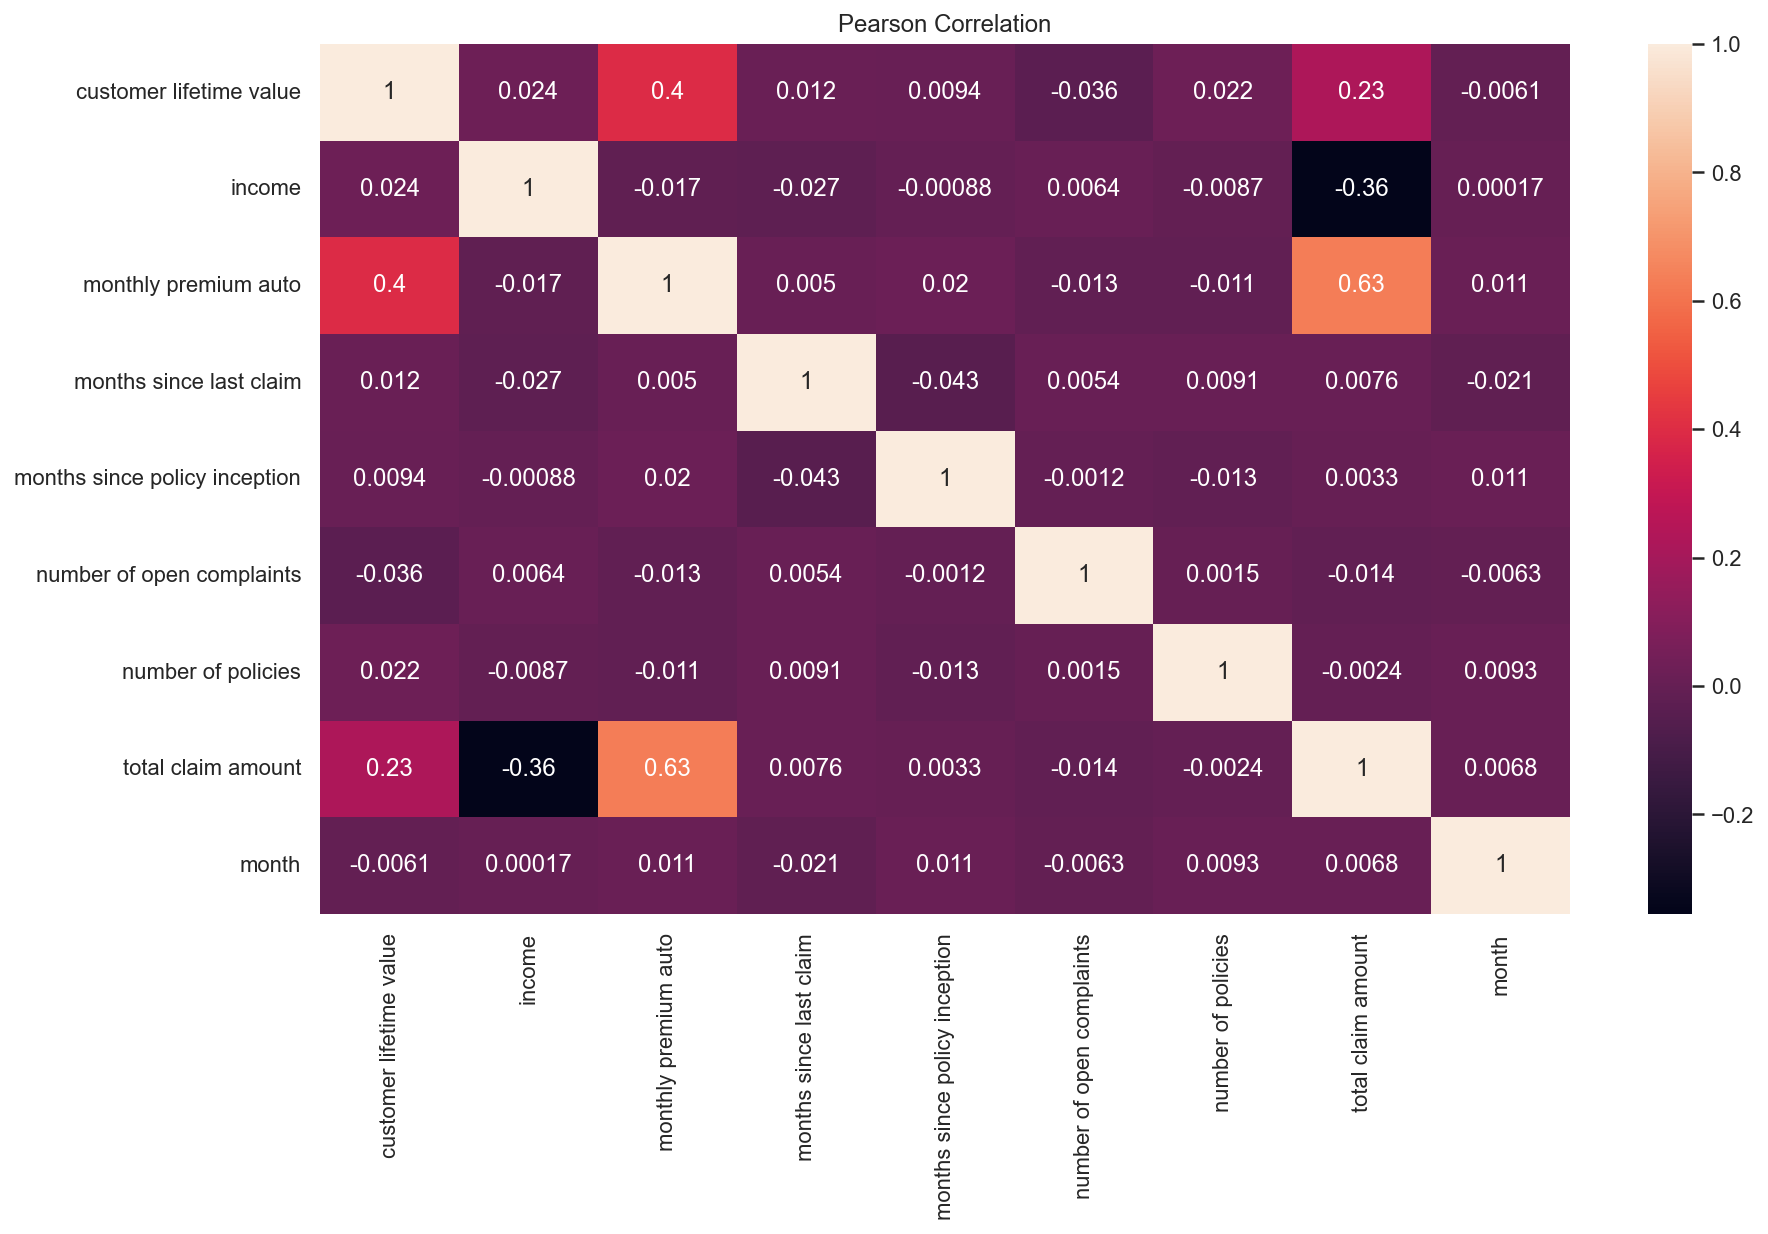

In [234]:
#heatmap

sns_plot = sns.heatmap(df_num.corr(), annot=True)
figure = sns_plot.get_figure()
sns_plot.set_title('Pearson Correlation')
plt.show

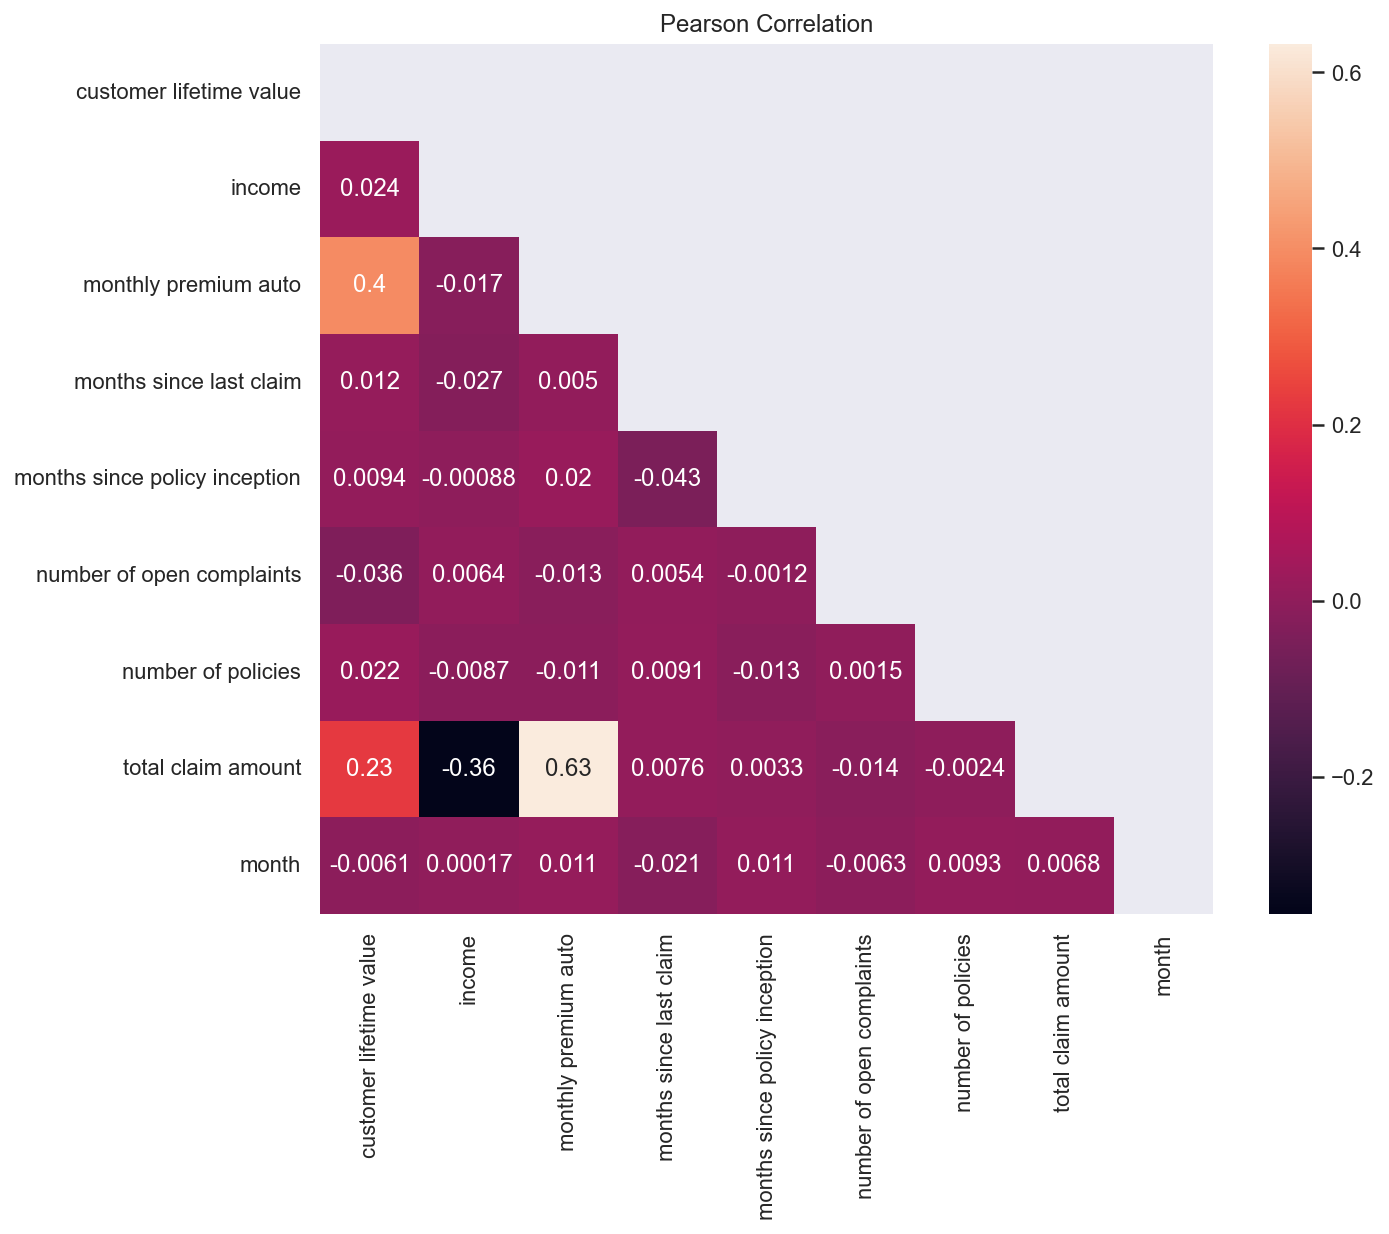

In [235]:
mask = np.zeros_like(df_num.corr())

mask[np.triu_indices_from(mask)] = True # optional, to hide repeat half of the matrix

fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(df_num.corr(), mask=mask, annot=True)
ax.set_title('Pearson Correlation')
plt.show()

# lab-customer-analysis-round-5

> For this lab, we still keep using the marketing_customer_analysis.csv file that you can find in the files_for_lab folder.

> Get the data
> We are using the marketing_customer_analysis.csv file.

> Dealing with the data
> Already done in the round 2.

> Explore the data
> Done in the round 3.

## Processing Data
(Further processing...)

* 1.X-y split.
* 2.Normalize (numerical).

## 1.X-y split


In [287]:
#df.columns

In [288]:
# X, y creation 
y_col = 'total claim amount'
y = pd.DataFrame(df[y_col])
X = df[df.columns.drop(y_col)]
display(X)
display(y)

customer       state  customer lifetime value response  coverage  \
0     BU79786  Washington              2763.519279       No     Basic   
1     QZ44356     Arizona              6979.535903       No  Extended   
2     AI49188      Nevada             12887.431650       No   Premium   
3     WW63253  California              7645.861827       No     Basic   
4     HB64268  Washington              2813.692575       No     Basic   
...       ...         ...                      ...      ...       ...   
9129  LA72316  California             23405.987980       No     Basic   
9130  PK87824  California              3096.511217      Yes  Extended   
9131  TD14365  California              8163.890428       No  Extended   
9132  UP19263  California              7524.442436       No  Extended   
9133  Y167826  California              2611.836866       No  Extended   

     education effective to date employmentstatus gender  income  ...  \
0     Bachelor        2011-02-24         Employed      F   56274  ...   
1     Bachelor        2011-01-31       Unemployed      F       0  ...   
2     Bachelor        2011-02-19         Employed      F   48767  ...   
3     Bachelor        2011-01-20       Unemployed      M       0  ...   
4     Bachelor        2011-02-03         Employed      M   43836  ...   
...        ...               ...              ...    ...     ...  ...   
9129  Bachelor        2011-02-10         Employed      M   71941  ...   
9130   College        2011-02-12         Employed      F   21604  ...   
9131  Bachelor        2011-02-06       Unemployed      M       0  ...   
9132   College        2011-02-03         Employed      M   21941  ...   
9133   College        2011-02-14       Unemployed      M       0  ...   

     months since policy inception number of open complaints  \
0                                5                         0   
1                               42                         0   
2                               38                         0   
3                               65                         0   
4                               44                         0   
...                            ...                       ...   
9129                            89                         0   
9130                            28                         0   
9131                            37                         3   
9132                             3                         0   
9133                            90                         0   

      number of policies     policy type        policy  renew offer type  \
0                      1  Corporate Auto  Corporate L3            Offer1   
1                      8   Personal Auto   Personal L3            Offer3   
2                      2   Personal Auto   Personal L3            Offer1   
3                      7  Corporate Auto  Corporate L2            Offer1   
4                      1   Personal Auto   Personal L1            Offer1   
...                  ...             ...           ...               ...   
9129                   2   Personal Auto   Personal L1            Offer2   
9130                   1  Corporate Auto  Corporate L3            Offer1   
9131                   2  Corporate Auto  Corporate L2            Offer1   
9132                   3   Personal Auto   Personal L2            Offer3   
9133                   1  Corporate Auto  Corporate L3            Offer4   

      sales channel  vehicle class vehicle size month  
0             Agent   Two-Door Car      Medsize     2  
1             Agent  Four-Door Car      Medsize     1  
2             Agent   Two-Door Car      Medsize     2  
3       Call Center            SUV      Medsize     1  
4             Agent  Four-Door Car      Medsize     2  
...             ...            ...          ...   ...  
9129            Web  Four-Door Car      Medsize     2  
9130         Branch  Four-Door Car      Medsize     2  
9131         Branch  Four-Door Car      Medsize     2  
9132     

total claim amount
0             384.811147
1            1131.464935
2             566.472247
3             529.881344
4             138.130879
...                  ...
9129          198.234764
9130          379.200000
9131          790.784983
9132          691.200000
9133          369.600000

[9134 rows x 1 columns]

# Normalize Numerical

In [289]:
# We will use the Standard Scaler of Scikit learn library
from sklearn.preprocessing import StandardScaler

In [290]:
#Initiate Standard Scaler
sc_X = StandardScaler()

In [291]:
#select numerical columns
X_num_std = X.select_dtypes(include=np.number)


#select categorical columns 
X_cat_enco = X.select_dtypes(include=np.object)


C:\Users\ssai\AppData\Local\Temp\ipykernel_18792\863327413.py:6: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_cat_enco = X.select_dtypes(include=np.object)


In [292]:
#Shape for validation after normailization
X_num_std.shape

(9134, 8)

In [293]:
# Standard Scaler will create a NUMPY array we need to save the columns to create a new dataframe after the transformation
X_num_std_columns = X_num_std.columns

In [294]:
#Fit the Standard Scaler in the Numerical Dataset
X_num_std = sc_X.fit_transform(X_num_std)


In [295]:
#Convert the numy array in a DataFrame
X_num_std = pd.DataFrame(X_num_std, columns = X_num_std_columns)

In [296]:
#Validation for the Numerical DataSet
X_num_std.shape

(9134, 8)

# Lab | Customer Analysis Round 6

##  Processing Data
#### (Further processing...)

* X-y split. (done)
* Normalize (numerical). (done)
* One Hot/Label Encoding (categorical).
* Concat DataFrames
### Linear Regression
* Train-test split.
* Apply linear regression.
### Model Validation
* Description:
    * R2.
    * MSE.
    * RMSE.
    * MAE.

## One Hot Encoder Categoraical Columns


In [302]:
# import One Hot 

from sklearn.preprocessing import OneHotEncoder

In [303]:
X_cat_enco.shape

(9134, 15)

In [304]:
#Initiate OneHot Encoder.

drop_enc = OneHotEncoder(drop='first').fit(X_cat_enco)


In [305]:
# Transfor, OneHot encoder
X_cat_enco = drop_enc.transform(X_cat_enco).toarray()

In [306]:
X_cat_enco.shape #Shape is 9176 Columns. Too many columns. 

(9134, 9176)

### Get dummies 
        * Test to see if there is any difference between one-hot encoder and  dummies

In [307]:
#select categorical columns 
X_cat_enco = X.select_dtypes(include=np.object)



C:\Users\ssai\AppData\Local\Temp\ipykernel_18792\221342840.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_cat_enco = X.select_dtypes(include=np.object)


In [308]:
#Create new features with Dummies 
X_cat_enco = pd.get_dummies(X_cat_enco, drop_first=True)

In [309]:
# shape of the new set with dummy features
X_cat_enco.shape


(9134, 9176)

##  Concat DataFrames

In [310]:
# I will create X as new because I want to standarize the Dumificated columns and the numnerical columns at the same time. 

X = pd.concat([X.select_dtypes(include=np.number), df_cat_enco], axis=1)

In [311]:
# Normalize X, y with Standard Scaler
X = sc_X.fit_transform(X)


In [312]:
X

array([[-0.76287773,  0.61282744, -0.70392465, ...,  1.9603709 ,
         0.64950407, -0.48923278],
       [-0.14924546, -1.23961684,  0.02269103, ..., -0.51010755,
         0.64950407, -0.48923278],
       [ 0.71063622,  0.36570978,  0.42959581, ...,  1.9603709 ,
         0.64950407, -0.48923278],
       ...,
       [ 0.02313483, -1.23961684, -0.23889062, ..., -0.51010755,
         0.64950407, -0.48923278],
       [-0.06993547, -0.51735647,  0.08082028, ..., -0.51010755,
        -1.53963622, -0.48923278],
       [-0.78495478, -1.23961684, -0.47140763, ...,  1.9603709 ,
         0.64950407, -0.48923278]])

## Linear Regression

## Train-test split.

In [313]:
#Import library to make train and test sets
from sklearn.model_selection import train_test_split

In [314]:

# Division of the dataset into trains and a test set    

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


## Apply linear regression.

#### Part 4 : Modelisation

In [319]:
import statsmodels.api as sm

X_train2 = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train2)
results = model.fit()
# With statsmodel, we have an output that looks very similar to that of R
print(results.summary())

c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1749: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1749: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1671: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid


                            OLS Regression Results                            
Dep. Variable:     total claim amount   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Fri, 12 Aug 2022   Prob (F-statistic):                nan
Time:                        09:14:13   Log-Likelihood:             1.4014e+05
No. Observations:                6119   AIC:                        -2.680e+05
Df Residuals:                       0   BIC:                        -2.269e+05
Df Model:                        6118                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             5.6085        inf          0        n

## Creating a model with  sklearn.

In [320]:
# Creating the model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [321]:
# the coefficients of the regressor
regressor.coef_

array([[ 10.25909339, -26.26652993,  59.64404234, ..., -11.99748122,
          6.19185596,  -1.3435673 ]])

In [322]:
# Verifying overfitting
print(" Score of Train : {}\n Score of Test : {}".format(regressor.score(X_train, y_train), regressor.score(X_test, y_test)))

 Score of Train : 1.0
 Score of Test : 0.4667619973392897


### Metrics
    * R2.
    * MSE.
    * RMSE.
    * MAE.

In [323]:
# evaluating sklearn's LR model TRAIN/TEST
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
predictions = regressor.predict(X) # predict some values

rmse = mean_squared_error(y, predictions, squared=False) # or mse with squared=True
mae = mean_absolute_error(y, predictions)
# r2 gives you an overall estimate of how good the model is, between 0 (lowest) and 1 (highest)
# rmse is good to see if the errors are big, the values returned are in the same unit as the target
print("R2_score:", round(regressor.score(X,y),2)) # or r2_score(Y, predictions)
print("RMSE:", rmse)
print("MAE:", mae)

R2_score: 0.83
RMSE: 119.27723835072405
MAE: 51.79263154756556
